In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
from prettytable import PrettyTable
from time import time
import datetime
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable
import sklearn
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import re
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the datasets
df_train = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/basic_clean_train.pkl')
df_test = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/basic_clean_test.pkl')

In [ ]:
# getting the shape of each train dataset and test dataset
print('shape of training dataset:', df_train.shape)
print('shape of test dataset:', df_test.shape)

shape of training dataset: (590540, 224)
shape of test dataset: (506691, 223)


In [ ]:
# available categorical features
cat_fea = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 
           'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
           'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 
           'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
           'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

In [ ]:
# available numerical features
num_fea =  ['TransactionDT', 'TransactionAmt', 'dist1', 'dist2','C1','C2', 'C3','C4', 'C5', 'C6', 'C7','C8','C9','C10', 
            'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 
            'D14', 'D15', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20', 'V23', 'V26', 'V27', 'V30', 'V36', 
            'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V55', 'V56', 'V59', 'V62', 'V65', 'V67', 'V68', 'V70', 'V76', 
            'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V99', 'V98', 'V104', 'V96', 'V107', 'V108', 'V111', 'V115', 'V117', 
            'V120', 'V121', 'V123', 'V124', 'V127', 'V129', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V165', 
            'V160', 'V166', 'V178', 'V176', 'V173', 'V182', 'V187', 'V203', 'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 
            'V185', 'V188', 'V198', 'V210', 'V209', 'V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258', 'V257', 
            'V253', 'V252', 'V260', 'V261', 'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234', 'V238', 'V250', 'V271', 
            'V294', 'V284', 'V285', 'V286', 'V291', 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289', 
            'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06','id_07','id_08', 
            'id_09', 'id_10', 'id_11']

In [ ]:
def label_encoding(X_train, X_test, cat_features):
    
    '''
    Utility Function to Encode Categorical Features.
    '''
    for fea in cat_features:
        X_train[fea] = X_train[fea].astype(str)
        X_test[fea] = X_test[fea].astype(str)
    
        label_enc = LabelEncoder()
        label_enc.fit(X_train[fea])
        mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
        X_train[fea] = label_enc.transform(X_train[fea])
    
        # Manually Encoding the CV and Test Dataset so as to avoid error for any category which is not present in train set
    
        # All the categories which are not present in train datset are encoded as -1
    
        X_test[fea] = [-1 if mapping.get(val, -1)==-1 else mapping[val] for val in X_test[fea].values]
 

    return (X_train, X_test)

In [ ]:
# normalization using minmaxscaler

def min_max_scaler(X_train, X_test):
    
    X_train_norm = X_train.copy()
    X_test_norm = X_test.copy()
    
    for fea in X_train.columns:
        if fea not in cat_fea:
          if fea not in ['isFraud', 'TransactionID','D15norm', 'D12norm']:
            scale = MinMaxScaler()
            X_train_norm[fea] = scale.fit_transform(X_train_norm[fea].values.reshape(-1, 1))
            X_test_norm[fea] = scale.transform(X_test_norm[fea].values.reshape(-1, 1))

    return (X_train_norm, X_test_norm)

Training the model on tuned hyper parameter

In [ ]:
X_train = df_train.drop(['isFraud', 'TransactionID'], axis=1)
y_train = df_train['isFraud']
X_test = df_test.copy()
X_test = df_test.drop(['TransactionID'], axis=1)

In [ ]:
print('shape of training dataset:', X_train.shape)
print('shape of test dataset:', X_test.shape)

shape of training dataset: (590540, 222)
shape of test dataset: (506691, 222)


In [ ]:
# Label Encoding Categorical Features
X_train, X_test = label_encoding(X_train, X_test, cat_fea)

In [ ]:
# fitting the inital model on tuned parameters (cross-validation fit)

idx_tr = X_train.index[:int(X_train.shape[0]*0.75)]  
idx_cv = X_train.index[int(X_train.shape[0]*0.75):]

xgboost = XGBClassifier(
          objective='binary:logistic',
          eval_metric='auc',
          n_estimators=1000,
          tree_method='gpu_hist',
          subsample=0.8,
          max_depth=20,
          colsample_bytree=0.4,
          learning_rate=0.2,
          missing=-1
          )

xgboost.fit(X_train.loc[idx_tr], y_train[idx_tr], eval_set=[(X_train.loc[idx_cv], y_train[idx_cv])], 
            verbose=50, early_stopping_rounds=100)
best_score = roc_auc_score(y_train[idx_cv], xgboost.predict_proba(X_train.loc[idx_cv])[:,1])

[0]	validation_0-auc:0.82717
[50]	validation_0-auc:0.90476
[100]	validation_0-auc:0.90657
[150]	validation_0-auc:0.90921
[200]	validation_0-auc:0.90942
[250]	validation_0-auc:0.91020
[300]	validation_0-auc:0.90998
[325]	validation_0-auc:0.91006


In [ ]:
best_score

0.9106586060389709

In [ ]:
del X_train, y_train

In [ ]:
def model(X_train,y_train,cols):

  idx_tr = X_train.index[:int(X_train.shape[0]*0.75)]  
  idx_cv = X_train.index[int(X_train.shape[0]*0.75):]

  
  print(f'fitting model on {len(cols)} features')

  clf = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        n_estimators=1000,
        tree_method='gpu_hist',
        subsample=0.8,
        max_depth=20,
        colsample_bytree=0.4,
        learning_rate=0.2,
        missing=-1
        )
  
  model = clf.fit(X_train.loc[idx_tr,cols], y_train[idx_tr], eval_set=[(X_train.loc[idx_cv,cols], y_train[idx_cv])], 
          verbose=50, early_stopping_rounds=100)
  del clf
  return model.best_score


def forward_feature_selection(train, test, new_features, old_features):

  X_train = train.drop(['isFraud', 'TransactionID'], axis=1)
  y_train = train['isFraud']
  X_test = test.copy()
  X_test = test.drop(['TransactionID'], axis=1)
  
  X_train, X_test = label_encoding(X_train, X_test, cat_fea)

  global best_score
  print(f'Forward feature selection on {len(new_features)} features <-->  current best score {best_score} with {len(old_features)} features')
  iteration = 1
  iteration_best_fea = None
  # list of additional columns
  best_features = []
  while iteration <= len(new_features):
      for j, fea in enumerate(new_features):
          print(f'Model no: {iteration}_{(j+1)}')
          print('--'*40)
          if fea not in best_features:
              current_features = old_features.copy()
              # adding new feature
              best_features.append(fea) 
              print(f'Adding new features: {best_features}')
              current_features.extend([f for f in best_features])        
              current_score = model(X_train, y_train, current_features)

              if current_score > best_score:
                  print(f'Score improved on adding {fea} new best score {current_score}')
                  iteration_best_fea = fea
                  best_score = current_score
              else:
                  print(f'Score not improved on adding {fea}')
          
              best_features.remove(fea)

          else:
              print(f'Skipping {fea} already an selected column')
      
          print('--'*40)

      # end of 1 iteration we add best column
      iteration += 1
      if iteration_best_fea is not None:
          best_features.append(iteration_best_fea)
          print(f'Best features in this iteration {iteration_best_fea}, --->   current best features: {best_features}')
          iteration_best_fea = None
                
      else:
          print('None of the features improving the score in this iteration')
          print('==='*40)
          break
      
      print('==='*40)

  print(f'Useful new features : {best_features}')
  print(f'Best score : {best_score}')
  return best_features

In [ ]:
# function to save test predictions in a file

def predict_and_save(prediction, name):
    
    '''
        Utility Function to save the test data predictions locally.
    '''

    df = pd.DataFrame({'TransactionID':test_ids.reshape(-1), 'isFraud':prediction.reshape(-1)})
    df = df.sort_values('TransactionID')
    df.to_csv(name, index=False)

In [ ]:
# plotting / data_visualization functions

def stack_plot(data, xtick, col2='isFraud', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Observations')
    plt.title('Transactions')
    plt.xticks(ind, list(data[xtick].values), rotation = 90)
    plt.legend((p1[0], p2[0]), ('Total', 'Fraud Transactions'))
    plt.show()
    

def univariate_barplots(data, col1, col2='isFraud'):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['% Occurence'] = temp['total'] / data.shape[0]
    temp['Avg Fraud'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    
    temp.sort_values(by=['total'], inplace=True, ascending=False)
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print('\n')
    print(temp)
    
    
def feature_analysis(df_train, feature, target):
    

    colour = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

    temp = pd.DataFrame(df_train.groupby(feature)[target].apply(np.mean)).reset_index()
    temp.columns = [feature, '% Fraud Transactions']
    plt.figure(figsize=(20,5))
    plt.bar(temp[feature], temp['% Fraud Transactions'], color = random.choice(colour) , width = 0.4)
    plt.xlabel(feature)
    plt.ylabel("% rate of fraud transactions")
    plt.xticks(rotation = 90)
    plt.show()
    
    
def plot_features(data, feature, target):
        
        data_legit = data.loc[data[target]== 0]
        data_fraud = data.loc[data[target]== 1]
        
        x = PrettyTable()
        x.field_names = ["Feature Discription", "Feature Discription of legit transactions", "Feature Discription of fraud transactions"]
        x.add_row([data[feature].describe(), data_legit[feature].describe(), data_fraud[feature].describe()])
        print('\n')
        print('*Five Number Summary*')
        print(x)
        print('\n')
        print(f'The unique values in {feature} feature is:', data[feature].nunique())
        print(f'{feature} feature has {data[feature].isnull().sum()} null values, which holds {data[feature].isnull().sum()/data[feature].isnull().count()} %')
        print('\n')
        feature_analysis(data, feature, target)
        univariate_barplots(data, feature, target)
        
        if (data[feature].dtype == 'int64') or (data[feature].dtype == float):
            plt.figure(figsize=(12,6))
            plt.subplot(1,2,1)
            sns.distplot(data_legit[feature], hist = False, label = 'legit transactions')
            sns.distplot(data_fraud[feature], hist = False, label = 'fraud transactions')
            plt.legend()
            plt.title(f'Analysis on {feature} feature')
            plt.grid()
            plt.subplot(1,2,2)
            sns.histplot(x=data[feature], hue=target, kde=True, data=data)
            plt.title(f'Analysis on {feature} feature')
            plt.grid()
            plt.show()
            
def analysis_num_fea(data, feature, target):
    
    data_legit = data[data[target]==0][feature]
    data_fraud = data[data[target]==1][feature]
    
    sns.boxplot([data_legit, data_fraud], orient = 'h', palette = ['g','r'])
    plt.title(f'Box Plots of {feature} based on legit and fraud trasactions')
    plt.yticks([0,1],('Legit Transactions', 'Fraud Transactions'))
    plt.xlabel(f'{feature}')
    plt.grid()
    plt.show()
    
    legit = pd.Series(data_legit)
    fraud = pd.Series(data_fraud)
    
    x = PrettyTable()
    x.field_names = ["Feature Discription", "Feature Discription of legit transactions", "Feature Discription of fraud transactions"]
    x.add_row([data[feature].describe(), legit.describe(), fraud.describe()])
    print('\n')
    print('*Five Number Summary*')
    print(x)
    print('\n')
    print(f'The unique values in {feature} feature is:', len(data[feature].unique()))
    print(f'{feature} feature has {data[feature].isnull().sum()} null values, which holds {data[feature].isnull().sum()/data[feature].isnull().count()} %')
    print('\n')
    
    y = PrettyTable()
    y.field_names = ["Percentile", "Legit Transactions", "Fraud Transactions"]

    for i in range(0,101,5):
        y.add_row([i, np.round(data_legit.quantile(i*0.01),3), np.round(data_fraud.quantile(i*0.01),3)])
    print('*Percentiles*')
    print(y)
    # First quartile (Q1)
    Q1_legit = np.round(data_legit.quantile(0.25),3)
    Q1_fraud = np.round(data_fraud.quantile(0.25),3)
    # Third quartile (Q3)
    Q3_legit = np.round(data_legit.quantile(0.75),3)
    Q3_fraud = np.round(data_fraud.quantile(0.75),3)
    print('InterQuartileRange of legit transactions:', Q3_legit - Q1_legit)
    print('InterQuartileRange of fraud transactions:', Q3_fraud - Q1_fraud)
    print('\n')
    
    plt.figure(figsize=(8,3))
    sns.distplot(data_legit, hist=True, label="Legit Transactions")
    sns.distplot(data_fraud, hist=True, label="Fraud Transactions")
    plt.title(f'{feature} of Legit Transaction and Fraud Transaction')
    plt.xlabel(f'{feature}')
    plt.legend()
    plt.grid()
    plt.show()

**Feature Enginnering:**
Adding additional DateTime features

In [ ]:
# we will take a random start date and then append seconds to this date for our datetime feature for both train and test dataset
startdate = datetime.datetime.strptime('2021-12-31', '%Y-%m-%d')
df_train['TransactionDateTime'] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
df_test['TransactionDateTime'] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [ ]:
# feature engineering: converting datetime feature into repective day, month, year and day of the week.
df_train['TransactionDate'] = pd.DatetimeIndex(df_train['TransactionDateTime']).date
df_test['TransactionDate'] = pd.DatetimeIndex(df_test['TransactionDateTime']).date

df_train['TransactionMonth'] = pd.DatetimeIndex(df_train['TransactionDateTime']).month
df_test['TransactionMonth'] = pd.DatetimeIndex(df_test['TransactionDateTime']).month

df_train['TransactionDay'] = pd.DatetimeIndex(df_train['TransactionDateTime']).day
df_test['TransactionDay'] = pd.DatetimeIndex(df_test['TransactionDateTime']).day

df_train['TransactionWeekday'] = pd.DatetimeIndex(df_train['TransactionDateTime']).weekday
df_test['TransactionWeekday'] = pd.DatetimeIndex(df_test['TransactionDateTime']).weekday

df_train['TransactionHours'] = pd.DatetimeIndex(df_train['TransactionDateTime']).hour
df_test['TransactionHours'] = pd.DatetimeIndex(df_test['TransactionDateTime']).hour

df_train['TransactionMin'] = pd.DatetimeIndex(df_train['TransactionDateTime']).minute
df_test['TransactionMin'] = pd.DatetimeIndex(df_test['TransactionDateTime']).minute

In [ ]:
# function to determine day time
def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early morning"
    elif hour in [8,9,10]:
        return "late morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22]:
        return "night"
    elif hour in [23,0,1,2,3]:
        return "midnight"
    
    
# utilize it along with apply method
df_train['day_part'] = df_train['TransactionHours'].apply(day_part)
df_test['day_part'] = df_test['TransactionHours'].apply(day_part)



*Five Number Summary*
+-------------------------------+-------------------------------------------+-------------------------------------------+
|      Feature Discription      | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+-------------------------------+-------------------------------------------+-------------------------------------------+
|       count       590540      |             count       569877            |             count        20663            |
|       unique           8      |             unique           8            |             unique           8            |
|       top       midnight      |             top       midnight            |             top       midnight            |
|       freq        158075      |             freq        152585            |             freq          5490            |
| Name: day_part, dtype: object |       Name: day_part, dtype: object       |       Name: day_part, dtype: object       |


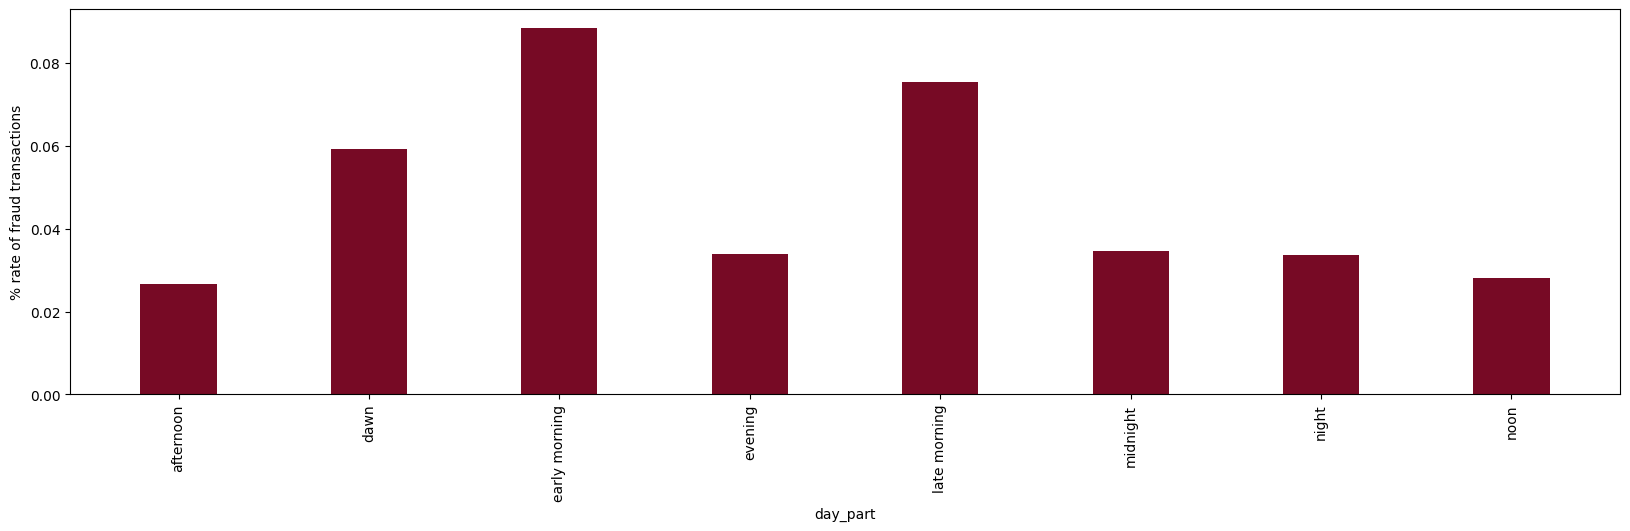

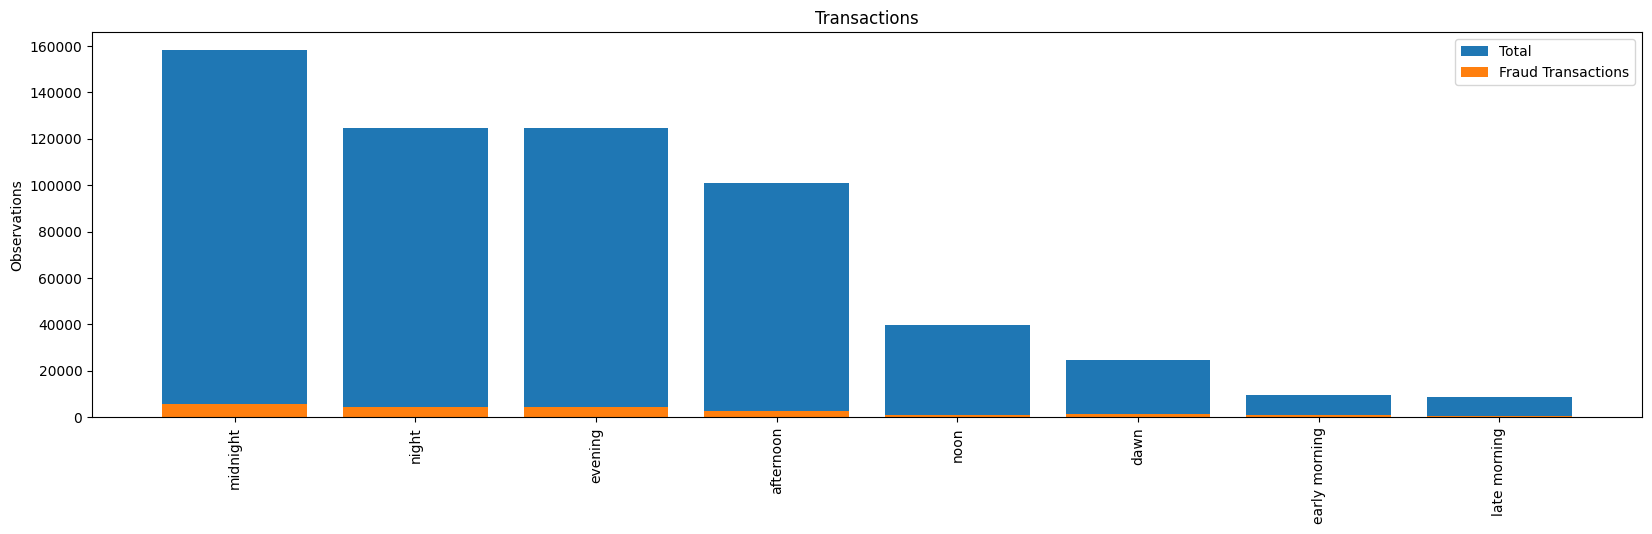



        day_part  isFraud   total  % Occurence  Avg Fraud
5       midnight     5490  158075     0.267679   0.034730
6          night     4193  124562     0.210929   0.033662
3        evening     4214  124477     0.210785   0.033854
0      afternoon     2688  100885     0.170835   0.026644
7           noon     1109   39593     0.067045   0.028010
1           dawn     1452   24540     0.041555   0.059169
2  early morning      860    9711     0.016444   0.088559
4   late morning      657    8697     0.014727   0.075543


In [ ]:
plot_features(df_train, 'day_part', 'isFraud')

**Observation:** Even though early morning and late morning transactions are extremely rare across all categories, these two times also have a particularly high fraud rate in comparison to other times.

In [ ]:
# converting weekday feature into categorical variables
df_train['TransactionWeekday'] = df_train['TransactionWeekday'].replace(to_replace = [0,1,2,3,4,5,6], 
                                value = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
df_test['TransactionWeekday'] = df_test['TransactionWeekday'].replace(to_replace = [0,1,2,3,4,5,6], 
                                value = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])

# converting Month feature into categorical variables
df_train['TransactionMonth'] = df_train['TransactionMonth'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], 
                              value = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
                                       'october', 'november', 'december'])
df_test['TransactionMonth'] = df_test['TransactionMonth'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], 
                              value = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
                                       'october', 'november', 'december'])

In [ ]:
# removing datetime features
df_train = df_train.drop(['TransactionDate', 'TransactionDateTime'], axis=1)
df_test = df_test.drop(['TransactionDate', 'TransactionDateTime'], axis=1)

In [ ]:
# concatinating newly created categorical features
new_feats = ['TransactionMonth','TransactionWeekday', 'TransactionHours', 'TransactionMin', 'TransactionDay', 'day_part']
cat_fea += new_feats
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud', 'TransactionID']]

In [ ]:
selected_features = forward_feature_selection(df_train, df_test, new_features=new_feats, old_features=cols)

Forward feature selection on 6 features <-->  current best score 0.9106586060389709 with 222 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['TransactionMonth']
fitting model on 223 features
[0]	validation_0-auc:0.83653
[50]	validation_0-auc:0.90645
[100]	validation_0-auc:0.90409
[150]	validation_0-auc:0.90617
Score not improved on adding TransactionMonth
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['TransactionWeekday']
fitting model on 223 features
[0]	validation_0-auc:0.83638
[50]	validation_0-auc:0.90564
[100]	validation_0-auc:0.90541
[150]	validation_0-auc:0.90754
[200]	validation_0-auc:0.90778
[250]	validation_0-auc:0.90787
[300]	validation_0-auc:0.90807
[350]	validation_0-auc:0.90886
[400]	validation_0-auc:0.90917
[450]	validation_0-auc:0.90952
[500]	v

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(new_feats) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# available categorical features
cat_fea = list(set(cat_fea) - set(to_discard))

### Normalizing D_features

D_features is a timedelta that relates to things like how long has passed since the card was first used or the date of the first transaction, among other things.

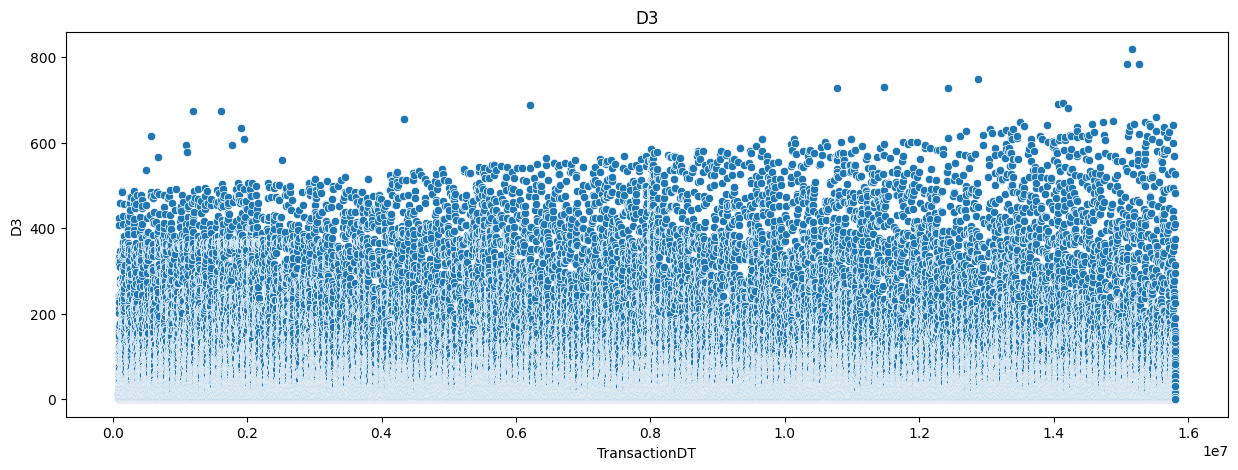

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='TransactionDT', y='D3', data=df_train)
plt.title('D3')
plt.show()

**Observation:**

Following Inferences can be made from the above plot,
1. Since each feature is a time delta, which will undoubtedly increase over time, D_features are growing over time, which is pretty evident.
2. Having the exact day instead of the number of days would be much better, and we can retrieve this information by simply subtracting TransactionDay from each of the D_features.

In [ ]:
# Normalizing D features
d_features = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']

for fea in d_features:
    df_train[fea + 'norm'] =  df_train[fea] - df_train['TransactionDT']/np.float32(24*60*60)
    df_test[fea + 'norm'] = df_test[fea] - df_test['TransactionDT']/np.float32(24*60*60)

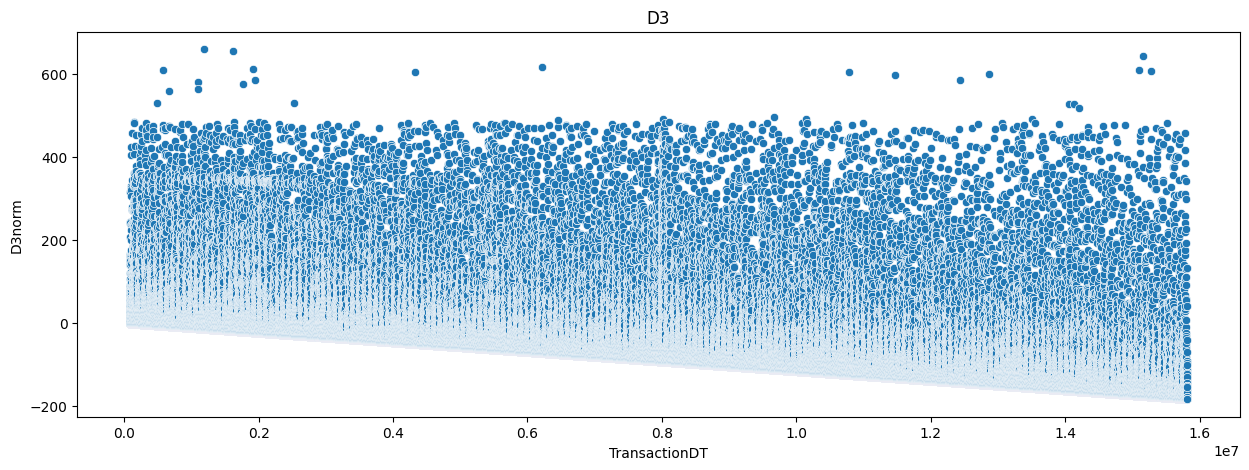

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='TransactionDT', y='D3norm', data=df_train)
plt.title('D3')
plt.show()

In [ ]:
# backward feature selection on newly d_norm features
d_norm_features = ['D1norm', 'D2norm', 'D3norm', 'D4norm', 'D5norm', 'D6norm', 'D7norm', 'D8norm', 'D9norm', 'D10norm', 
                   'D11norm', 'D12norm', 'D13norm', 'D14norm', 'D15norm']
num_fea += d_norm_features
cols = [col for col in df_train.columns if col not in d_norm_features and col not in ['isFraud', 'TransactionID']]

In [ ]:
selected_features = forward_feature_selection(df_train, df_test, new_features=d_norm_features, old_features=cols)

Forward feature selection on 15 features <-->  current best score 0.9129916704325116 with 223 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['D1norm']
fitting model on 224 features
[0]	validation_0-auc:0.82717
[50]	validation_0-auc:0.90876
[100]	validation_0-auc:0.90777
[150]	validation_0-auc:0.90955
[157]	validation_0-auc:0.90961
Score not improved on adding D1norm
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['D2norm']
fitting model on 224 features
[0]	validation_0-auc:0.82717
[50]	validation_0-auc:0.90544
[100]	validation_0-auc:0.90628
[150]	validation_0-auc:0.90905
[200]	validation_0-auc:0.90985
[250]	validation_0-auc:0.90964
[300]	validation_0-auc:0.90960
[314]	validation_0-auc:0.90964
Score not improved on adding D2norm
---------------------------------

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(d_norm_features) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# available numerical features
num_fea = list(set(num_fea) - set(to_discard))

### Natural Logarithm of TransactionAmt

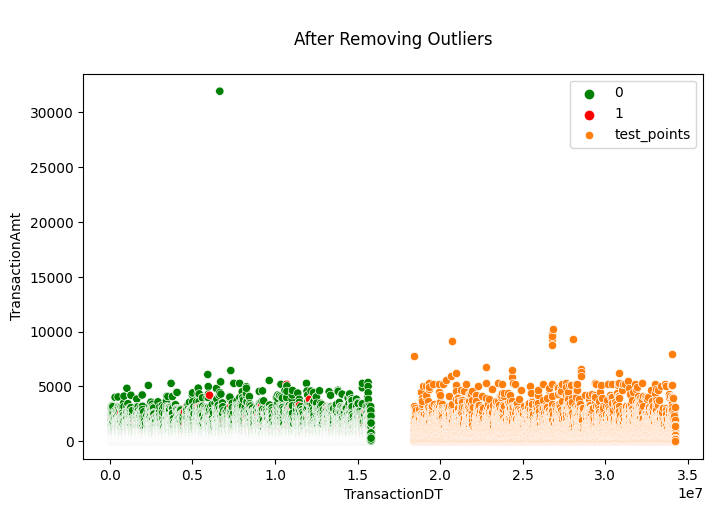

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(y='TransactionAmt', x='TransactionDT', hue='isFraud', data=df_train,  palette =['green','red'])
sns.scatterplot(y='TransactionAmt', x='TransactionDT', data=df_test, label= 'test_points')
plt.title('\nAfter Removing Outliers\n')
plt.show()

In [ ]:
# There is one extreme outlier in TransactionAmt
# We will remove that outlier
df_train = df_train[df_train['TransactionAmt']<30000]

In [ ]:
df_train['TransactionAmt_log'] = np.log(df_train['TransactionAmt'])
df_test['TransactionAmt_log'] = np.log(df_test['TransactionAmt'])

In [ ]:
num_fea += ['TransactionAmt_log']

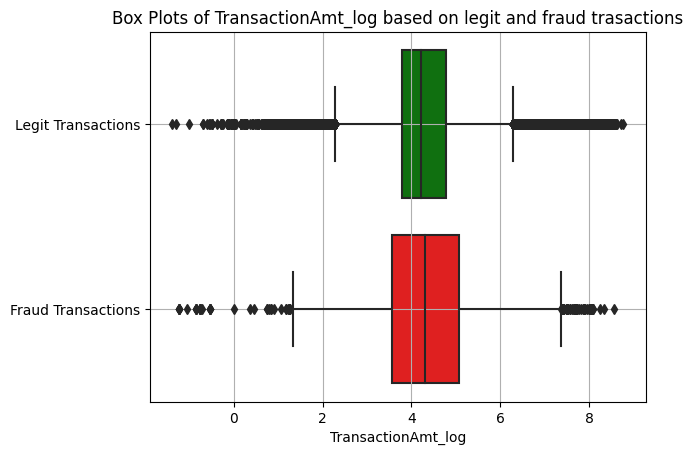



*Five Number Summary*
+------------------------------------------+-------------------------------------------+-------------------------------------------+
|           Feature Discription            | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+------------------------------------------+-------------------------------------------+-------------------------------------------+
|          count    590538.000000          |           count    569875.000000          |           count    20663.000000           |
|          mean          4.363843          |           mean          4.364323          |           mean         4.350618           |
|          std           0.953974          |           std           0.946911          |           std          1.131474           |
|          min          -1.382302          |           min          -1.382302          |           min         -1.231001           |
|          25%           3.768638          | 

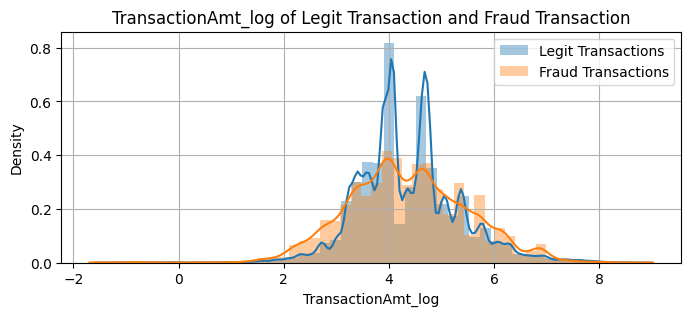

In [ ]:
analysis_num_fea(df_train, 'TransactionAmt_log', 'isFraud')

**Observation:** When examining a density plot. As can be seen, the distribution of fraudulent transactions resembles normal distribution. The data was appropriately right skewed before to conversion to log.

In [ ]:
cols = [col for col in df_train.columns if col not in ['TransactionAmt_log'] and col not in ['isFraud', 'TransactionID']]

# feature selection on 'TransactionAmt_log'
selected_features = forward_feature_selection(df_train, df_test, new_features=['TransactionAmt_log'], old_features=cols)

Forward feature selection on 1 features <-->  current best score 0.9209778472023039 with 226 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['TransactionAmt_log']
fitting model on 227 features
[0]	validation_0-auc:0.83793
[50]	validation_0-auc:0.90906
[100]	validation_0-auc:0.90992
[150]	validation_0-auc:0.91335
[200]	validation_0-auc:0.91428
[250]	validation_0-auc:0.91454
[300]	validation_0-auc:0.91502
[350]	validation_0-auc:0.91497
[400]	validation_0-auc:0.91507
[450]	validation_0-auc:0.91494
[496]	validation_0-auc:0.91493
Score not improved on adding TransactionAmt_log
--------------------------------------------------------------------------------
None of the features improving the score in this iteration
Useful new features : []
Best score : 0.9209778472023039


In [ ]:
# discarding rejected features in feature selection
df_train.drop(['TransactionAmt_log'], axis=1, inplace=True)
df_test.drop(['TransactionAmt_log'], axis=1, inplace=True)

num_fea.remove('TransactionAmt_log')

### Transforming TransactionAmt into cents

In [ ]:
# TRANSACTION AMT CENTS
df_train['cents'] = (df_train['TransactionAmt'] - np.floor(df_train['TransactionAmt'])).astype('float32')
df_test['cents'] = (df_test['TransactionAmt'] - np.floor(df_test['TransactionAmt'])).astype('float32')
num_fea += ['cents']

In [ ]:
cols = [col for col in df_train.columns if col not in ['cents'] and col not in ['isFraud', 'TransactionID']]

# feature selection on 'cents'
selected_features = forward_feature_selection(df_train, df_test, new_features=['cents'], old_features=cols)

Forward feature selection on 1 features <-->  current best score 0.9209778472023039 with 226 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['cents']
fitting model on 227 features
[0]	validation_0-auc:0.83714
[50]	validation_0-auc:0.91209
[100]	validation_0-auc:0.91287
[150]	validation_0-auc:0.91531
[200]	validation_0-auc:0.91560
[250]	validation_0-auc:0.91464
[282]	validation_0-auc:0.91594
Score not improved on adding cents
--------------------------------------------------------------------------------
None of the features improving the score in this iteration
Useful new features : []
Best score : 0.9209778472023039


In [ ]:
# discarding rejected features in feature selection
df_train.drop(['cents'], axis=1, inplace=True)
df_test.drop(['cents'], axis=1, inplace=True)

num_fea.remove('cents')

### Device Parent Company and Device Version Features

In [ ]:
# https://www.kaggle.com/davidcairuz/feature-engineering-lightgbm?select=submission.csv

def parent_DeviceInfo(df):
    '''
    Utility Function to map deice name to its parent company.
    '''

    df['parent_device'] = df['DeviceInfo']
    
    df.loc[df['DeviceInfo'].str.contains('HUAWEI|HONOR', case=False, na=False, regex=True), 'parent_device'] = 'HUAWEI'
    df.loc[df['DeviceInfo'].str.contains('OS', na=False, regex=False), 'parent_device'] = 'Apple'
    df.loc[df['DeviceInfo'].str.contains('Idea|TA', case=False, na=False), 'parent_device'] = 'Lenovo'
    df.loc[df['DeviceInfo'].str.contains('Moto|XT|Edison', case=False, na=False), 'parent_device'] = 'Motorola'
    df.loc[df['DeviceInfo'].str.contains('MI|Mi|Redmi', na=False), 'parent_device'] = 'Mi'
    df.loc[df['DeviceInfo'].str.contains('VS|LG|EGO', na=False), 'parent_device'] = 'LG'
    df.loc[df['DeviceInfo'].str.contains('ONE TOUCH|ALCATEL', na=False, case=False), 'parent_device'] = 'ONEPLUS'
    df.loc[df['DeviceInfo'].str.contains('OPR6', na=False, regex=False), 'parent_device'] = 'HTC'
    df.loc[df['DeviceInfo'].str.contains('Nexus|Pixel', case=False, na=False, regex=True), 'parent_device'] = 'google'
    df.loc[df['DeviceInfo'].str.contains('STV', na=False, regex=False), 'parent_device'] = 'blackberry'
    df.loc[df['DeviceInfo'].str.contains('ASUS', case=False, na=False, regex=False), 'parent_device'] = 'Asus'
    df.loc[df['DeviceInfo'].str.contains('BLADE', case=False, na=False, regex=False), 'parent_device'] = 'ZTE'
    df.loc[df['DeviceInfo'].str.contains('SM', case=False, na=False, regex=False), 'parent_device'] = 'SAMSUNG'
    df.loc[df['DeviceInfo'].str.contains('GT_|GT|SGH', na=False), 'parent_device'] = 'SAMSUNG'
    df.loc[df['DeviceInfo'].str.contains('rv:', na=False), 'parent_device'] = 'RV'
    df.loc[df['DeviceInfo'].str.startswith('Z', na=False), 'parent_device'] = 'ZTE'
    df.loc[df['DeviceInfo'].str.startswith('KF', na=False), 'parent_device'] = 'Amazon'
    df.loc[df['DeviceInfo'].str.contains('Linux', na=False), 'parent_device'] = 'Linux'
    df.loc[df['DeviceInfo'].str.contains('Trident_', na=False), 'parent_device'] = 'Trident'

    
    for i in ['D', 'E', 'F', 'G']:
        df.loc[df['DeviceInfo'].str.startswith(i, na=False), 'parent_device'] = 'Sony'
        
    df.loc[df.parent_device.isin(df.parent_device.value_counts()[df.parent_device.value_counts() < 200].index), 'parent_device'] = "Others"

    return df
    

In [ ]:
# adding parent company
df_train = parent_DeviceInfo(df_train)
df_test = parent_DeviceInfo(df_test)

# adding device version
df_train['device_version'] = [np.nan if (pd.isna(v)) or (len(v.split('_'))<=1) else ("_".join(v.split('_')[1:])) for v in df_train['DeviceInfo'].values]
df_test['device_version'] = [np.nan if (pd.isna(v)) or (len(v.split('_'))<=1) else ("_".join(v.split('_')[1:])) for v in df_test['DeviceInfo'].values]



*Five Number Summary*
+------------------------------------+-------------------------------------------+-------------------------------------------+
|        Feature Discription         | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+------------------------------------+-------------------------------------------+-------------------------------------------+
|         count      118666          |             count      110059             |             count        8607             |
|         unique         15          |             unique         15             |             unique         15             |
|         top       Windows          |             top       Windows             |             top       Windows             |
|         freq        47722          |             freq        44601             |             freq         3121             |
| Name: parent_device, dtype: object |     Name: parent_device, dtype: object    |     

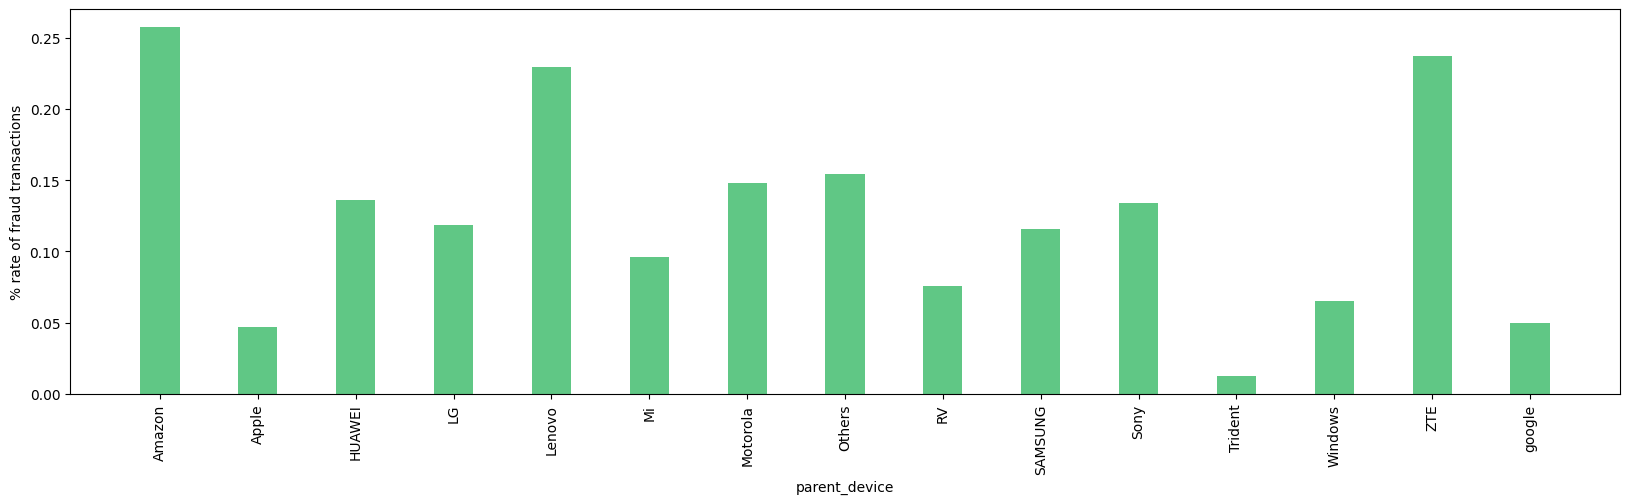

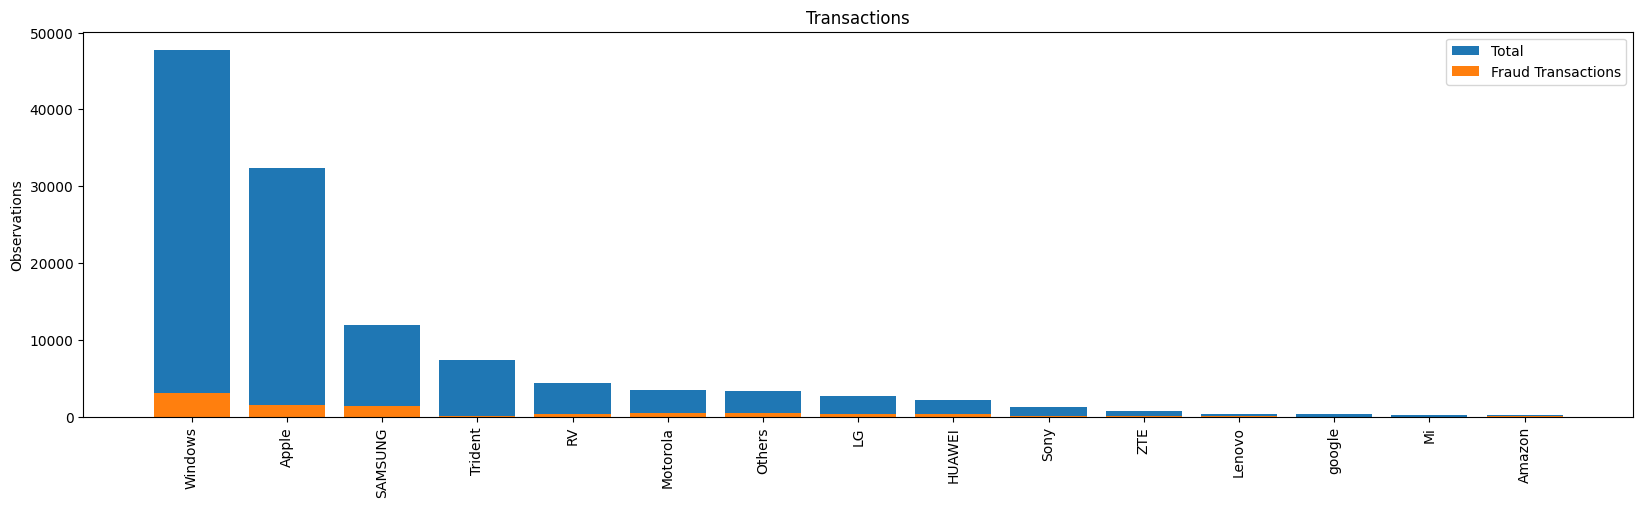



   parent_device  isFraud  total  % Occurence  Avg Fraud
12       Windows     3121  47722     0.080811   0.065400
1          Apple     1518  32355     0.054789   0.046917
9        SAMSUNG     1386  11981     0.020288   0.115683
11       Trident       96   7440     0.012599   0.012903
8             RV      333   4385     0.007425   0.075941
6       Motorola      522   3529     0.005976   0.147917
7         Others      512   3320     0.005622   0.154217
3             LG      326   2750     0.004657   0.118545
2         HUAWEI      299   2193     0.003714   0.136343
10          Sony      162   1209     0.002047   0.133995
13           ZTE      164    692     0.001172   0.236994
4         Lenovo       76    331     0.000561   0.229607
14        google       16    320     0.000542   0.050000
5             Mi       22    229     0.000388   0.096070
0         Amazon       54    210     0.000356   0.257143


In [ ]:
# plotting for feature 'parent_device'
plot_features(df_train, 'parent_device', 'isFraud')

**Observation:** This newly developed feature contains 14 distinct categories, with windows accounting for the majority of occurrences (8.08%). There are several categories where the fraudulent rate is notably high; for example, it is 25.71% for Amazon, 23.69% for ZTE, and 23.52% for Lenovo.

### Adding Parent Domain and Splitting Domain Name and Top Level Domain from P_emaildomain

In [ ]:
# https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499

parent_domain = {'gmail.com':'gmail', 'outlook.com':'microsoft', 
                 'yahoo.com':'yahoo', 'mail.com':'mail', 'anonymous.com':'anonymous', 
                 'hotmail.com':'microsoft', 'verizon.net':'verizon', 'aol.com':'aol', 
                 'me.com':'apple', 'comcast.net':'comcast', 'optonline.net':'optimum', 
                 'cox.net':'cox', 'charter.net':'spectrum', 'rocketmail.com':'yahoo', 
                 'prodigy.net.mx':'AT&T', 'embarqmail.com':'century_link', 'icloud.com':'apple', 
                 'live.com.mx':'microsoft', 'gmail':'gmail', 'live.com':'microsoft', 
                 'att.net':'AT&T', 'juno.com':'juno', 'ymail.com':'yahoo', 
                 'sbcglobal.net':'sbcglobal', 'bellsouth.net':'AT&T', 'msn.com':'microsoft', 
                 'q.com':'century_link','yahoo.com.mx':'yahoo', 'centurylink.net':'century_link',  
                 'servicios-ta.com':'asur','earthlink.net':'earthlink', 'hotmail.es':'microsoft', 
                 'cfl.rr.com':'spectrum', 'roadrunner.com':'spectrum','netzero.net':'netzero', 
                 'gmx.de':'gmx','suddenlink.net':'suddenlink','frontiernet.net':'frontier', 
                 'windstream.net':'windstream','frontier.com':'frontier','outlook.es':'microsoft', 
                 'mac.com':'apple','netzero.com':'netzero','aim.com':'aol', 
                 'web.de':'web_de','twc.com':'whois','cableone.net':'sparklight', 
                 'yahoo.fr':'yahoo','yahoo.de':'yahoo','yahoo.es':'yahoo', 'scranton.edu':'scranton', 
                 'sc.rr.com':'sc_rr','ptd.net':'ptd','live.fr':'microsoft', 
                 'yahoo.co.uk':'yahoo','hotmail.fr':'microsoft','hotmail.de':'microsoft', 
                 'hotmail.co.uk':'microsoft','protonmail.com':'protonmail','yahoo.co.jp':'yahoo'}

In [ ]:
train_P_emaildomain = df_train['P_emaildomain']
test_P_emaildomain = df_test['P_emaildomain']

df_train['P_parent_domain'] = [np.nan if pd.isna(dom) else parent_domain[dom] for dom in train_P_emaildomain] 
df_test['P_parent_domain'] = [np.nan if pd.isna(dom) else parent_domain[dom] for dom in test_P_emaildomain]

df_train['P_domain_name'] = [np.nan if pd.isna(add) else add.split('.')[0] for add in train_P_emaildomain]
df_test['P_domain_name'] = [np.nan if pd.isna(add) else add.split('.')[0] for add in test_P_emaildomain]

df_train['P_top_level_domain'] = [np.nan if (pd.isna(add)) or (len(add.split('.'))<=1) else '.'.join(add.split('.')[1:]) for add in train_P_emaildomain]
df_test['P_top_level_domain'] = [np.nan if (pd.isna(add)) or (len(add.split('.'))<=1) else '.'.join(add.split('.')[1:]) for add in test_P_emaildomain]



*Five Number Summary*
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|         Feature Discription          | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|           count     496082           |              count     478209             |              count     17873              |
|           unique        29           |              unique        29             |              unique       23              |
|           top        gmail           |              top        gmail             |              top       gmail              |
|           freq      228851           |              freq      218897             |              freq       9954              |
| Name: P_parent_domain, dtype: object |    Name: P_parent_domain, dtype:

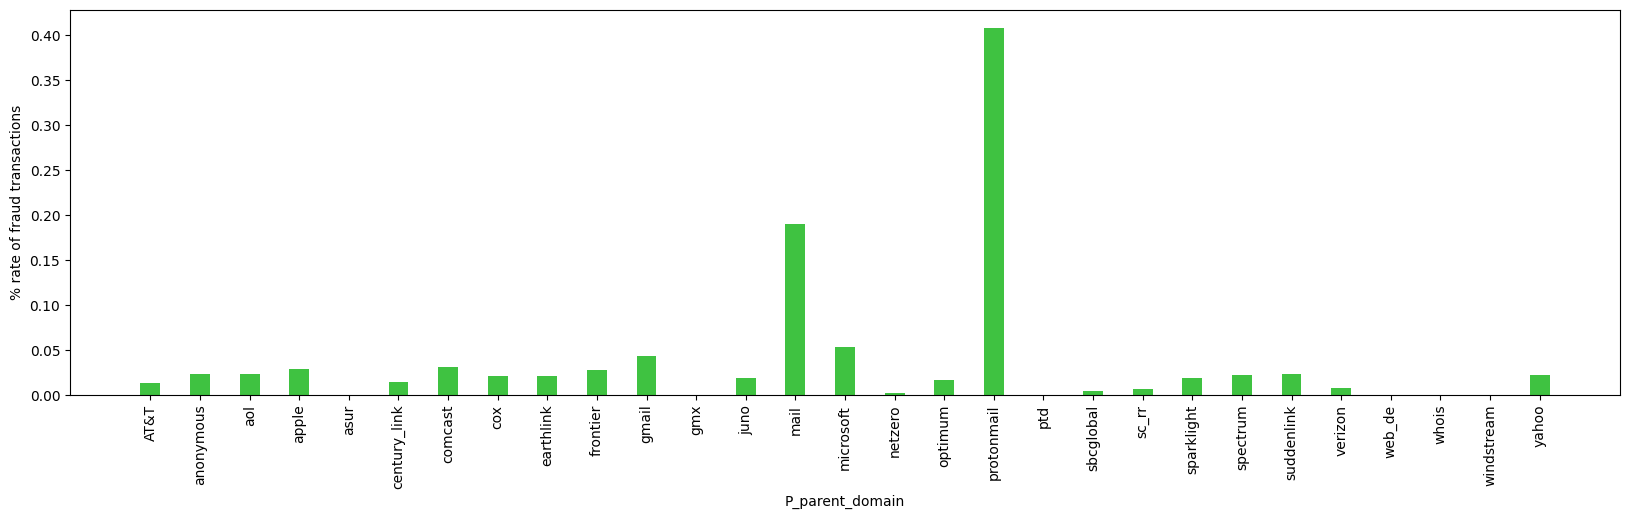

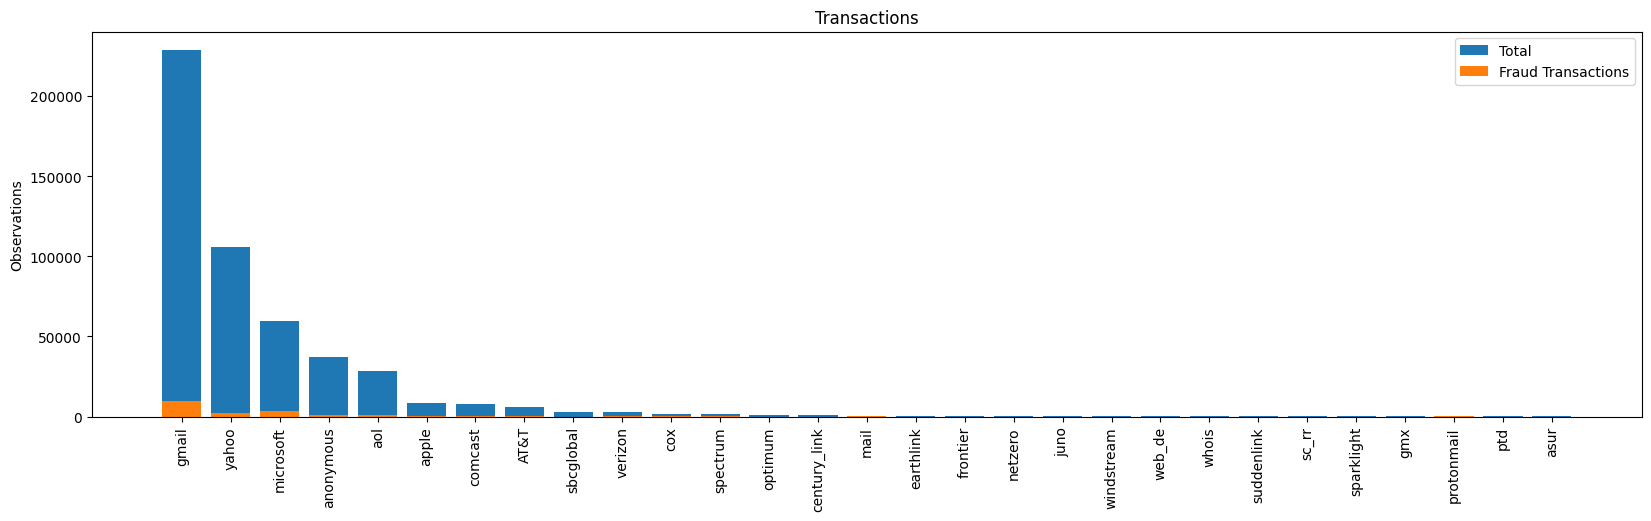



   P_parent_domain  isFraud   total  % Occurence  Avg Fraud
10           gmail     9954  228851     0.387530   0.043496
28           yahoo     2372  105967     0.179441   0.022384
14       microsoft     3170   59477     0.100717   0.053298
1        anonymous      859   36998     0.062651   0.023217
2              aol      657   28604     0.048437   0.022969
3            apple      238    8225     0.013928   0.028936
6          comcast      246    7888     0.013357   0.031187
0             AT&T       84    6149     0.010413   0.013661
19       sbcglobal       12    2970     0.005029   0.004040
24         verizon       22    2705     0.004581   0.008133
7              cox       29    1393     0.002359   0.020818
22        spectrum       28    1293     0.002190   0.021655
16         optimum       17    1011     0.001712   0.016815
5     century_link        9     654     0.001107   0.013761
13            mail      106     559     0.000947   0.189624
8        earthlink       11     514   

In [ ]:
# plotting for feature 'P_parent_domain'
plot_features(df_train, 'P_parent_domain', 'isFraud')

**Observation:** The most frequent domain is gmail, which occurs 38.75% of the time. Yahoo and Microsoft were next, appearing 17.94% and 10.07% of the time, respectively. 'Protonmail' is one category where the rate of fraudulent transactions is fairly high at 40.78%. Additionally, there is an 18.96% possibility that a domain name ending in "mail" will be a fraudulent transaction.



*Five Number Summary*
+------------------------------------+-------------------------------------------+-------------------------------------------+
|        Feature Discription         | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+------------------------------------+-------------------------------------------+-------------------------------------------+
|          count     496082          |              count     478209             |              count     17873              |
|          unique        44          |              unique        44             |              unique       35              |
|          top        gmail          |              top        gmail             |              top       gmail              |
|          freq      228851          |              freq      218897             |              freq       9954              |
| Name: P_domain_name, dtype: object |     Name: P_domain_name, dtype: object    |     

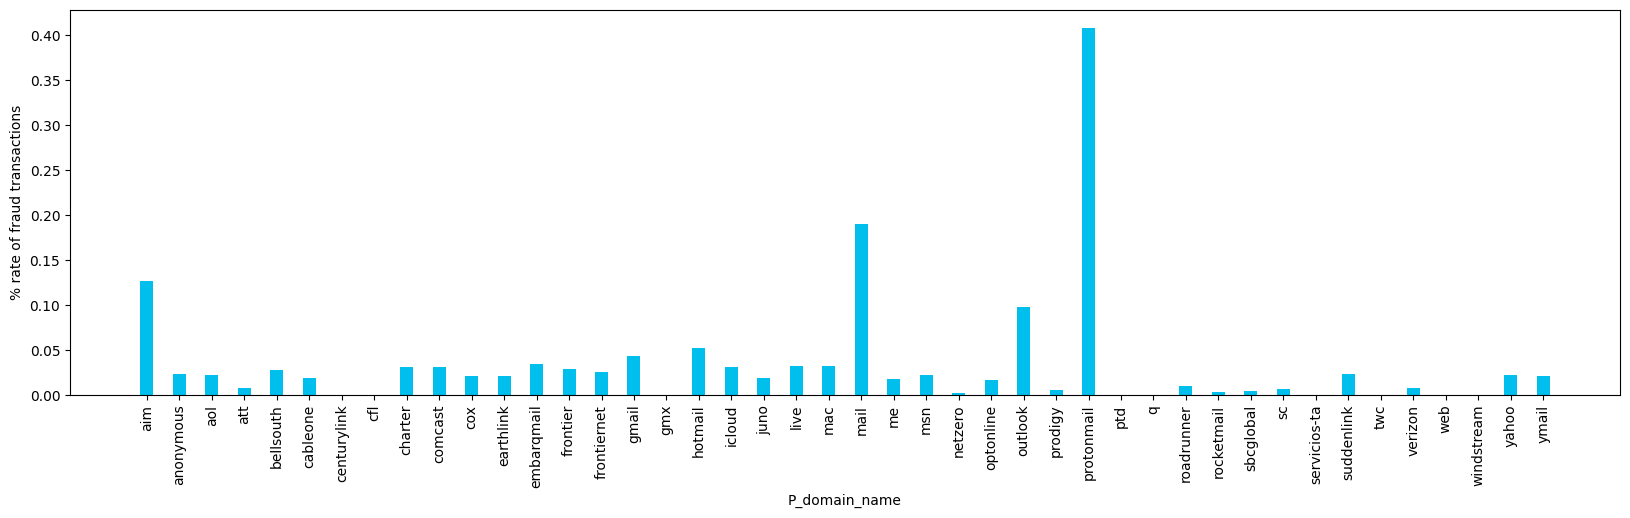

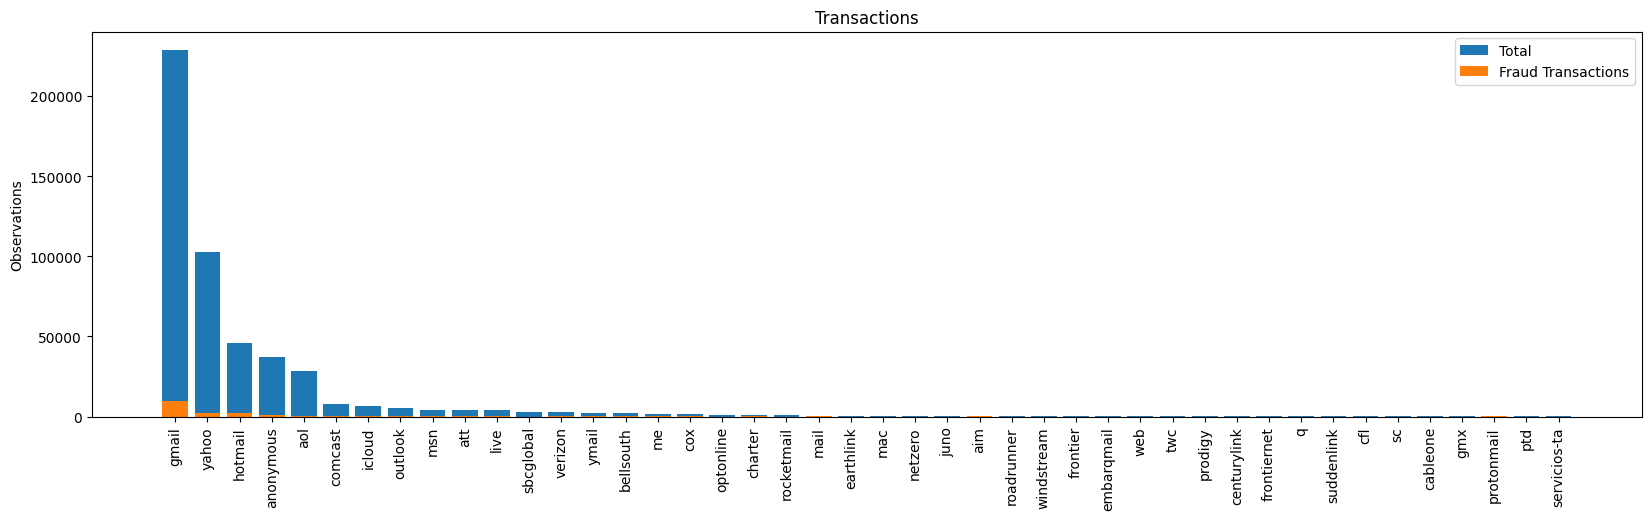



   P_domain_name  isFraud   total  % Occurence  Avg Fraud
15         gmail     9954  228851     0.387530   0.043496
42         yahoo     2320  102907     0.174260   0.022545
17       hotmail     2416   46005     0.077904   0.052516
1      anonymous      859   36998     0.062651   0.023217
2            aol      617   28289     0.047904   0.021811
9        comcast      246    7888     0.013357   0.031187
18        icloud      197    6267     0.010612   0.031434
27       outlook      539    5534     0.009371   0.097398
24           msn       90    4092     0.006929   0.021994
3            att       30    4033     0.006829   0.007439
20          live      125    3846     0.006513   0.032501
34     sbcglobal       12    2970     0.005029   0.004040
39       verizon       22    2705     0.004581   0.008133
43         ymail       50    2396     0.004057   0.020868
4      bellsouth       53    1909     0.003233   0.027763
23            me       27    1522     0.002577   0.017740
10          

In [ ]:
# plotting for feature 'P_domain_name'
plot_features(df_train, 'P_domain_name', 'isFraud')

**Observation:** Although there are more categories, they are all relatively comparable in terms of the "P_parent_domain" feature.



*Five Number Summary*
+-----------------------------------------+-------------------------------------------+-------------------------------------------+
|           Feature Discription           | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+-----------------------------------------+-------------------------------------------+-------------------------------------------+
|             count     495586            |              count     477724             |              count     17862              |
|             unique        10            |              unique        10             |              unique        7              |
|             top          com            |              top          com             |              top         com              |
|             freq      466139            |              freq      448878             |              freq      17261              |
| Name: P_top_level_domain, dtype: object |  Name: P

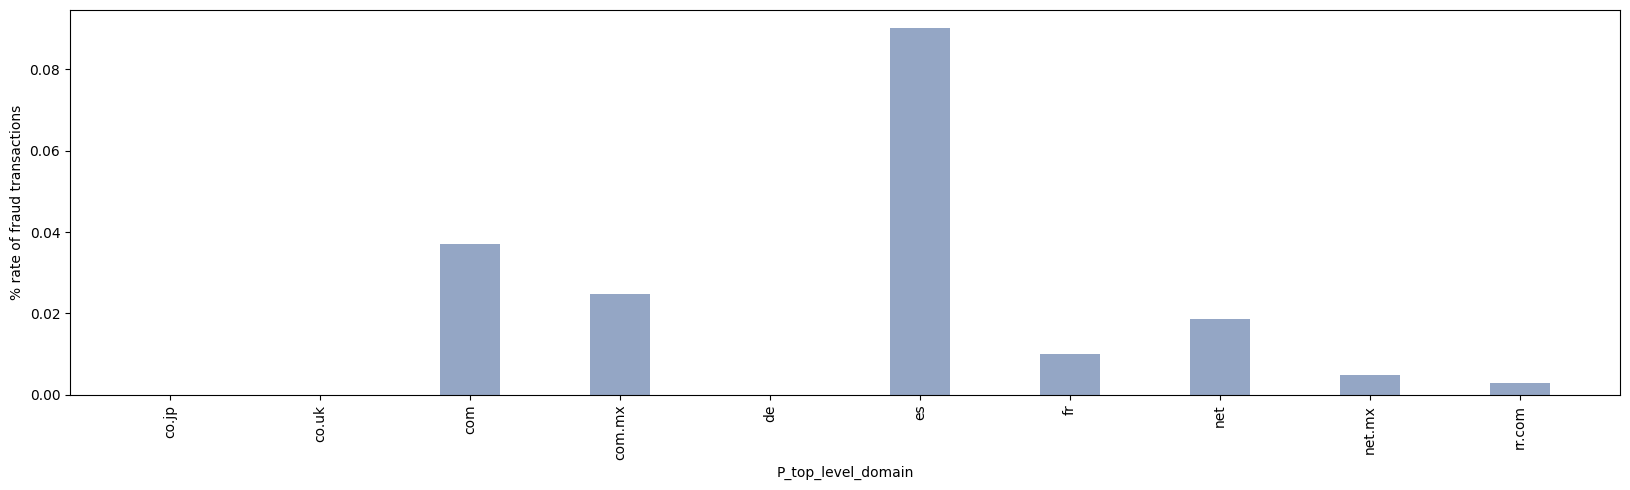

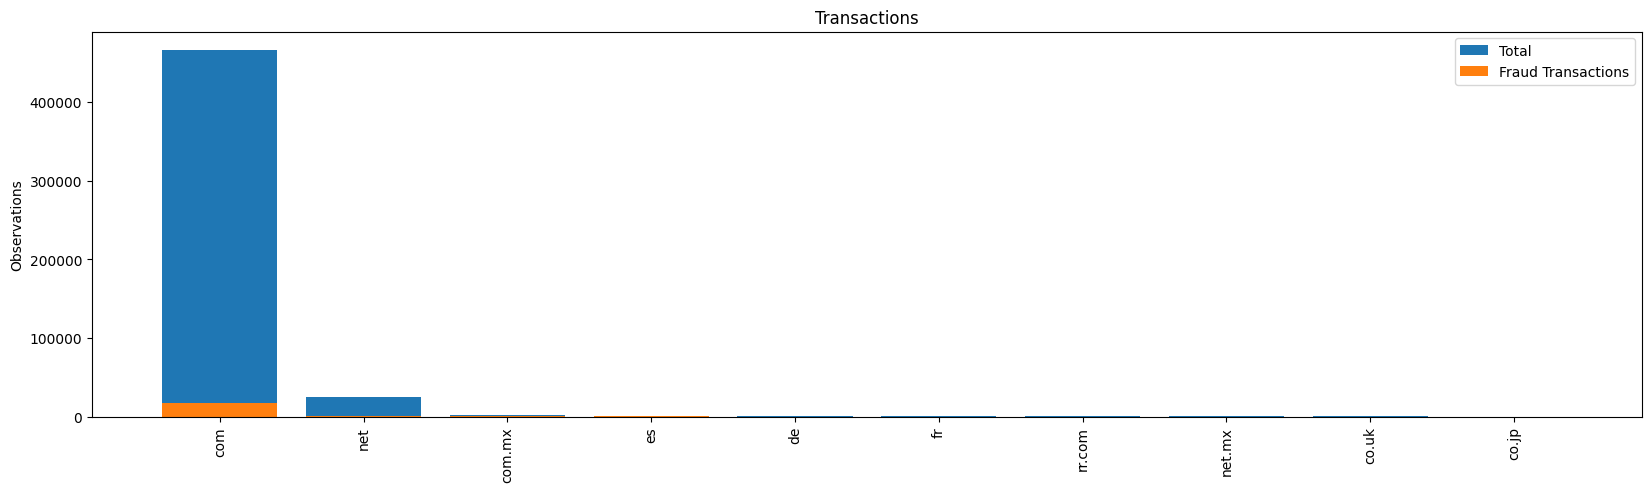



  P_top_level_domain  isFraud   total  % Occurence  Avg Fraud
2                com    17261  466139     0.789346   0.037030
7                net      458   24542     0.041559   0.018662
3             com.mx       57    2292     0.003881   0.024869
5                 es       79     877     0.001485   0.090080
4                 de        0     506     0.000857   0.000000
6                 fr        5     494     0.000837   0.010121
9             rr.com        1     336     0.000569   0.002976
8             net.mx        1     207     0.000351   0.004831
1              co.uk        0     161     0.000273   0.000000
0              co.jp        0      32     0.000054   0.000000


In [ ]:
# plotting for feature 'P_top_level_domain'
plot_features(df_train, 'P_top_level_domain', 'isFraud')

**Observation:** As would be predicted, the 'com' category dominates this feature. The category with the most fraudulent transactions is 'es'.

### Adding Parent Domain and Splitting Domain Name and Top Level Domain from R_emaildomain

In [ ]:
train_R_emaildomain = df_train['R_emaildomain']
test_R_emaildomain = df_test['R_emaildomain']

df_train['R_parent_domain'] = [np.nan if pd.isna(dom) else parent_domain[dom] for dom in train_R_emaildomain] 
df_test['R_parent_domain'] = [np.nan if pd.isna(dom) else parent_domain[dom] for dom in test_R_emaildomain]

df_train['R_domain_name'] = [np.nan if pd.isna(add) else add.split('.')[0] for add in train_R_emaildomain]
df_test['R_domain_name'] = [np.nan if pd.isna(add) else add.split('.')[0] for add in test_R_emaildomain]

df_train['R_top_level_domain'] = [np.nan if (pd.isna(add)) or (len(add.split('.'))<=1) else '.'.join(add.split('.')[1:]) for add in train_R_emaildomain]
df_test['R_top_level_domain'] = [np.nan if (pd.isna(add)) or (len(add.split('.'))<=1) else '.'.join(add.split('.')[1:]) for add in test_R_emaildomain]



*Five Number Summary*
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|         Feature Discription          | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|           count     137291           |              count     126064             |              count     11227              |
|           unique        30           |              unique        30             |              unique       17              |
|           top        gmail           |              top        gmail             |              top       gmail              |
|           freq       57242           |              freq       50431             |              freq       6811              |
| Name: R_parent_domain, dtype: object |    Name: R_parent_domain, dtype:

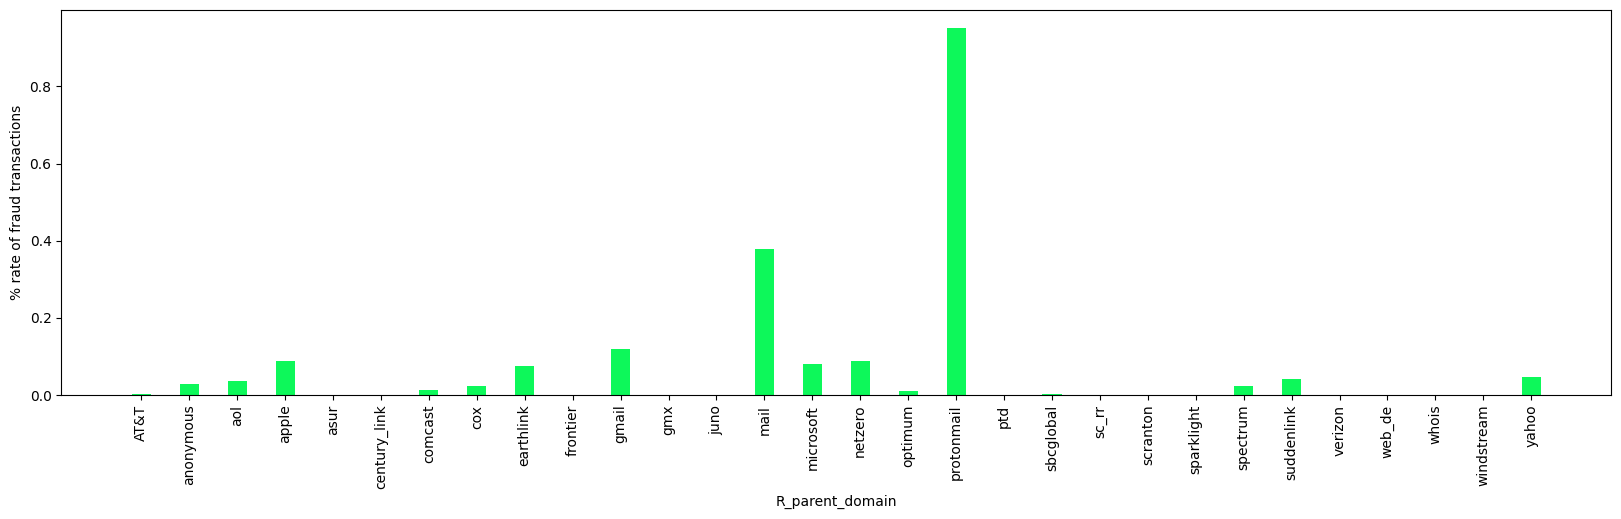

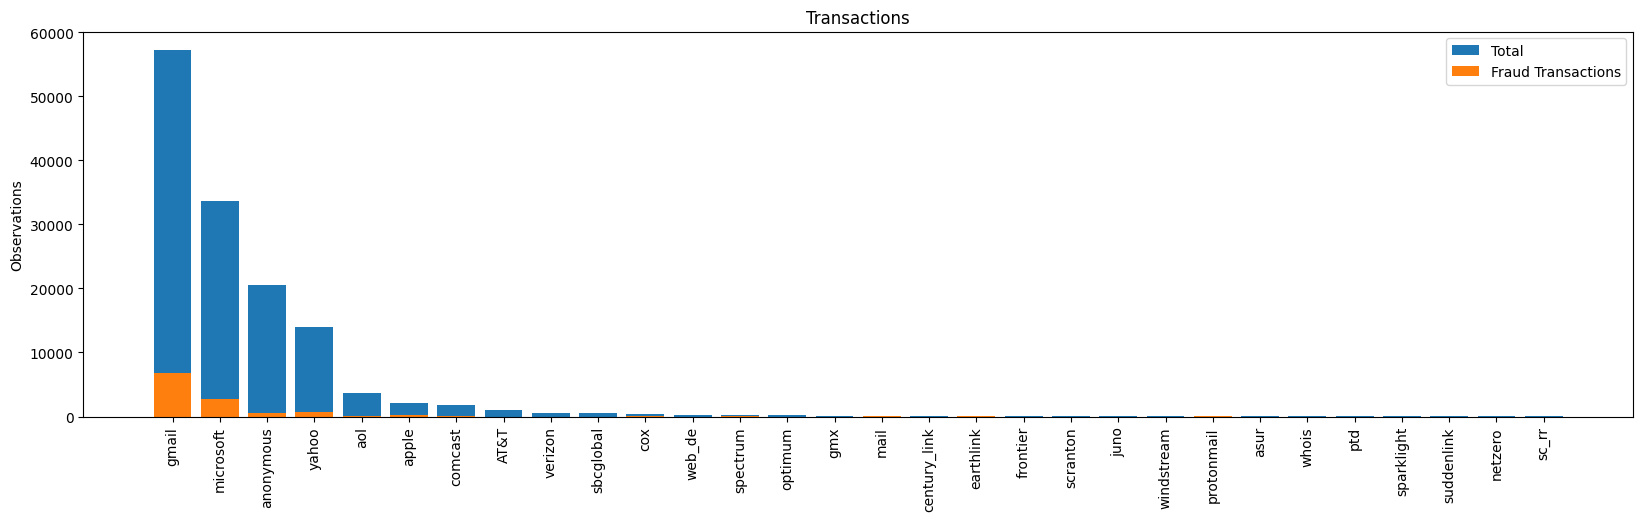



   R_parent_domain  isFraud  total  % Occurence  Avg Fraud
10           gmail     6811  57242     0.096932   0.118986
14       microsoft     2714  33604     0.056904   0.080764
1        anonymous      598  20529     0.034763   0.029130
29           yahoo      644  13967     0.023651   0.046109
2              aol      130   3737     0.006328   0.034787
3            apple      193   2172     0.003678   0.088858
6          comcast       21   1812     0.003068   0.011589
0             AT&T        3   1059     0.001793   0.002833
25         verizon        0    620     0.001050   0.000000
19       sbcglobal        1    552     0.000935   0.001812
7              cox       11    459     0.000777   0.023965
26          web_de        0    237     0.000401   0.000000
23        spectrum        5    217     0.000367   0.023041
16         optimum        2    187     0.000317   0.010695
11             gmx        0    147     0.000249   0.000000
13            mail       46    122     0.000207   0.37

In [ ]:
# plotting for feature 'R_parent_domain'
plot_features(df_train, 'R_parent_domain', 'isFraud')



*Five Number Summary*
+------------------------------------+-------------------------------------------+-------------------------------------------+
|        Feature Discription         | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+------------------------------------+-------------------------------------------+-------------------------------------------+
|          count     137291          |              count     126064             |              count     11227              |
|          unique        45          |              unique        45             |              unique       26              |
|          top        gmail          |              top        gmail             |              top       gmail              |
|          freq       57242          |              freq       50431             |              freq       6811              |
| Name: R_domain_name, dtype: object |     Name: R_domain_name, dtype: object    |     

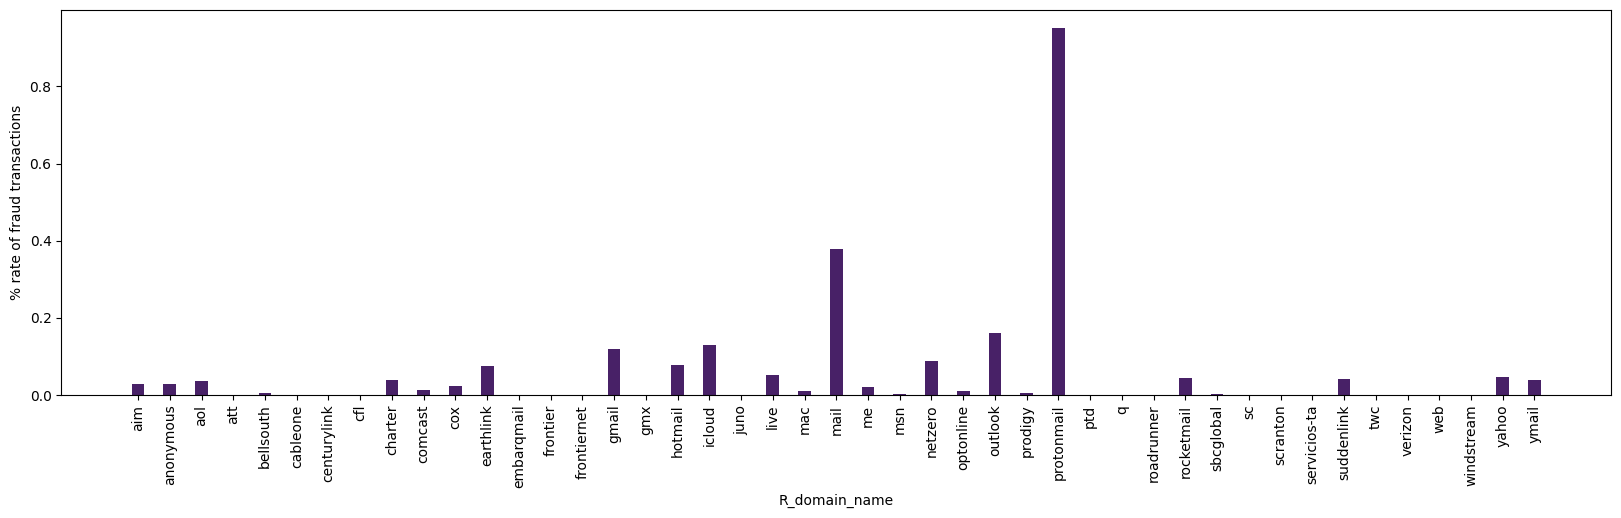

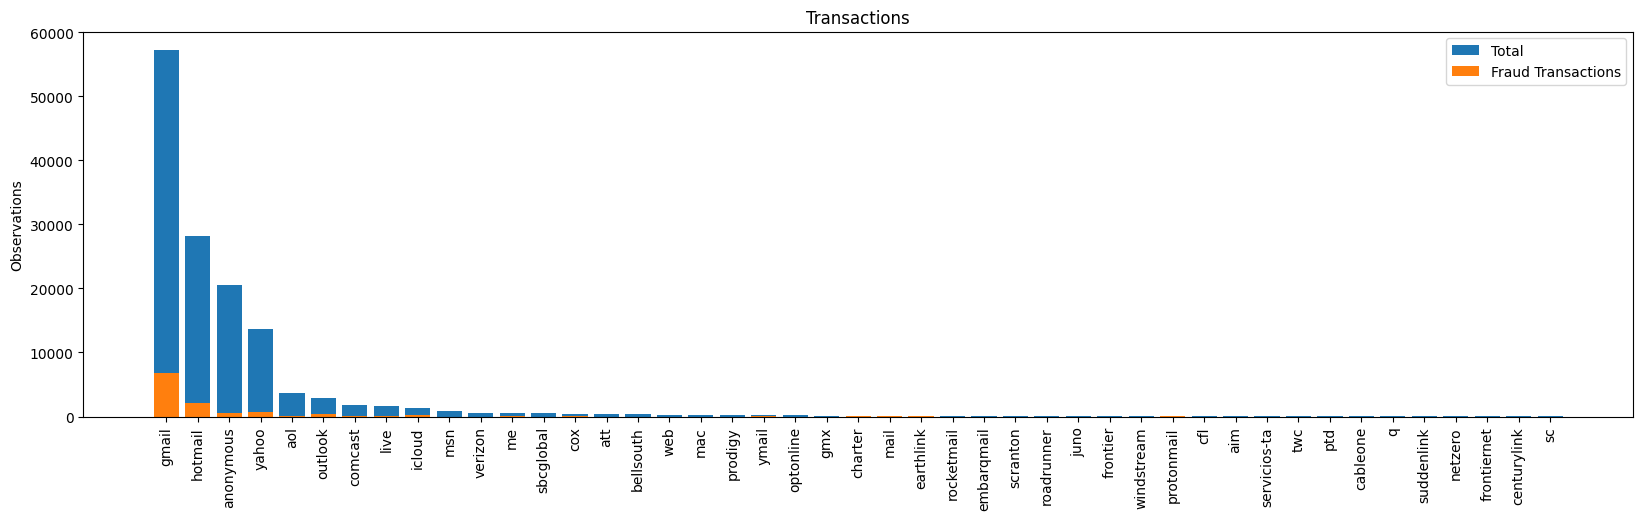



   R_domain_name  isFraud  total  % Occurence  Avg Fraud
15         gmail     6811  57242     0.096932   0.118986
17       hotmail     2160  28241     0.047822   0.076485
1      anonymous      598  20529     0.034763   0.029130
43         yahoo      633  13691     0.023184   0.046235
2            aol      129   3701     0.006267   0.034855
27       outlook      471   2940     0.004979   0.160204
9        comcast       21   1812     0.003068   0.011589
20          live       82   1571     0.002660   0.052196
18        icloud      180   1398     0.002367   0.128755
24           msn        1    852     0.001443   0.001174
40       verizon        0    620     0.001050   0.000000
23            me       11    556     0.000942   0.019784
34     sbcglobal        1    552     0.000935   0.001812
10           cox       11    459     0.000777   0.023965
3            att        0    430     0.000728   0.000000
4      bellsouth        2    422     0.000715   0.004739
41           web        0    

In [ ]:
# plotting for feature 'R_domain_name'
plot_features(df_train, 'R_domain_name', 'isFraud')



*Five Number Summary*
+-----------------------------------------+-------------------------------------------+-------------------------------------------+
|           Feature Discription           | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+-----------------------------------------+-------------------------------------------+-------------------------------------------+
|             count     137196            |              count     125969             |              count     11227              |
|             unique        11            |              unique        11             |              unique        6              |
|             top          com            |              top          com             |              top         com              |
|             freq      127825            |              freq      116794             |              freq      11031              |
| Name: R_top_level_domain, dtype: object |  Name: R

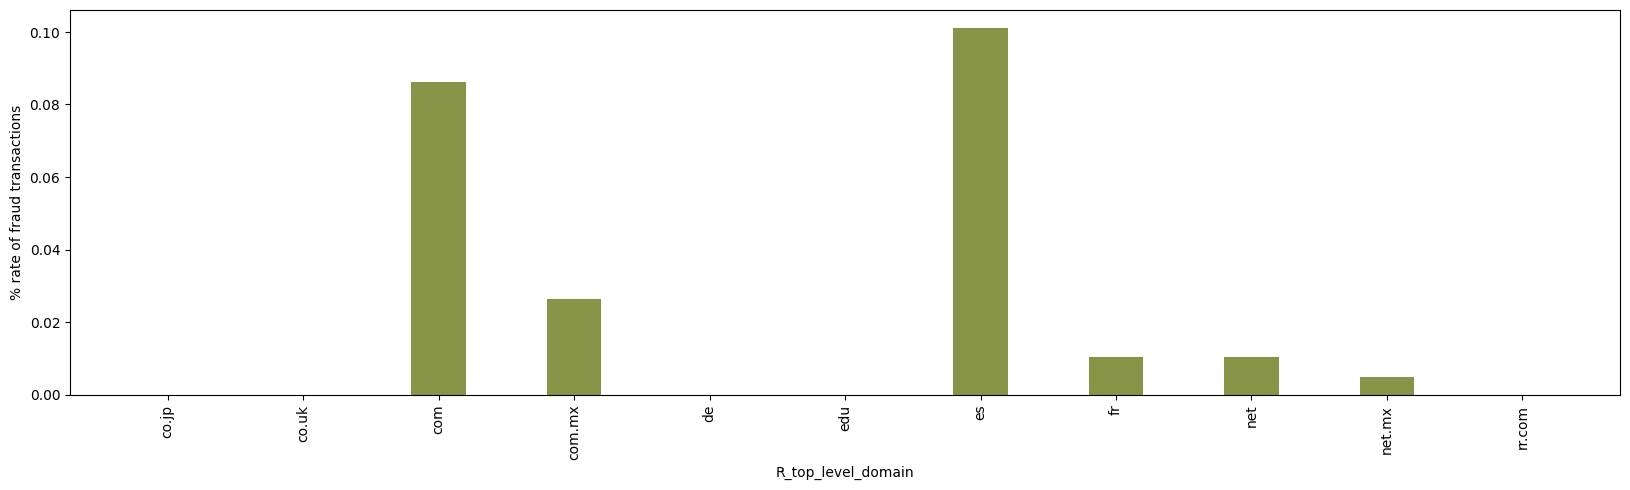

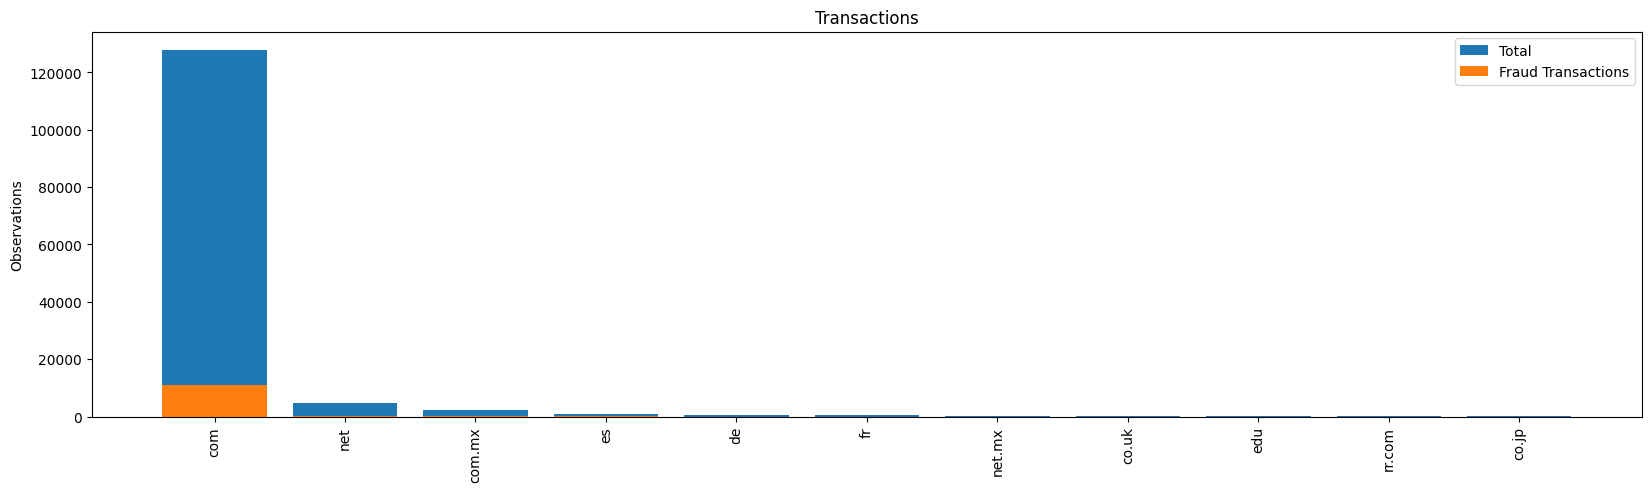



   R_top_level_domain  isFraud   total  % Occurence  Avg Fraud
2                 com    11031  127825     0.216455   0.086298
8                 net       51    4849     0.008211   0.010518
3              com.mx       60    2262     0.003830   0.026525
6                  es       79     782     0.001324   0.101023
4                  de        0     501     0.000848   0.000000
7                  fr        5     485     0.000821   0.010309
9              net.mx        1     207     0.000351   0.004831
1               co.uk        0     144     0.000244   0.000000
5                 edu        0      63     0.000107   0.000000
10             rr.com        0      45     0.000076   0.000000
0               co.jp        0      33     0.000056   0.000000


In [ ]:
# plotting for feature 'R_top_level_domain'
plot_features(df_train, 'R_top_level_domain', 'isFraud')

**Observation:** Observations are quite similar to 'P_domain_features'. The most fraudulent category, with a fraud rate of almost 95%, is still 'protonmail'.

### os_name and os_version features

In [ ]:
df_train['os_name'] = [info if (pd.isna(info)) or (len(info.split('_'))<=1) else  ''.join(info.split('_')[:1]) for info in df_train['id_30']]
df_test['os_name'] = [info if (pd.isna(info)) or (len(info.split('_'))<=1) else  ''.join(info.split('_')[:1]) for info in df_test['id_30']]

df_train['os_version'] = [np.nan if (pd.isna(info)) or (len(info.split('_'))<=1) else '_'.join(info.split('_')[1:]) for info in df_train['id_30']]
df_test['os_version'] = [np.nan if (pd.isna(info)) or (len(info.split('_'))<=1) else '_'.join(info.split('_')[1:]) for info in df_test['id_30']]



*Five Number Summary*
+------------------------------+-------------------------------------------+-------------------------------------------+
|     Feature Discription      | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+------------------------------+-------------------------------------------+-------------------------------------------+
|      count       77565       |             count       74123             |             count        3442             |
|      unique          7       |             unique          7             |             unique          6             |
|      top       Windows       |             top       Windows             |             top       Windows             |
|      freq        36739       |             freq        35471             |             freq         1268             |
| Name: os_name, dtype: object |        Name: os_name, dtype: object       |        Name: os_name, dtype: object       |
+-------

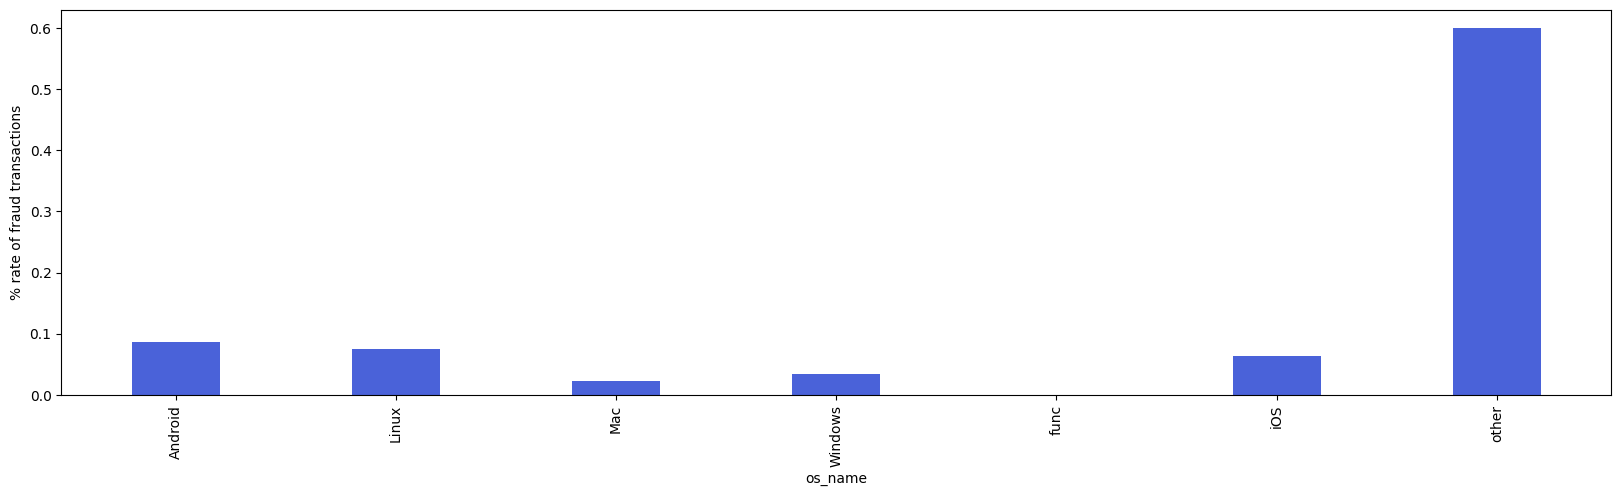

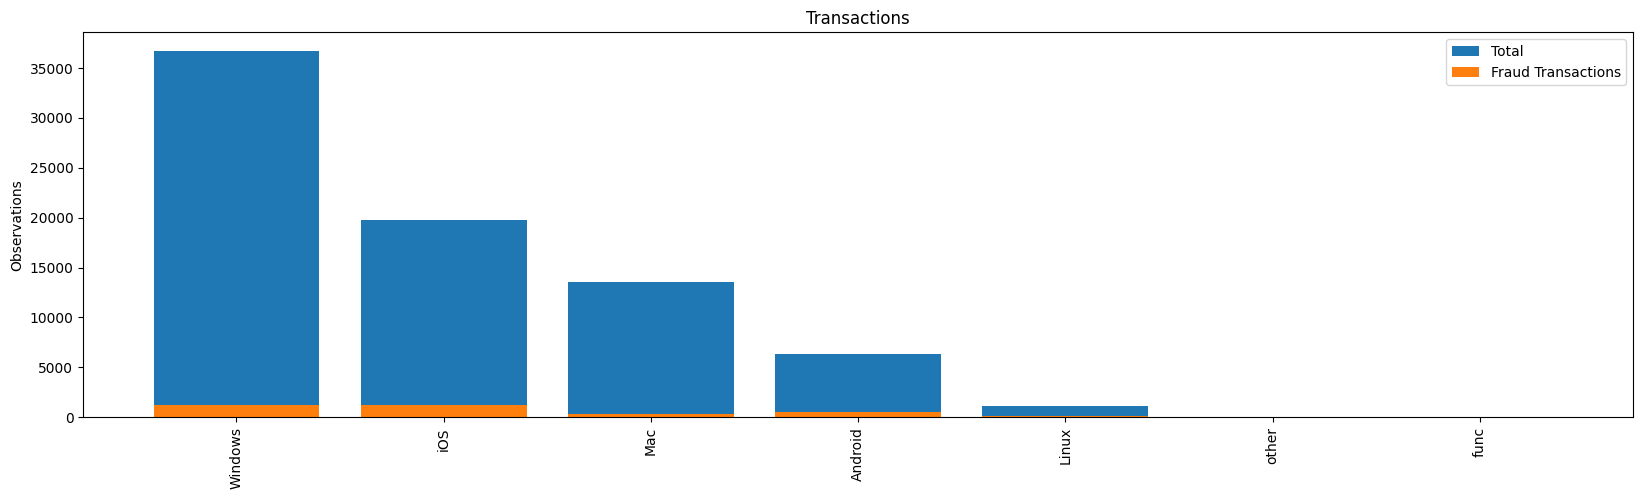



   os_name  isFraud  total  % Occurence  Avg Fraud
3  Windows     1268  36739     0.062213   0.034514
5      iOS     1240  19782     0.033498   0.062683
2      Mac      298  13580     0.022996   0.021944
0  Android      542   6303     0.010673   0.085991
1    Linux       85   1136     0.001924   0.074824
6    other        9     15     0.000025   0.600000
4     func        0     10     0.000017   0.000000


In [ ]:
# plotting for feature 'os_name'
plot_features(df_train, 'os_name', 'isFraud')



*Five Number Summary*
+---------------------------------+-------------------------------------------+-------------------------------------------+
|       Feature Discription       | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+---------------------------------+-------------------------------------------+-------------------------------------------+
|         count     74745         |              count     71521              |               count     3224              |
|         unique       68         |              unique       68              |               unique      54              |
|         top          10         |              top          10              |               top         10              |
|         freq      21155         |              freq      20498              |               freq       657              |
| Name: os_version, dtype: object |      Name: os_version, dtype: object      |      Name: os_version, dtype

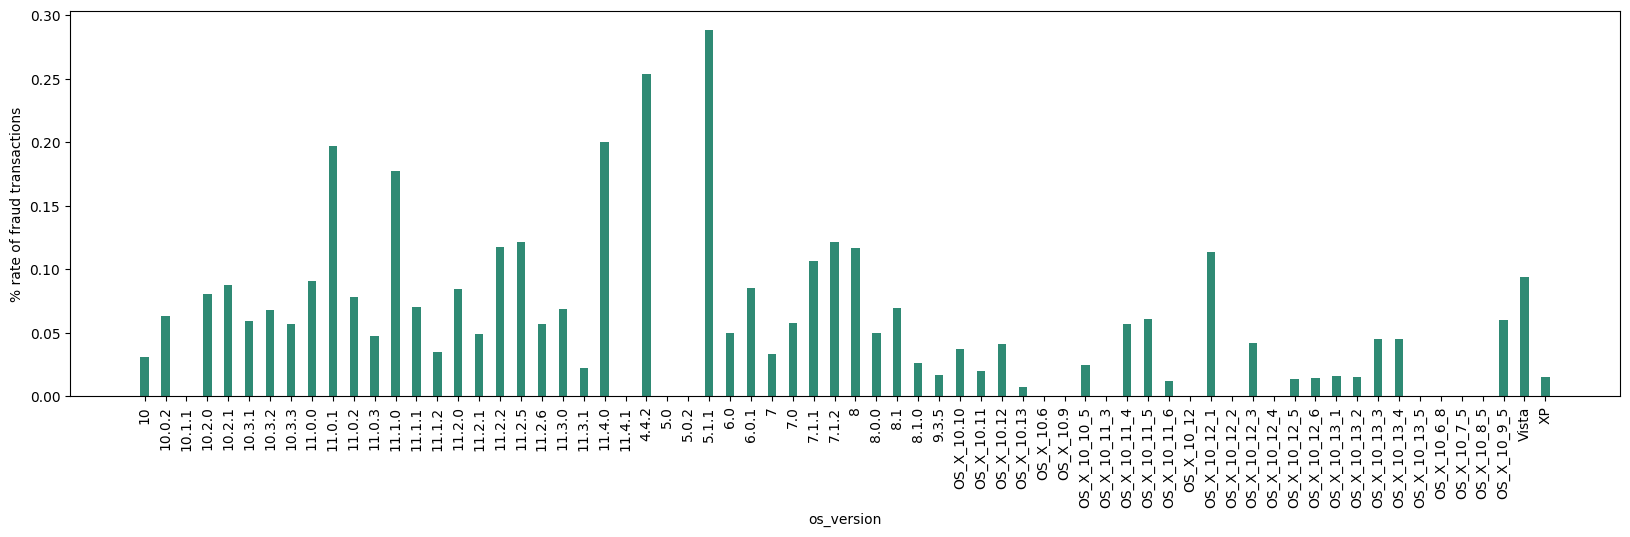

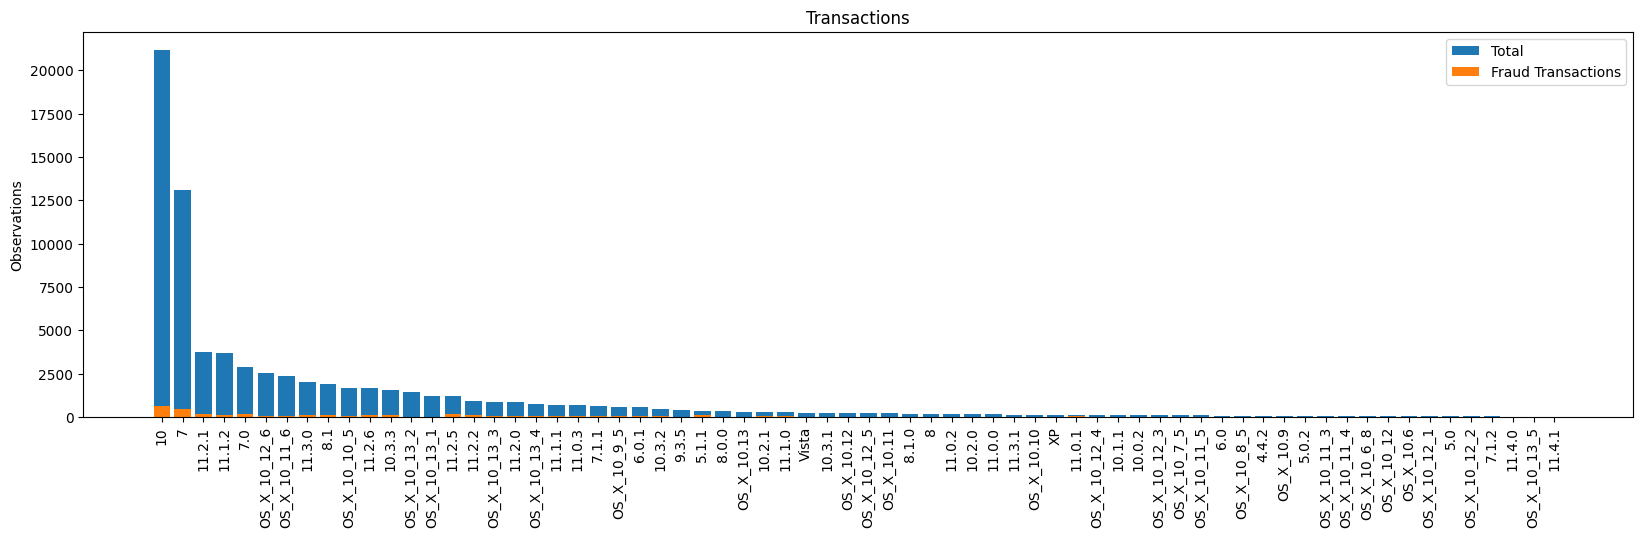



      os_version  isFraud  total  % Occurence  Avg Fraud
0             10      657  21155     0.035823   0.031056
30             7      432  13110     0.022200   0.032952
16        11.2.1      183   3722     0.006303   0.049167
14        11.1.2      130   3699     0.006264   0.035145
31           7.0      166   2871     0.004862   0.057820
..           ...      ...    ...          ...        ...
52  OS_X_10_12_2        0     33     0.000056   0.000000
33         7.1.2        4     33     0.000056   0.121212
22        11.4.0        1      5     0.000008   0.200000
61  OS_X_10_13_5        0      4     0.000007   0.000000
23        11.4.1        0      1     0.000002   0.000000

[68 rows x 5 columns]


In [ ]:
# plotting for feature 'os_version'
plot_features(df_train, 'os_version', 'isFraud')

**Observation:** On several operating systems, a high fraud rate has been observed.

### Screen Width and Height Features

In [ ]:
df_train['res_width'] = [np.nan if pd.isna(v) else v.split('x')[0] for v in df_train['id_33'].values]
df_test['res_width'] = [np.nan if pd.isna(v) else v.split('x')[0] for v in df_test['id_33'].values]

df_train['res_height'] = [np.nan if (pd.isna(v)) or len(v.split('x'))<=1 else v.split('x')[1] for v in df_train['id_33'].values]
df_test['res_height'] = [np.nan if (pd.isna(v)) or len(v.split('x'))<=1 else v.split('x')[1] for v in df_test['id_33'].values]

### Browser and browser version

In [ ]:
df_train['browser_name'] = [np.nan if (pd.isna(v)) else ''.join(re.split(r'([0-9]+)', v)[0]) for v in df_train['id_31'].values]
df_train['browser_name'] = df_train['browser_name'].astype('str')
df_train['browser_name'] = df_train['browser_name'].apply(lambda x: x[:len(x)-1] if x[-1] == '_' else x)
df_train['browser_name']= df_train['browser_name'].str.replace("Samsung_SM_G", "samsung", case = False)
df_train['browser_name']= df_train['browser_name'].str.replace("Samsung_browser", "samsung", case = False)
df_train['browser_name']= df_train['browser_name'].str.replace("Samsung_SCH", "samsung", case = False)
df_train['browser_name']= df_train['browser_name'].str.replace("M", "M4Tel", case = True)
df_train['browser_name']= df_train['browser_name'].str.replace("Inco_M4Telinion", "Inco_minion", case = False)
df_train['browser_name']= df_train['browser_name'].str.replace("M4Telozilla_Firefox", "Mozilla_Firefox", case = False)
df_train['browser_name']= df_train['browser_name'].str.replace("M4Telicrosoft_Windows", "Microsoft_Windows", case = False)


df_test['browser_name'] = [np.nan if (pd.isna(v)) else ''.join(re.split(r'([0-9]+)', v)[0]) for v in df_test['id_31'].values]
df_test['browser_name'] = df_test['browser_name'].astype('str')
df_test['browser_name'] = df_test['browser_name'].apply(lambda x: x[:len(x)-1] if x[-1] == '_' else x)
df_test['browser_name']= df_test['browser_name'].str.replace("Samsung_SM_G", "samsung", case = False)
df_test['browser_name']= df_test['browser_name'].str.replace("Samsung_browser", "samsung", case = False)
df_test['browser_name']= df_test['browser_name'].str.replace("Samsung_SCH", "samsung", case = False)
df_test['browser_name']= df_test['browser_name'].str.replace("M", "M4Tel", case = True)
df_test['browser_name']= df_test['browser_name'].str.replace("Inco_M4Telinion", "Inco_minion", case = False)
df_test['browser_name']= df_test['browser_name'].str.replace("M4Telozilla_Firefox", "Mozilla_Firefox", case = False)
df_test['browser_name']= df_test['browser_name'].str.replace("M4Telicrosoft_Windows", "Microsoft_Windows", case = False)

In [ ]:
df_train['browser_version'] = [np.nan if (pd.isna(v)) or len(v.split('_'))==1 or len(''.join(re.split(r'([0-9]+)',v)[1:]))==0 
                               else ''.join(re.split(r'([0-9]+)',v)[1:]) for v in df_train['id_31'].values]
df_train['browser_version'] = df_train['browser_version'].astype('str')
df_train['browser_version']= df_train['browser_version'].str.replace("531H", "G531H", case = False)
df_train['browser_version']= df_train['browser_version'].str.replace("532M", "G532M", case = False)
df_train['browser_version']= df_train['browser_version'].str.replace("4Tel_M4", "M4", case = False)


df_test['browser_version'] = [np.nan if (pd.isna(v)) or len(v.split('_'))==1 or len(''.join(re.split(r'([0-9]+)',v)[1:]))==0 
                               else ''.join(re.split(r'([0-9]+)',v)[1:]) for v in df_test['id_31'].values]
df_test['browser_version'] = df_test['browser_version'].astype('str')
df_test['browser_version']= df_test['browser_version'].str.replace("531H", "G531H", case = False)
df_test['browser_version']= df_test['browser_version'].str.replace("532M", "5S32M", case = False)
df_test['browser_version']= df_test['browser_version'].str.replace("4Tel_M4", "M4", case = False)



*Five Number Summary*
+-----------------------------------+-------------------------------------------+-------------------------------------------+
|        Feature Discription        | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+-----------------------------------+-------------------------------------------+-------------------------------------------+
|          count     590538         |              count     569875             |              count     20663              |
|          unique        50         |              unique        48             |              unique       28              |
|          top          nan         |              top          nan             |              top         nan              |
|          freq      450256         |              freq      440764             |              freq       9492              |
| Name: browser_name, dtype: object |     Name: browser_name, dtype: object     |     Name: br

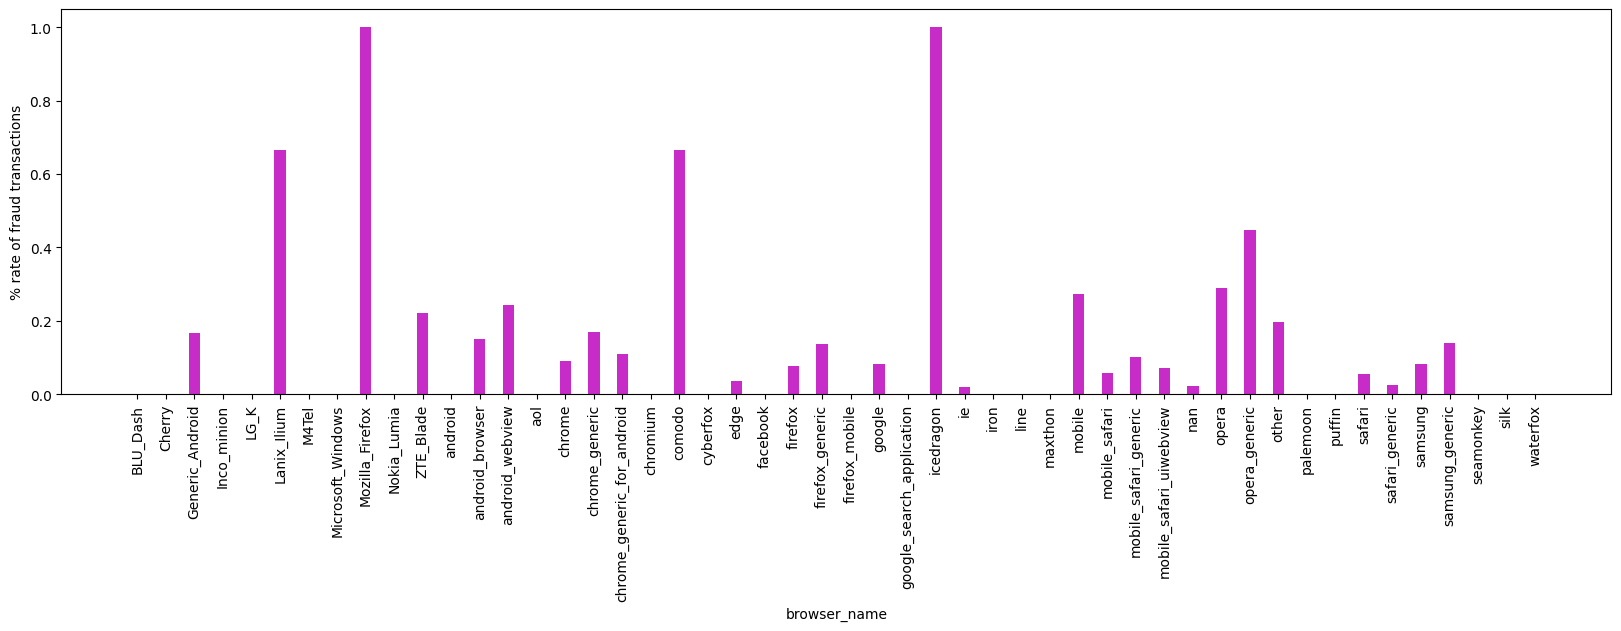

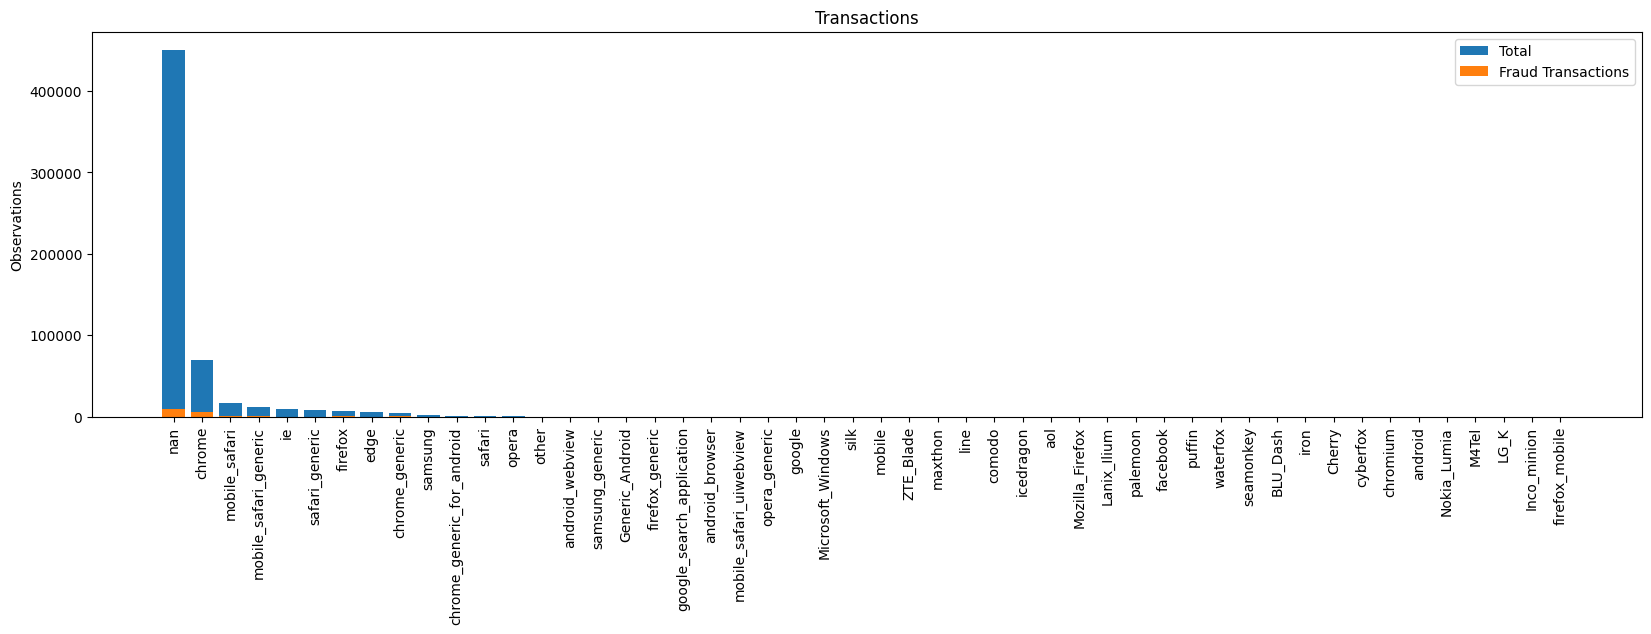



                  browser_name  isFraud   total  % Occurence  Avg Fraud
37                         nan     9492  450256     0.762451   0.021081
15                      chrome     6368   70123     0.118744   0.090812
34               mobile_safari      987   16797     0.028444   0.058760
35       mobile_safari_generic     1146   11474     0.019430   0.099878
29                          ie      186    9733     0.016482   0.019110
44              safari_generic      205    8195     0.013877   0.025015
23                     firefox      533    6901     0.011686   0.077235
21                        edge      225    6401     0.010839   0.035151
16              chrome_generic      803    4778     0.008091   0.168062
45                     samsung      167    2037     0.003449   0.081983
17  chrome_generic_for_android      127    1158     0.001961   0.109672
43                      safari       39     718     0.001216   0.054318
38                       opera      107     371     0.000628  

In [ ]:
# plotting for feature 'os_version'
plot_features(df_train, 'browser_name', 'isFraud')



*Five Number Summary*
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|         Feature Discription          | Feature Discription of legit transactions | Feature Discription of fraud transactions |
+--------------------------------------+-------------------------------------------+-------------------------------------------+
|           count     590538           |              count     569875             |              count     20663              |
|           unique        70           |              unique        70             |              unique       63              |
|           top          nan           |              top          nan             |              top         nan              |
|           freq      478207           |              freq      466010             |              freq      12197              |
| Name: browser_version, dtype: object |    Name: browser_version, dtype:

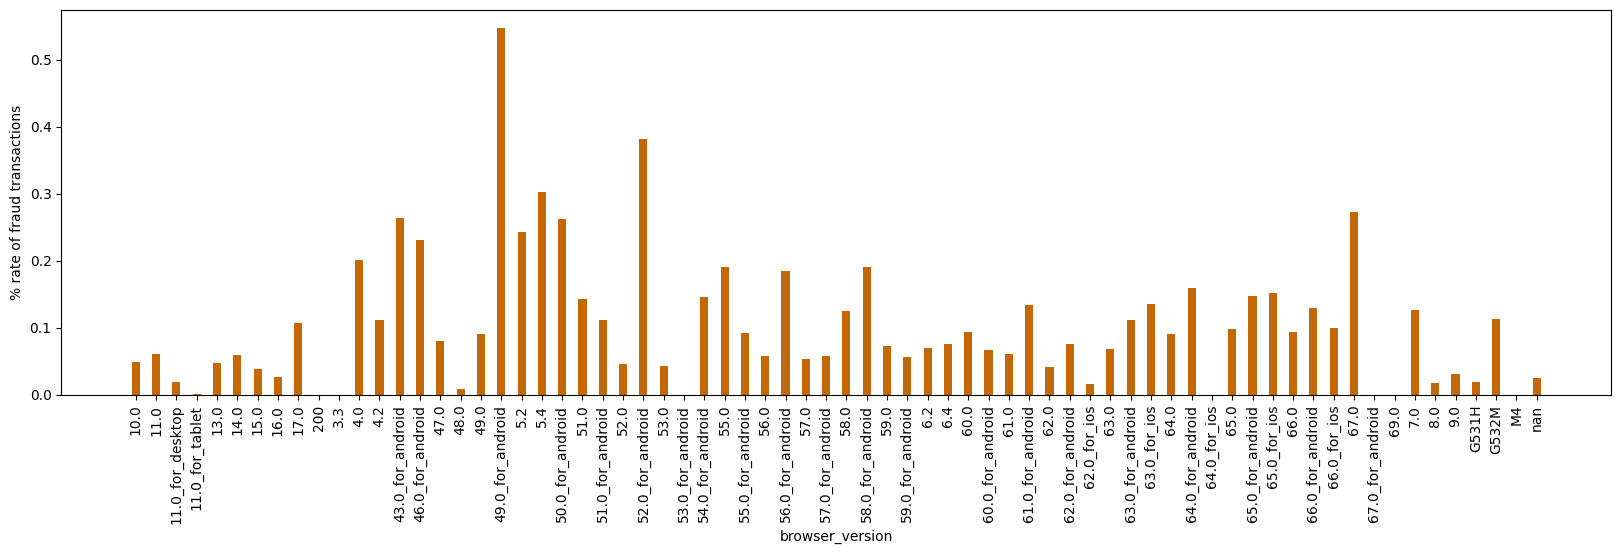

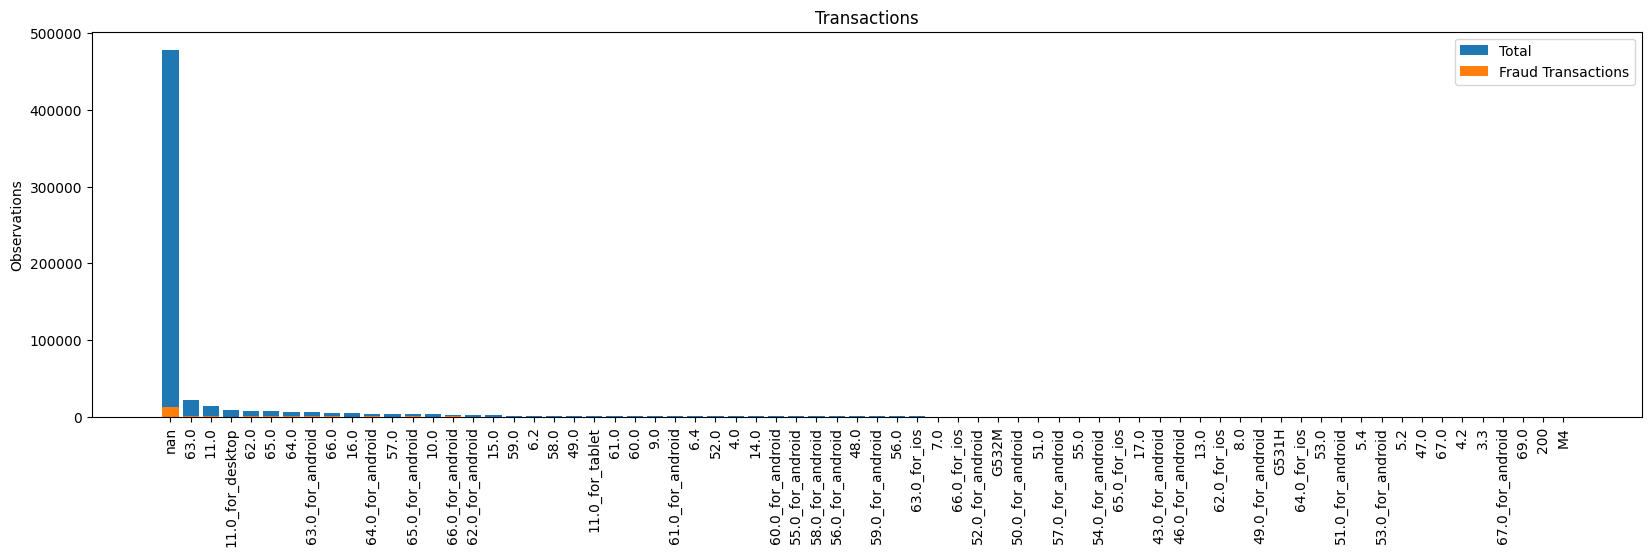



     browser_version  isFraud   total  % Occurence  Avg Fraud
69               nan    12197  478207     0.809782   0.025506
48              63.0     1503   22000     0.037254   0.068318
1               11.0      864   13973     0.023661   0.061834
2   11.0_for_desktop      175    9030     0.015291   0.019380
45              62.0      299    7182     0.012162   0.041632
..               ...      ...     ...          ...        ...
10               3.3        0       8     0.000014   0.000000
61  67.0_for_android        0       1     0.000002   0.000000
62              69.0        0       1     0.000002   0.000000
9                200        0       1     0.000002   0.000000
68                M4        0       1     0.000002   0.000000

[70 rows x 5 columns]


In [ ]:
# plotting for feature 'os_version'
plot_features(df_train, 'browser_version', 'isFraud')

**Observation:** It is evident that some browsers' fraudulent rates are significantly higher than those of other browsers.

In [ ]:
new_cat = ['parent_device', 'device_version', 'P_parent_domain', 'P_domain_name', 'P_top_level_domain',
           'R_parent_domain', 'R_domain_name', 'R_top_level_domain','os_name', 'os_version', 'res_width', 'res_height',
           'browser_name', 'browser_version']

cat_fea += new_cat

In [ ]:
cols = [col for col in df_train.columns if col not in new_cat and col not in ['isFraud', 'TransactionID']]

# feature selection on newly created categorical features
selected_features = forward_feature_selection(df_train, df_test, new_features=new_cat, old_features=cols)

Forward feature selection on 14 features <-->  current best score 0.9209778472023039 with 226 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['parent_device']
fitting model on 227 features
[0]	validation_0-auc:0.83809
[50]	validation_0-auc:0.90791
[100]	validation_0-auc:0.90802
[150]	validation_0-auc:0.91069
[200]	validation_0-auc:0.91294
[250]	validation_0-auc:0.91260
[300]	validation_0-auc:0.91311
[350]	validation_0-auc:0.91318
[400]	validation_0-auc:0.91347
[450]	validation_0-auc:0.91375
[500]	validation_0-auc:0.91368
[545]	validation_0-auc:0.91356
Score not improved on adding parent_device
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['device_version']
fitting model on 227 features
[0]	validation_0-auc:0.83796
[50]	validation_0-auc:0.91162
[100]	validation

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(new_cat) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# available categorical features
cat_fea = list(set(cat_fea) - set(to_discard))

In [ ]:
# available categorical features
print(cat_fea)

['id_36', 'id_18', 'card4', 'addr2', 'ProductCD', 'id_38', 'id_24', 'M9', 'M4', 'DeviceInfo', 'id_15', 'card3', 'M8', 'id_14', 'id_21', 'M2', 'id_32', 'id_31', 'id_23', 'id_26', 'TransactionHours', 'id_37', 'card5', 'id_35', 'P_emaildomain', 'id_30', 'id_17', 'id_27', 'id_34', 'M3', 'id_22', 'DeviceType', 'id_16', 'addr1', 'card2', 'card1', 'card6', 'id_20', 'id_13', 'M1', 'id_25', 'id_19', 'M6', 'M7', 'id_33', 'M5', 'id_29', 'id_28', 'id_12', 'R_emaildomain']


In [ ]:
# available numerical features
print(num_fea)

['V104', 'V129', 'D15', 'TransactionDT', 'V40', 'V180', 'V37', 'C7', 'V169', 'V171', 'V185', 'V235', 'V228', 'V226', 'V198', 'V14', 'V261', 'V20', 'C4', 'V139', 'V6', 'V82', 'V1', 'C1', 'V250', 'V115', 'C2', 'V178', 'V224', 'V271', 'V281', 'D9', 'V86', 'V111', 'V257', 'V274', 'V314', 'C11', 'id_11', 'V41', 'D13', 'V205', 'V210', 'V176', 'V162', 'V54', 'V175', 'V296', 'V220', 'id_03', 'D8', 'V209', 'V127', 'V80', 'C9', 'V17', 'V62', 'V99', 'D1', 'D14', 'D5', 'D6norm', 'V286', 'V267', 'V215', 'id_02', 'V307', 'V78', 'V188', 'V264', 'D6', 'V117', 'V305', 'V59', 'C3', 'id_10', 'D3', 'V3', 'V91', 'V142', 'id_05', 'V277', 'V289', 'id_04', 'V67', 'V76', 'V309', 'V107', 'V8', 'TransactionAmt', 'V65', 'id_08', 'V284', 'V56', 'V332', 'V165', 'V252', 'V207', 'D7', 'D11', 'V223', 'V55', 'C8', 'id_07', 'V173', 'V221', 'C12', 'V203', 'V121', 'V294', 'C6', 'V108', 'id_09', 'V301', 'id_06', 'V138', 'V291', 'D15norm', 'V335', 'V26', 'V338', 'D10', 'C5', 'V260', 'V36', 'V120', 'D2', 'V166', 'V23', 'V96'

In [ ]:
# label encoding the dataset
df_train, df_test= label_encoding(df_train, df_test, cat_fea)

In [ ]:
# available categorical features
cat_fea = ['id_36', 'id_18', 'card4', 'addr2', 'ProductCD', 'id_38', 'id_24', 'M9', 'M4', 'DeviceInfo', 'id_15', 'card3', 'M8', 'id_14', 'id_21', 'M2', 'id_32', 'id_31', 'id_23', 'id_26', 'TransactionHours', 'id_37', 'card5', 'id_35', 'P_emaildomain', 'id_30', 'id_17', 'id_27', 'id_34', 'M3', 'id_22', 'DeviceType', 'id_16', 'addr1', 'card2', 'card1', 'card6', 'id_20', 'id_13', 'M1', 'id_25', 'id_19', 'M6', 'M7', 'id_33', 'M5', 'id_29', 'id_28', 'id_12', 'R_emaildomain']

In [ ]:
# available numerical features
num_fea = ['V104', 'V129', 'D15', 'TransactionDT', 'V40', 'V180', 'V37', 'C7', 'V169', 'V171', 'V185', 'V235', 'V228', 'V226', 'V198', 'V14', 'V261', 'V20', 'C4', 'V139', 'V6', 'V82', 'V1', 'C1', 'V250', 'V115', 'C2', 'V178', 'V224', 'V271', 'V281', 'D9', 'V86', 'V111', 'V257', 'V274', 'V314', 'C11', 'id_11', 'V41', 'D13', 'V205', 'V210', 'V176', 'V162', 'V54', 'V175', 'V296', 'V220', 'id_03', 'D8', 'V209', 'V127', 'V80', 'C9', 'V17', 'V62', 'V99', 'D1', 'D14', 'D5', 'D6norm', 'V286', 'V267', 'V215', 'id_02', 'V307', 'V78', 'V188', 'V264', 'D6', 'V117', 'V305', 'V59', 'C3', 'id_10', 'D3', 'V3', 'V91', 'V142', 'id_05', 'V277', 'V289', 'id_04', 'V67', 'V76', 'V309', 'V107', 'V8', 'TransactionAmt', 'V65', 'id_08', 'V284', 'V56', 'V332', 'V165', 'V252', 'V207', 'D7', 'D11', 'V223', 'V55', 'C8', 'id_07', 'V173', 'V221', 'C12', 'V203', 'V121', 'V294', 'C6', 'V108', 'id_09', 'V301', 'id_06', 'V138', 'V291', 'D15norm', 'V335', 'V26', 'V338', 'D10', 'C5', 'V260', 'V36', 'V120', 'D2', 'V166', 'V23', 'V96', 'D4', 'V297', 'D4norm', 'dist1', 'D12', 'V130', 'V234', 'V68', 'V136', 'V240', 'V123', 'V182', 'V253', 'V187', 'V303', 'V47', 'V285', 'V283', 'V218', 'V258', 'C13', 'V48', 'V11', 'V124', 'V325', 'V88', 'V27', 'V30', 'V320', 'V98', 'V156', 'C14', 'id_01', 'V310', 'V70', 'V89', 'V147', 'V229', 'V266', 'V238', 'V4', 'V13', 'dist2', 'C10', 'V44', 'V160']

In [ ]:
# Best auc score
best_score = 0.9209778472023039

In [3]:
def model(X_train,y_train,cols):

  idx_tr = X_train.index[:int(X_train.shape[0]*0.75)]  
  idx_cv = X_train.index[int(X_train.shape[0]*0.75):]

  
  print(f'fitting model on {len(cols)} features')

  clf = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        n_estimators=1000,
        tree_method='gpu_hist',
        subsample=0.8,
        max_depth=20,
        colsample_bytree=0.4,
        learning_rate=0.2,
        missing=-1
        )
  
  model = clf.fit(X_train.loc[idx_tr,cols], y_train[idx_tr], eval_set=[(X_train.loc[idx_cv,cols], y_train[idx_cv])], 
          verbose=50, early_stopping_rounds=100)
  del clf
  return model.best_score


def forward_feature_selection(train, test, new_features, old_features):

  X_train = train.drop(['isFraud', 'TransactionID'], axis=1)
  y_train = train['isFraud']
  X_test = test.copy()
  X_test = test.drop(['TransactionID'], axis=1)
  
  # X_train, X_test = label_encoding(X_train, X_test, cat_fea)

  global best_score
  print(f'Forward feature selection on {len(new_features)} features <-->  current best score {best_score} with {len(old_features)} features')
  iteration = 1
  iteration_best_fea = None
  # list of additional columns
  best_features = []
  while iteration <= len(new_features):
      for j, fea in enumerate(new_features):
          print(f'Model no: {iteration}_{(j+1)}')
          print('--'*40)
          if fea not in best_features:
              current_features = old_features.copy()
              # adding new feature
              best_features.append(fea) 
              print(f'Adding new features: {best_features}')
              current_features.extend([f for f in best_features])        
              current_score = model(X_train, y_train, current_features)

              if current_score > best_score:
                  print(f'Score improved on adding {fea} new best score {current_score}')
                  iteration_best_fea = fea
                  best_score = current_score
              else:
                  print(f'Score not improved on adding {fea}')
          
              best_features.remove(fea)

          else:
              print(f'Skipping {fea} already an selected column')
      
          print('--'*40)

      # end of 1 iteration we add best column
      iteration += 1
      if iteration_best_fea is not None:
          best_features.append(iteration_best_fea)
          print(f'Best features in this iteration {iteration_best_fea}, --->   current best features: {best_features}')
          iteration_best_fea = None
                
      else:
          print('None of the features improving the score in this iteration')
          print('==='*40)
          break
      
      print('==='*40)

  print(f'Useful new features : {best_features}')
  print(f'Best score : {best_score}')
  return best_features

### Interaction Features

In [ ]:
# function to merge two features
def merge_features(fea1, fea2, train, test):
    name = fea1 + '_' + fea2
    train[name] = train[fea1].astype(str)+'_'+ train[fea2].astype(str)
    test[name] = test[fea1].astype(str)+'_'+ test[fea2].astype(str)
    label_enc = LabelEncoder()
    label_enc.fit(train[name])
    mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
    train[name] = label_enc.transform(train[name])
    test[name] = [-1 if mapping.get(val, -1)==-1 else mapping[val] for val in test[name].values]

    print(f'created new feature: {name}')

In [ ]:
# merging few of the features to create new features
merge_features('card1', 'addr1', df_train, df_test)
merge_features('card2', 'addr1', df_train, df_test)
merge_features('card3', 'addr1', df_train, df_test)
merge_features('card4', 'addr1', df_train, df_test)
merge_features('card5', 'addr1', df_train, df_test)
merge_features('card6', 'addr1', df_train, df_test)

merge_features('addr1', 'addr2', df_train, df_test)
merge_features('P_emaildomain', 'R_emaildomain', df_train, df_test)

merge_features('card1_addr1', 'P_emaildomain', df_train, df_test)
merge_features('card2_addr1', 'P_emaildomain', df_train, df_test)
merge_features('card3_addr1', 'P_emaildomain', df_train, df_test)
merge_features('card4_addr1', 'P_emaildomain', df_train, df_test)
merge_features('card5_addr1', 'P_emaildomain', df_train, df_test)
merge_features('card6_addr1', 'P_emaildomain', df_train, df_test)

merge_features('card1_addr1', 'R_emaildomain', df_train, df_test)
merge_features('card2_addr1', 'R_emaildomain', df_train, df_test)
merge_features('card3_addr1', 'R_emaildomain', df_train, df_test)
merge_features('card4_addr1', 'R_emaildomain', df_train, df_test)
merge_features('card5_addr1', 'R_emaildomain', df_train, df_test)
merge_features('card6_addr1', 'R_emaildomain', df_train, df_test)

created new feature: card1_addr1
created new feature: card2_addr1
created new feature: card3_addr1
created new feature: card4_addr1
created new feature: card5_addr1
created new feature: card6_addr1
created new feature: addr1_addr2
created new feature: P_emaildomain_R_emaildomain
created new feature: card1_addr1_P_emaildomain
created new feature: card2_addr1_P_emaildomain
created new feature: card3_addr1_P_emaildomain
created new feature: card4_addr1_P_emaildomain
created new feature: card5_addr1_P_emaildomain
created new feature: card6_addr1_P_emaildomain
created new feature: card1_addr1_R_emaildomain
created new feature: card2_addr1_R_emaildomain
created new feature: card3_addr1_R_emaildomain
created new feature: card4_addr1_R_emaildomain
created new feature: card5_addr1_R_emaildomain
created new feature: card6_addr1_R_emaildomain


In [ ]:
# newly created interaction feature

intra_fea = ['card1_addr1','card2_addr1','card3_addr1','card4_addr1','card5_addr1','card6_addr1','addr1_addr2','card1_addr1_P_emaildomain',
             'P_emaildomain_R_emaildomain','card2_addr1_P_emaildomain','card3_addr1_P_emaildomain','card4_addr1_P_emaildomain','card5_addr1_P_emaildomain',
             'card6_addr1_P_emaildomain','card1_addr1_R_emaildomain','card2_addr1_R_emaildomain','card3_addr1_R_emaildomain','card4_addr1_R_emaildomain',
             'card5_addr1_R_emaildomain','card6_addr1_R_emaildomain']


### Identifying the Card Holders
<br>

Based on the information given by the competition host, once a credit card is marked as fraud, it is not used again and hence we can say it in other words that once a Card Holder is marked as Fraud, it is no longer allowed to make any transactions using the same card. Hence, our actual objective is not to predict the Fraudulent Transactions instead our task is to predict the Fraudulent Clients.

Now, in order to do so we need to somehow identify the Card Holder based on the information given to us. From the data we can find various ways to identfy the client but none of the method is completely perfect since most of the columns are not revealed and hene we need to make a guess. Now, based on the analysis we have the following possibilities to identify a client,


1. __card1_card2_card3_card4_card5_card6_addr1_P_emaildomain__ - Since, the card1-card6 feature corresponds to the information of cards, addr1 corresponds to the billing region and P_emaildomain is the purchaser domain.


2. __card1_addr1_D1norm__ - Since, card1 has no missing values and has majority of unique values so this feature combined with addr1 which corrresponds to the region code and D1norm (timedelta) would suffice.


2. __contatinating_few_of_the_categorical_id featues__ 

There can be other possibilities too but we will going with these only for now.
<br><br>


In [ ]:
# creating UID feature
df_train['uid'] = df_train.card1.astype(str) +'_'+ df_train.addr1.astype(str) + '_'+ np.floor((df_train.TransactionDT/(24*60*60))-df_train.D1).astype(str)
df_test['uid'] = df_test.card1.astype(str) +'_'+ df_test.addr1.astype(str) + '_'+ np.floor((df_test.TransactionDT/(24*60*60))-df_test.D1).astype(str)

In [ ]:
# functions for frequency encoding features and aggregation features
def frequency_encode(train_df, test_df, features):
    """
    it combines train and test dataframes and then encodes
    """
    enc_fea = []

    for fea in features:
        df = pd.concat([train_df[fea],test_df[fea]])
        value_count = df.value_counts(dropna=True, normalize=True).to_dict()
        value_count[-1] = -1
        name = fea +'_FE'
        train_df[name] = train_df[fea].map(value_count)
        train_df[name] = train_df[name].astype('float32')
        test_df[name] = test_df[fea].map(value_count)
        test_df[name] = test_df[name].astype('float32')
        print(f'new fequency encoded feature: {name}')
        enc_fea.append(name)

    return enc_fea
        
        
# https://www.kaggle.com/kyakovlev/ieee-fe-with-some-eda
def feature_aggregation1(features, uids, aggs, train, test, use_nan_value=True, fill_nan=True):
    
    agg_fea = []
    for fea in features:
        for uid in uids:
            for agg_type in aggs:
                cols = [fea, uid]
                name = fea + '_' + uid + '_' + agg_type
                df = pd.concat([train[cols],test[cols]])
                df = pd.concat([train[cols],test[cols]])
                if use_nan_value: 
                    df.loc[df[fea]==-1, fea] = np.nan
            
                temp_df = df.groupby([uid])[fea].agg([agg_type])[agg_type].reset_index().rename(
                                                        columns={agg_type: name})
                temp_df.index = list(temp_df[uid])
                temp_dict = temp_df[name].to_dict()
                train[name] = train[uid].map(temp_dict).astype('float32')
                test[name]  = test[uid].map(temp_dict).astype('float32')
            
                if fill_nan:
                    train[name].fillna(-1,inplace=True)
                    test[name].fillna(-1,inplace=True)
                
                agg_fea.append(name)
                print(f"created feature by aggregation1: {name}")
 
    return agg_fea
                
                                
                
def feature_aggregation2(features, uids ,train, test):
    
    agg_fea = []
    for fea in features:
        for uid in uids:
            cols = [fea,uid]
            name = fea + '_' + uid + '_ct'
            df = pd.concat([train[cols],test[cols]])
            temp = df.groupby(uid)[fea].agg(['nunique'])['nunique'].to_dict()
            train[name] = train[uid].map(temp).astype('float32')
            test[name] = test[uid].map(temp).astype('float32')
            agg_fea.append(name)
            print(f"created feature by aggregation2: {name}")
    return agg_fea

In [ ]:
# Frequency Encoding
frq_enc_fea = frequency_encode(df_train,df_test,['ProductCD','addr1','addr2','card1','card2','card3','card4', 'card5', 'card6','P_emaildomain','R_emaildomain'])

new fequency encoded feature: ProductCD_FE
new fequency encoded feature: addr1_FE
new fequency encoded feature: addr2_FE
new fequency encoded feature: card1_FE
new fequency encoded feature: card2_FE
new fequency encoded feature: card3_FE
new fequency encoded feature: card4_FE
new fequency encoded feature: card5_FE
new fequency encoded feature: card6_FE
new fequency encoded feature: P_emaildomain_FE
new fequency encoded feature: R_emaildomain_FE


In [ ]:
# Frequency Encoding of newly created features
frq_enc_fea += frequency_encode(df_train,df_test,intra_fea)

new fequency encoded feature: card1_addr1_FE
new fequency encoded feature: card2_addr1_FE
new fequency encoded feature: card3_addr1_FE
new fequency encoded feature: card4_addr1_FE
new fequency encoded feature: card5_addr1_FE
new fequency encoded feature: card6_addr1_FE
new fequency encoded feature: addr1_addr2_FE
new fequency encoded feature: card1_addr1_P_emaildomain_FE
new fequency encoded feature: P_emaildomain_R_emaildomain_FE
new fequency encoded feature: card2_addr1_P_emaildomain_FE
new fequency encoded feature: card3_addr1_P_emaildomain_FE
new fequency encoded feature: card4_addr1_P_emaildomain_FE
new fequency encoded feature: card5_addr1_P_emaildomain_FE
new fequency encoded feature: card6_addr1_P_emaildomain_FE
new fequency encoded feature: card1_addr1_R_emaildomain_FE
new fequency encoded feature: card2_addr1_R_emaildomain_FE
new fequency encoded feature: card3_addr1_R_emaildomain_FE
new fequency encoded feature: card4_addr1_R_emaildomain_FE
new fequency encoded feature: card

In [ ]:
# Frequency Encoding of UID feature
frq_enc_fea += frequency_encode(df_train,df_test,['uid'])

new fequency encoded feature: uid_FE


In [ ]:
print(frq_enc_fea)

['ProductCD_FE', 'addr1_FE', 'addr2_FE', 'card1_FE', 'card2_FE', 'card3_FE', 'card4_FE', 'card5_FE', 'card6_FE', 'P_emaildomain_FE', 'R_emaildomain_FE', 'card1_addr1_FE', 'card2_addr1_FE', 'card3_addr1_FE', 'card4_addr1_FE', 'card5_addr1_FE', 'card6_addr1_FE', 'addr1_addr2_FE', 'card1_addr1_P_emaildomain_FE', 'P_emaildomain_R_emaildomain_FE', 'card2_addr1_P_emaildomain_FE', 'card3_addr1_P_emaildomain_FE', 'card4_addr1_P_emaildomain_FE', 'card5_addr1_P_emaildomain_FE', 'card6_addr1_P_emaildomain_FE', 'card1_addr1_R_emaildomain_FE', 'card2_addr1_R_emaildomain_FE', 'card3_addr1_R_emaildomain_FE', 'card4_addr1_R_emaildomain_FE', 'card5_addr1_R_emaildomain_FE', 'card6_addr1_R_emaildomain_FE', 'uid_FE']


Aggregation Features

In [ ]:
# creating new features by aggregation
# converting numerical aggregation features
tmp1 = ['D'+str(i) for i in range(1,16)]
tmp1.append('TransactionAmt')
agg1_d_fea = feature_aggregation1(tmp1,['uid'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)

tmp2 = ['C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8','C9','C10','C11', 'C12','C13','C14']
agg1_c_fea = feature_aggregation1(tmp2,['uid'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)

agg1_m_fea = feature_aggregation1(['M'+str(x) for x in range(1,10)],['uid'],['mean','std'],df_train, df_test,use_nan_value=True,fill_nan=True)

agg1_fea = agg1_d_fea + agg1_c_fea + agg1_m_fea

created feature by aggregation1: D1_uid_mean
created feature by aggregation1: D1_uid_std
created feature by aggregation1: D2_uid_mean
created feature by aggregation1: D2_uid_std
created feature by aggregation1: D3_uid_mean
created feature by aggregation1: D3_uid_std
created feature by aggregation1: D4_uid_mean
created feature by aggregation1: D4_uid_std
created feature by aggregation1: D5_uid_mean
created feature by aggregation1: D5_uid_std
created feature by aggregation1: D6_uid_mean
created feature by aggregation1: D6_uid_std
created feature by aggregation1: D7_uid_mean
created feature by aggregation1: D7_uid_std
created feature by aggregation1: D8_uid_mean
created feature by aggregation1: D8_uid_std
created feature by aggregation1: D9_uid_mean
created feature by aggregation1: D9_uid_std
created feature by aggregation1: D10_uid_mean
created feature by aggregation1: D10_uid_std
created feature by aggregation1: D11_uid_mean
created feature by aggregation1: D11_uid_std
created feature b

In [ ]:
# converting categorical aggregation features
tmp3 = ['card4','card6','P_emaildomain','R_emaildomain','dist1','dist2','addr1','addr2']
agg2_cat_fea = feature_aggregation2(tmp3, ['uid'], df_train, df_test)

agg2_m_fea = feature_aggregation2(['M'+str(x) for x in range(1,10)], ['uid'], df_train, df_test)

agg2_c_fea = feature_aggregation2(tmp2, ['uid'], df_train, df_test)

agg2_fea = agg2_cat_fea + agg2_m_fea + agg2_c_fea

created feature by aggregation2: card4_uid_ct
created feature by aggregation2: card6_uid_ct
created feature by aggregation2: P_emaildomain_uid_ct
created feature by aggregation2: R_emaildomain_uid_ct
created feature by aggregation2: dist1_uid_ct
created feature by aggregation2: dist2_uid_ct
created feature by aggregation2: addr1_uid_ct
created feature by aggregation2: addr2_uid_ct
created feature by aggregation2: M1_uid_ct
created feature by aggregation2: M2_uid_ct
created feature by aggregation2: M3_uid_ct
created feature by aggregation2: M4_uid_ct
created feature by aggregation2: M5_uid_ct
created feature by aggregation2: M6_uid_ct
created feature by aggregation2: M7_uid_ct
created feature by aggregation2: M8_uid_ct
created feature by aggregation2: M9_uid_ct
created feature by aggregation2: C1_uid_ct
created feature by aggregation2: C2_uid_ct
created feature by aggregation2: C3_uid_ct
created feature by aggregation2: C4_uid_ct
created feature by aggregation2: C5_uid_ct
created featur

In [ ]:
# total newly created features
new_feats = intra_fea + frq_enc_fea + agg1_fea + agg2_fea

In [ ]:
# available categorical featrures
print(cat_fea)

['id_36', 'id_18', 'card4', 'addr2', 'ProductCD', 'id_38', 'id_24', 'M9', 'M4', 'DeviceInfo', 'id_15', 'card3', 'M8', 'id_14', 'id_21', 'M2', 'id_32', 'id_31', 'id_23', 'id_26', 'TransactionHours', 'id_37', 'card5', 'id_35', 'P_emaildomain', 'id_30', 'id_17', 'id_27', 'id_34', 'M3', 'id_22', 'DeviceType', 'id_16', 'addr1', 'card2', 'card1', 'card6', 'id_20', 'id_13', 'M1', 'id_25', 'id_19', 'M6', 'M7', 'id_33', 'M5', 'id_29', 'id_28', 'id_12', 'R_emaildomain']


In [ ]:
# interaction featrures
print(intra_fea)

['card1_addr1', 'card2_addr1', 'card3_addr1', 'card4_addr1', 'card5_addr1', 'card6_addr1', 'addr1_addr2', 'card1_addr1_P_emaildomain', 'P_emaildomain_R_emaildomain', 'card2_addr1_P_emaildomain', 'card3_addr1_P_emaildomain', 'card4_addr1_P_emaildomain', 'card5_addr1_P_emaildomain', 'card6_addr1_P_emaildomain', 'card1_addr1_R_emaildomain', 'card2_addr1_R_emaildomain', 'card3_addr1_R_emaildomain', 'card4_addr1_R_emaildomain', 'card5_addr1_R_emaildomain', 'card6_addr1_R_emaildomain']


In [ ]:
# Frequency encoded featrures
print(frq_enc_fea)

['ProductCD_FE', 'addr1_FE', 'addr2_FE', 'card1_FE', 'card2_FE', 'card3_FE', 'card4_FE', 'card5_FE', 'card6_FE', 'P_emaildomain_FE', 'R_emaildomain_FE', 'card1_addr1_FE', 'card2_addr1_FE', 'card3_addr1_FE', 'card4_addr1_FE', 'card5_addr1_FE', 'card6_addr1_FE', 'addr1_addr2_FE', 'card1_addr1_P_emaildomain_FE', 'P_emaildomain_R_emaildomain_FE', 'card2_addr1_P_emaildomain_FE', 'card3_addr1_P_emaildomain_FE', 'card4_addr1_P_emaildomain_FE', 'card5_addr1_P_emaildomain_FE', 'card6_addr1_P_emaildomain_FE', 'card1_addr1_R_emaildomain_FE', 'card2_addr1_R_emaildomain_FE', 'card3_addr1_R_emaildomain_FE', 'card4_addr1_R_emaildomain_FE', 'card5_addr1_R_emaildomain_FE', 'card6_addr1_R_emaildomain_FE', 'uid_FE']


In [ ]:
# aggregation1 D featrures
print(agg1_d_fea)

['D1_uid_mean', 'D1_uid_std', 'D2_uid_mean', 'D2_uid_std', 'D3_uid_mean', 'D3_uid_std', 'D4_uid_mean', 'D4_uid_std', 'D5_uid_mean', 'D5_uid_std', 'D6_uid_mean', 'D6_uid_std', 'D7_uid_mean', 'D7_uid_std', 'D8_uid_mean', 'D8_uid_std', 'D9_uid_mean', 'D9_uid_std', 'D10_uid_mean', 'D10_uid_std', 'D11_uid_mean', 'D11_uid_std', 'D12_uid_mean', 'D12_uid_std', 'D13_uid_mean', 'D13_uid_std', 'D14_uid_mean', 'D14_uid_std', 'D15_uid_mean', 'D15_uid_std', 'TransactionAmt_uid_mean', 'TransactionAmt_uid_std']


In [ ]:
# aggregation1 C featrures
print(agg1_c_fea)

['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']


In [ ]:
# aggregation1 M featrures
print(agg1_m_fea)

['M1_uid_mean', 'M1_uid_std', 'M2_uid_mean', 'M2_uid_std', 'M3_uid_mean', 'M3_uid_std', 'M4_uid_mean', 'M4_uid_std', 'M5_uid_mean', 'M5_uid_std', 'M6_uid_mean', 'M6_uid_std', 'M7_uid_mean', 'M7_uid_std', 'M8_uid_mean', 'M8_uid_std', 'M9_uid_mean', 'M9_uid_std']


In [ ]:
# aggregation2 cat featrures
print(agg2_cat_fea)

['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 'addr1_uid_ct', 'addr2_uid_ct']


In [ ]:
# aggregation2 C featrures
print(agg2_c_fea)

['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']


In [ ]:
# aggregation2 M featrures
print(agg2_m_fea)

['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']


In [ ]:
# getting all the newly created featrures
print(new_feats)

['card1_addr1', 'card2_addr1', 'card3_addr1', 'card4_addr1', 'card5_addr1', 'card6_addr1', 'addr1_addr2', 'card1_addr1_P_emaildomain', 'P_emaildomain_R_emaildomain', 'card2_addr1_P_emaildomain', 'card3_addr1_P_emaildomain', 'card4_addr1_P_emaildomain', 'card5_addr1_P_emaildomain', 'card6_addr1_P_emaildomain', 'card1_addr1_R_emaildomain', 'card2_addr1_R_emaildomain', 'card3_addr1_R_emaildomain', 'card4_addr1_R_emaildomain', 'card5_addr1_R_emaildomain', 'card6_addr1_R_emaildomain', 'ProductCD_FE', 'addr1_FE', 'addr2_FE', 'card1_FE', 'card2_FE', 'card3_FE', 'card4_FE', 'card5_FE', 'card6_FE', 'P_emaildomain_FE', 'R_emaildomain_FE', 'card1_addr1_FE', 'card2_addr1_FE', 'card3_addr1_FE', 'card4_addr1_FE', 'card5_addr1_FE', 'card6_addr1_FE', 'addr1_addr2_FE', 'card1_addr1_P_emaildomain_FE', 'P_emaildomain_R_emaildomain_FE', 'card2_addr1_P_emaildomain_FE', 'card3_addr1_P_emaildomain_FE', 'card4_addr1_P_emaildomain_FE', 'card5_addr1_P_emaildomain_FE', 'card6_addr1_P_emaildomain_FE', 'card1_addr

In [ ]:
# best auc score
print(best_score)

0.9209778472023039


In [ ]:
# aggregation1 features
agg1_d_fea = ['D1_uid_mean', 'D1_uid_std', 'D2_uid_mean', 'D2_uid_std', 'D3_uid_mean', 'D3_uid_std', 'D4_uid_mean', 'D4_uid_std', 
              'D5_uid_mean', 'D5_uid_std', 'D6_uid_mean', 'D6_uid_std', 'D7_uid_mean', 'D7_uid_std', 'D8_uid_mean', 'D8_uid_std', 
              'D9_uid_mean', 'D9_uid_std', 'D10_uid_mean', 'D10_uid_std', 'D11_uid_mean', 'D11_uid_std', 'D12_uid_mean', 'D12_uid_std', 
              'D13_uid_mean', 'D13_uid_std', 'D14_uid_mean', 'D14_uid_std', 'D15_uid_mean', 'D15_uid_std', 'TransactionAmt_uid_mean', 
              'TransactionAmt_uid_std']


agg1_m_fea = ['M1_uid_mean', 'M1_uid_std', 'M2_uid_mean', 'M2_uid_std', 'M3_uid_mean', 'M3_uid_std', 'M4_uid_mean', 'M4_uid_std', 
              'M5_uid_mean', 'M5_uid_std', 'M6_uid_mean', 'M6_uid_std', 'M7_uid_mean', 'M7_uid_std', 'M8_uid_mean', 'M8_uid_std', 
              'M9_uid_mean', 'M9_uid_std']


agg1_c_fea = ['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 
              'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 
              'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 
              'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']

# aggregation2 features
agg2_cat_fea = ['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 
                'addr1_uid_ct', 'addr2_uid_ct']


agg2_c_fea = ['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 
              'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']


agg2_m_fea = ['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']
      

feature selection on newly created categorical interaction features

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud', 'TransactionID', 'uid']]

# feature selection on newly created categorical intra features
selected_features = forward_feature_selection(df_train, df_test, new_features=intra_fea, old_features=cols)

Forward feature selection on 20 features <-->  current best score 0.9209778472023039 with 226 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['card1_addr1']
fitting model on 227 features
[0]	validation_0-auc:0.83957
[50]	validation_0-auc:0.91345
[100]	validation_0-auc:0.91191
[150]	validation_0-auc:0.91320
[200]	validation_0-auc:0.91372
[250]	validation_0-auc:0.91503
[300]	validation_0-auc:0.91527
[350]	validation_0-auc:0.91540
[400]	validation_0-auc:0.91576
[450]	validation_0-auc:0.91628
[500]	validation_0-auc:0.91635
[550]	validation_0-auc:0.91651
[600]	validation_0-auc:0.91671
[650]	validation_0-auc:0.91653
[674]	validation_0-auc:0.91628
Score not improved on adding card1_addr1
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['card2_addr1']
fitting model on 22

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(intra_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# Frequency encoded featrures
print(frq_enc_fea)

['ProductCD_FE', 'addr1_FE', 'addr2_FE', 'card1_FE', 'card2_FE', 'card3_FE', 'card4_FE', 'card5_FE', 'card6_FE', 'P_emaildomain_FE', 'R_emaildomain_FE', 'card1_addr1_FE', 'card2_addr1_FE', 'card3_addr1_FE', 'card4_addr1_FE', 'card5_addr1_FE', 'card6_addr1_FE', 'addr1_addr2_FE', 'card1_addr1_P_emaildomain_FE', 'P_emaildomain_R_emaildomain_FE', 'card2_addr1_P_emaildomain_FE', 'card3_addr1_P_emaildomain_FE', 'card4_addr1_P_emaildomain_FE', 'card5_addr1_P_emaildomain_FE', 'card6_addr1_P_emaildomain_FE', 'card1_addr1_R_emaildomain_FE', 'card2_addr1_R_emaildomain_FE', 'card3_addr1_R_emaildomain_FE', 'card4_addr1_R_emaildomain_FE', 'card5_addr1_R_emaildomain_FE', 'card6_addr1_R_emaildomain_FE', 'uid_FE']


In [ ]:
# getting all the newly created featrures
print(new_feats)

['M3_uid_ct', 'card5_addr1_R_emaildomain_FE', 'C12_uid_ct', 'card2_addr1_FE', 'C14_uid_std', 'C2_uid_ct', 'C4_uid_mean', 'M7_uid_mean', 'C13_uid_std', 'C11_uid_std', 'D4_uid_mean', 'M5_uid_mean', 'M1_uid_ct', 'card1_addr1_R_emaildomain_FE', 'M6_uid_mean', 'D10_uid_mean', 'card6_FE', 'C5_uid_std', 'card6_addr1_FE', 'card4_addr1_P_emaildomain_FE', 'card6_addr1_R_emaildomain_FE', 'C10_uid_ct', 'D7_uid_std', 'dist2_uid_ct', 'D9_uid_std', 'addr2_uid_ct', 'card5_addr1_P_emaildomain_FE', 'M4_uid_ct', 'M8_uid_ct', 'M9_uid_ct', 'card3_addr1_P_emaildomain_FE', 'P_emaildomain_R_emaildomain_FE', 'R_emaildomain_uid_ct', 'ProductCD_FE', 'P_emaildomain_uid_ct', 'M4_uid_mean', 'D2_uid_mean', 'C9_uid_ct', 'C2_uid_mean', 'M5_uid_std', 'D14_uid_mean', 'C7_uid_std', 'C11_uid_mean', 'card4_FE', 'M7_uid_std', 'card4_addr1_FE', 'card4_addr1_R_emaildomain_FE', 'C4_uid_std', 'C6_uid_mean', 'card3_addr1_FE', 'D2_uid_std', 'D3_uid_std', 'D15_uid_std', 'C7_uid_ct', 'D12_uid_std', 'C6_uid_std', 'M1_uid_mean', 'C4_

In [ ]:
# best auc score
print(best_score)

0.9209778472023039


feature selection on newly created FE features

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud', 'TransactionID','uid']]

# feature selection on newly created FE features
selected_features = forward_feature_selection(df_train, df_test, new_features=frq_enc_fea, old_features=cols)

Forward feature selection on 32 features <-->  current best score 0.9209778472023039 with 226 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['ProductCD_FE']
fitting model on 227 features
[0]	validation_0-auc:0.83527
[50]	validation_0-auc:0.91172
[100]	validation_0-auc:0.91219
[150]	validation_0-auc:0.91485
[200]	validation_0-auc:0.91571
[250]	validation_0-auc:0.91583
[300]	validation_0-auc:0.91677
[350]	validation_0-auc:0.91614
[383]	validation_0-auc:0.91634
Score not improved on adding ProductCD_FE
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['addr1_FE']
fitting model on 227 features
[0]	validation_0-auc:0.83586
[50]	validation_0-auc:0.90956
[100]	validation_0-auc:0.90907
[150]	validation_0-auc:0.91124
[200]	validation_0-auc:0.91174
[250]	validation_0-auc:0

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(frq_enc_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9223742706469756


In [ ]:
# available new features
print(new_feats)

['C2_uid_std', 'C3_uid_std', 'M3_uid_ct', 'C7_uid_mean', 'C12_uid_ct', 'M2_uid_ct', 'M2_uid_mean', 'C3_uid_ct', 'C10_uid_mean', 'C14_uid_std', 'C2_uid_ct', 'C4_uid_mean', 'M7_uid_mean', 'addr1_uid_ct', 'C13_uid_std', 'C11_uid_std', 'M4_uid_std', 'C9_uid_std', 'D11_uid_mean', 'D4_uid_mean', 'card6_uid_ct', 'M5_uid_mean', 'C13_uid_mean', 'M1_uid_ct', 'D1_uid_mean', 'M6_uid_mean', 'D10_uid_mean', 'D12_uid_mean', 'C5_uid_std', 'C1_uid_std', 'C12_uid_std', 'M6_uid_std', 'M8_uid_std', 'D9_uid_mean', 'C14_uid_mean', 'C10_uid_ct', 'M5_uid_ct', 'M3_uid_std', 'D7_uid_std', 'dist2_uid_ct', 'dist1_uid_ct', 'D9_uid_std', 'addr2_uid_ct', 'C12_uid_mean', 'M4_uid_ct', 'M8_uid_ct', 'M9_uid_ct', 'R_emaildomain_uid_ct', 'M6_uid_ct', 'C11_uid_ct', 'P_emaildomain_uid_ct', 'C1_uid_ct', 'M4_uid_mean', 'D8_uid_std', 'D2_uid_mean', 'C9_uid_ct', 'M3_uid_mean', 'C3_uid_mean', 'TransactionAmt_uid_mean', 'C10_uid_std', 'C2_uid_mean', 'M5_uid_std', 'D1_uid_std', 'D5_uid_std', 'C9_uid_mean', 'C1_uid_mean', 'C5_uid_m

feature selection on newly created aggregation1 features

In [ ]:
# aggregation1 features
agg1_d_fea = ['D1_uid_mean', 'D1_uid_std', 'D2_uid_mean', 'D2_uid_std', 'D3_uid_mean', 'D3_uid_std', 'D4_uid_mean', 'D4_uid_std', 
              'D5_uid_mean', 'D5_uid_std', 'D6_uid_mean', 'D6_uid_std', 'D7_uid_mean', 'D7_uid_std', 'D8_uid_mean', 'D8_uid_std', 
              'D9_uid_mean', 'D9_uid_std', 'D10_uid_mean', 'D10_uid_std', 'D11_uid_mean', 'D11_uid_std', 'D12_uid_mean', 'D12_uid_std', 
              'D13_uid_mean', 'D13_uid_std', 'D14_uid_mean', 'D14_uid_std', 'D15_uid_mean', 'D15_uid_std', 'TransactionAmt_uid_mean', 
              'TransactionAmt_uid_std']


agg1_m_fea = ['M1_uid_mean', 'M1_uid_std', 'M2_uid_mean', 'M2_uid_std', 'M3_uid_mean', 'M3_uid_std', 'M4_uid_mean', 'M4_uid_std', 
              'M5_uid_mean', 'M5_uid_std', 'M6_uid_mean', 'M6_uid_std', 'M7_uid_mean', 'M7_uid_std', 'M8_uid_mean', 'M8_uid_std', 
              'M9_uid_mean', 'M9_uid_std']


agg1_c_fea = ['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 
              'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 
              'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 
              'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']

# aggregation2 features
agg2_cat_fea = ['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 
                'addr1_uid_ct', 'addr2_uid_ct']


agg2_c_fea = ['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 
              'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']


agg2_m_fea = ['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']

Aggregation1 'D' features

In [ ]:
new_feats = ['C2_uid_std', 'C3_uid_std', 'M3_uid_ct', 'C7_uid_mean', 'C12_uid_ct', 'M2_uid_ct', 'M2_uid_mean', 'C3_uid_ct', 'C10_uid_mean', 'C14_uid_std', 'C2_uid_ct', 'C4_uid_mean', 'M7_uid_mean', 'addr1_uid_ct', 'C13_uid_std', 'C11_uid_std', 'M4_uid_std', 'C9_uid_std', 'D11_uid_mean', 'D4_uid_mean', 'card6_uid_ct', 'M5_uid_mean', 'C13_uid_mean', 'M1_uid_ct', 'D1_uid_mean', 'M6_uid_mean', 'D10_uid_mean', 'D12_uid_mean', 'C5_uid_std', 'C1_uid_std', 'C12_uid_std', 'M6_uid_std', 'M8_uid_std', 'D9_uid_mean', 'C14_uid_mean', 'C10_uid_ct', 'M5_uid_ct', 'M3_uid_std', 'D7_uid_std', 'dist2_uid_ct', 'dist1_uid_ct', 'D9_uid_std', 'addr2_uid_ct', 'C12_uid_mean', 'M4_uid_ct', 'M8_uid_ct', 'M9_uid_ct', 'R_emaildomain_uid_ct', 'M6_uid_ct', 'C11_uid_ct', 'P_emaildomain_uid_ct', 'C1_uid_ct', 'M4_uid_mean', 'D8_uid_std', 'D2_uid_mean', 'C9_uid_ct', 'M3_uid_mean', 'C3_uid_mean', 'TransactionAmt_uid_mean', 'C10_uid_std', 'C2_uid_mean', 'M5_uid_std', 'D1_uid_std', 'D5_uid_std', 'C9_uid_mean', 'C1_uid_mean', 'C5_uid_mean', 'D3_uid_mean', 'D6_uid_std', 'M9_uid_mean', 'M1_uid_std', 'D13_uid_std', 'D15_uid_mean', 'D14_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C11_uid_mean', 'C8_uid_std', 'M7_uid_std', 'C6_uid_ct', 'D14_uid_std', 'C4_uid_std', 'C6_uid_mean', 'D2_uid_std', 'D3_uid_std', 'D15_uid_std', 'C7_uid_ct', 'D12_uid_std', 'C6_uid_std', 'M1_uid_mean', 'C14_uid_ct', 'C4_uid_ct', 'D5_uid_mean', 'D7_uid_mean', 'M2_uid_std', 'D6_uid_mean', 'C8_uid_ct', 'D13_uid_mean', 'M8_uid_mean', 'D4_uid_std', 'D8_uid_mean', 'M9_uid_std', 'C13_uid_ct', 'card4_uid_ct', 'C5_uid_ct', 'TransactionAmt_uid_std', 'D11_uid_std', 'M7_uid_ct', 'D10_uid_std']

In [ ]:
# Best auc score
best_score = 0.9223742706469756

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud', 'TransactionID','uid']]

agg1_d_fea = ['D1_uid_mean', 'D1_uid_std', 'D2_uid_mean', 'D2_uid_std', 'D3_uid_mean', 'D3_uid_std', 'D4_uid_mean', 'D4_uid_std', 
              'D5_uid_mean', 'D5_uid_std', 'D6_uid_mean', 'D6_uid_std', 'D7_uid_mean', 'D7_uid_std', 'D8_uid_mean', 'D8_uid_std', 
              'D9_uid_mean', 'D9_uid_std', 'D10_uid_mean', 'D10_uid_std', 'D11_uid_mean', 'D11_uid_std', 'D12_uid_mean', 'D12_uid_std', 
              'D13_uid_mean', 'D13_uid_std', 'D14_uid_mean', 'D14_uid_std', 'D15_uid_mean', 'D15_uid_std', 'TransactionAmt_uid_mean', 
              'TransactionAmt_uid_std']
                
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg1_d_fea, old_features=cols)

Forward feature selection on 32 features <-->  current best score 0.9223742706469756 with 227 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['D1_uid_mean']
fitting model on 228 features
[0]	validation_0-auc:0.82969
[50]	validation_0-auc:0.91424
[100]	validation_0-auc:0.91503
[150]	validation_0-auc:0.91720
[200]	validation_0-auc:0.91812
[250]	validation_0-auc:0.91877
[300]	validation_0-auc:0.91872
[350]	validation_0-auc:0.91879
[400]	validation_0-auc:0.91875
[425]	validation_0-auc:0.91880
Score not improved on adding D1_uid_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['D1_uid_std']
fitting model on 228 features
[0]	validation_0-auc:0.82969
[50]	validation_0-auc:0.91609
[100]	validation_0-auc:0.92000
[150]	validation_0-auc:0.92156
[200]	validation_0-auc:0

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg1_d_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9321850911059341


In [ ]:
# available new features
print(new_feats)

['C12_uid_std', 'C3_uid_mean', 'M5_uid_mean', 'C2_uid_ct', 'C11_uid_ct', 'M9_uid_mean', 'addr1_uid_ct', 'C1_uid_mean', 'C10_uid_std', 'card6_uid_ct', 'M6_uid_mean', 'C6_uid_ct', 'C14_uid_mean', 'C10_uid_ct', 'card4_uid_ct', 'C3_uid_ct', 'C5_uid_mean', 'M8_uid_ct', 'M9_uid_ct', 'M3_uid_std', 'C7_uid_mean', 'M2_uid_mean', 'C9_uid_ct', 'C9_uid_mean', 'M3_uid_ct', 'M8_uid_std', 'C6_uid_std', 'M4_uid_mean', 'P_emaildomain_uid_ct', 'C8_uid_std', 'C5_uid_ct', 'C1_uid_ct', 'C4_uid_mean', 'M1_uid_mean', 'C13_uid_ct', 'C2_uid_std', 'C7_uid_std', 'C3_uid_std', 'M3_uid_mean', 'M7_uid_mean', 'R_emaildomain_uid_ct', 'M5_uid_ct', 'C8_uid_ct', 'C14_uid_std', 'addr2_uid_ct', 'C4_uid_ct', 'dist2_uid_ct', 'M2_uid_ct', 'C10_uid_mean', 'M7_uid_ct', 'C6_uid_mean', 'M1_uid_std', 'C11_uid_mean', 'C1_uid_std', 'C8_uid_mean', 'C12_uid_ct', 'M6_uid_std', 'M4_uid_std', 'M5_uid_std', 'M9_uid_std', 'M4_uid_ct', 'C11_uid_std', 'C7_uid_ct', 'C14_uid_ct', 'M7_uid_std', 'M1_uid_ct', 'C4_uid_std', 'M6_uid_ct', 'C2_uid_m

Aggregation1 'M' features

In [ ]:
# removing 'TransactionDT' feature
df_train.drop(['TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionDT'], axis=1, inplace=True)

In [ ]:
# aggregation1 features
agg1_m_fea = ['M1_uid_mean', 'M1_uid_std', 'M2_uid_mean', 'M2_uid_std', 'M3_uid_mean', 'M3_uid_std', 'M4_uid_mean', 'M4_uid_std', 
              'M5_uid_mean', 'M5_uid_std', 'M6_uid_mean', 'M6_uid_std', 'M7_uid_mean', 'M7_uid_std', 'M8_uid_mean', 'M8_uid_std', 
              'M9_uid_mean', 'M9_uid_std']


agg1_c_fea = ['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 
              'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 
              'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 
              'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']

# aggregation2 features
agg2_cat_fea = ['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 
                'addr1_uid_ct', 'addr2_uid_ct']


agg2_c_fea = ['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 
              'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']


agg2_m_fea = ['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']

In [ ]:
new_feats = ['C12_uid_std', 'C3_uid_mean', 'M5_uid_mean', 'C2_uid_ct', 'C11_uid_ct', 'M9_uid_mean', 'addr1_uid_ct', 'C1_uid_mean', 'C10_uid_std', 'card6_uid_ct', 'M6_uid_mean', 'C6_uid_ct', 'C14_uid_mean', 'C10_uid_ct', 'card4_uid_ct', 'C3_uid_ct', 'C5_uid_mean', 'M8_uid_ct', 'M9_uid_ct', 'M3_uid_std', 'C7_uid_mean', 'M2_uid_mean', 'C9_uid_ct', 'C9_uid_mean', 'M3_uid_ct', 'M8_uid_std', 'C6_uid_std', 'M4_uid_mean', 'P_emaildomain_uid_ct', 'C8_uid_std', 'C5_uid_ct', 'C1_uid_ct', 'C4_uid_mean', 'M1_uid_mean', 'C13_uid_ct', 'C2_uid_std', 'C7_uid_std', 'C3_uid_std', 'M3_uid_mean', 'M7_uid_mean', 'R_emaildomain_uid_ct', 'M5_uid_ct', 'C8_uid_ct', 'C14_uid_std', 'addr2_uid_ct', 'C4_uid_ct', 'dist2_uid_ct', 'M2_uid_ct', 'C10_uid_mean', 'M7_uid_ct', 'C6_uid_mean', 'M1_uid_std', 'C11_uid_mean', 'C1_uid_std', 'C8_uid_mean', 'C12_uid_ct', 'M6_uid_std', 'M4_uid_std', 'M5_uid_std', 'M9_uid_std', 'M4_uid_ct', 'C11_uid_std', 'C7_uid_ct', 'C14_uid_ct', 'M7_uid_std', 'M1_uid_ct', 'C4_uid_std', 'M6_uid_ct', 'C2_uid_mean', 'dist1_uid_ct', 'M2_uid_std', 'M8_uid_mean', 'C5_uid_std', 'C9_uid_std', 'C13_uid_std', 'C12_uid_mean', 'C13_uid_mean']

In [ ]:
# Best auc score
best_score = 0.9321850911059341

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]

agg1_m_fea = ['M1_uid_mean', 'M1_uid_std', 'M2_uid_mean', 'M2_uid_std', 'M3_uid_mean', 'M3_uid_std', 'M4_uid_mean', 'M4_uid_std', 
              'M5_uid_mean', 'M5_uid_std', 'M6_uid_mean', 'M6_uid_std', 'M7_uid_mean', 'M7_uid_std', 'M8_uid_mean', 'M8_uid_std', 
              'M9_uid_mean', 'M9_uid_std']
                
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg1_m_fea, old_features=cols)

Forward feature selection on 18 features <-->  current best score 0.9321850911059341 with 231 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['M1_uid_mean']
fitting model on 232 features
[0]	validation_0-auc:0.84714
[50]	validation_0-auc:0.92821
[100]	validation_0-auc:0.92950
[150]	validation_0-auc:0.92988
[200]	validation_0-auc:0.93032
[250]	validation_0-auc:0.92977
[300]	validation_0-auc:0.93026
[350]	validation_0-auc:0.93014
[400]	validation_0-auc:0.92993
[450]	validation_0-auc:0.92989
[460]	validation_0-auc:0.92985
Score not improved on adding M1_uid_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['M1_uid_std']
fitting model on 232 features
[0]	validation_0-auc:0.84714
[50]	validation_0-auc:0.92872
[100]	validation_0-auc:0.92982
[150]	validation_0-auc:0

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg1_m_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9329305557561713


In [ ]:
# available new features
print(new_feats)

['C5_uid_std', 'C14_uid_mean', 'M3_uid_ct', 'C8_uid_mean', 'C10_uid_std', 'C3_uid_ct', 'C14_uid_ct', 'C6_uid_mean', 'C11_uid_mean', 'addr1_uid_ct', 'C8_uid_ct', 'C14_uid_std', 'C12_uid_mean', 'C4_uid_mean', 'M5_uid_ct', 'C13_uid_ct', 'P_emaildomain_uid_ct', 'card4_uid_ct', 'C7_uid_mean', 'C6_uid_ct', 'C2_uid_std', 'C9_uid_mean', 'C1_uid_std', 'dist2_uid_ct', 'C10_uid_ct', 'C11_uid_ct', 'M2_uid_ct', 'C4_uid_ct', 'C2_uid_mean', 'C5_uid_ct', 'C9_uid_std', 'M6_uid_ct', 'C6_uid_std', 'C9_uid_ct', 'C3_uid_mean', 'C7_uid_ct', 'C10_uid_mean', 'M4_uid_ct', 'C11_uid_std', 'C8_uid_std', 'C3_uid_std', 'addr2_uid_ct', 'C2_uid_ct', 'dist1_uid_ct', 'C4_uid_std', 'M1_uid_ct', 'card6_uid_ct', 'C1_uid_ct', 'C1_uid_mean', 'R_emaildomain_uid_ct', 'C12_uid_std', 'C13_uid_std', 'C12_uid_ct', 'M8_uid_ct', 'C13_uid_mean', 'M7_uid_ct', 'M9_uid_ct', 'C5_uid_mean', 'C7_uid_std']


Aggregation1 'C' features

In [ ]:
# aggregation1 features
agg1_c_fea = ['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 
              'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 
              'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 
              'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']

# aggregation2 features
agg2_cat_fea = ['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 
                'addr1_uid_ct', 'addr2_uid_ct']


agg2_c_fea = ['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 
              'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']


agg2_m_fea = ['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']

In [ ]:
new_feats = ['C5_uid_std', 'C14_uid_mean', 'M3_uid_ct', 'C8_uid_mean', 'C10_uid_std', 'C3_uid_ct', 'C14_uid_ct', 'C6_uid_mean', 'C11_uid_mean', 'addr1_uid_ct', 'C8_uid_ct', 'C14_uid_std', 'C12_uid_mean', 'C4_uid_mean', 'M5_uid_ct', 'C13_uid_ct', 'P_emaildomain_uid_ct', 'card4_uid_ct', 'C7_uid_mean', 'C6_uid_ct', 'C2_uid_std', 'C9_uid_mean', 'C1_uid_std', 'dist2_uid_ct', 'C10_uid_ct', 'C11_uid_ct', 'M2_uid_ct', 'C4_uid_ct', 'C2_uid_mean', 'C5_uid_ct', 'C9_uid_std', 'M6_uid_ct', 'C6_uid_std', 'C9_uid_ct', 'C3_uid_mean', 'C7_uid_ct', 'C10_uid_mean', 'M4_uid_ct', 'C11_uid_std', 'C8_uid_std', 'C3_uid_std', 'addr2_uid_ct', 'C2_uid_ct', 'dist1_uid_ct', 'C4_uid_std', 'M1_uid_ct', 'card6_uid_ct', 'C1_uid_ct', 'C1_uid_mean', 'R_emaildomain_uid_ct', 'C12_uid_std', 'C13_uid_std', 'C12_uid_ct', 'M8_uid_ct', 'C13_uid_mean', 'M7_uid_ct', 'M9_uid_ct', 'C5_uid_mean', 'C7_uid_std']

In [ ]:
# Best auc score
best_score = 0.9329305557561713

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]

agg1_c_fea = ['C1_uid_mean', 'C1_uid_std', 'C2_uid_mean', 'C2_uid_std', 'C3_uid_mean', 'C3_uid_std', 'C4_uid_mean', 'C4_uid_std', 
              'C5_uid_mean', 'C5_uid_std', 'C6_uid_mean', 'C6_uid_std', 'C7_uid_mean', 'C7_uid_std', 'C8_uid_mean', 'C8_uid_std', 
              'C9_uid_mean', 'C9_uid_std', 'C10_uid_mean', 'C10_uid_std', 'C11_uid_mean', 'C11_uid_std', 'C12_uid_mean', 'C12_uid_std', 
              'C13_uid_mean', 'C13_uid_std', 'C14_uid_mean', 'C14_uid_std']
                
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg1_c_fea, old_features=cols)

Forward feature selection on 28 features <-->  current best score 0.9329305557561713 with 232 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['C1_uid_mean']
fitting model on 233 features
[0]	validation_0-auc:0.83335
[50]	validation_0-auc:0.92546
[100]	validation_0-auc:0.92674
[150]	validation_0-auc:0.92805
[200]	validation_0-auc:0.92858
[250]	validation_0-auc:0.92770
[295]	validation_0-auc:0.92798
Score not improved on adding C1_uid_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['C1_uid_std']
fitting model on 233 features
[0]	validation_0-auc:0.83579
[50]	validation_0-auc:0.92391
[100]	validation_0-auc:0.92631
[150]	validation_0-auc:0.92668
[200]	validation_0-auc:0.92697
[250]	validation_0-auc:0.92722
[300]	validation_0-auc:0.92811
[350]	validation_0-auc:0

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg1_c_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9329305557561713


In [ ]:
# available new features
print(new_feats)

['R_emaildomain_uid_ct', 'P_emaildomain_uid_ct', 'addr2_uid_ct', 'C8_uid_ct', 'M4_uid_ct', 'dist2_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'C1_uid_ct', 'M6_uid_ct', 'C13_uid_ct', 'M9_uid_ct', 'C4_uid_ct', 'C7_uid_ct', 'C14_uid_ct', 'C11_uid_ct', 'M8_uid_ct', 'addr1_uid_ct', 'C9_uid_ct', 'card6_uid_ct', 'card4_uid_ct', 'C5_uid_ct', 'dist1_uid_ct', 'M1_uid_ct', 'C6_uid_ct', 'C10_uid_ct', 'C2_uid_ct', 'M5_uid_ct', 'C3_uid_ct', 'M3_uid_ct', 'C12_uid_ct']


Aggregation2 'cat' features

In [ ]:
best_score = 0.9329305557561713

In [ ]:
new_feats = ['R_emaildomain_uid_ct', 'P_emaildomain_uid_ct', 'addr2_uid_ct', 'C8_uid_ct', 'M4_uid_ct', 'dist2_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'C1_uid_ct', 'M6_uid_ct', 'C13_uid_ct', 'M9_uid_ct', 'C4_uid_ct', 'C7_uid_ct', 'C14_uid_ct', 'C11_uid_ct', 'M8_uid_ct', 'addr1_uid_ct', 'C9_uid_ct', 'card6_uid_ct', 'card4_uid_ct', 'C5_uid_ct', 'dist1_uid_ct', 'M1_uid_ct', 'C6_uid_ct', 'C10_uid_ct', 'C2_uid_ct', 'M5_uid_ct', 'C3_uid_ct', 'M3_uid_ct', 'C12_uid_ct']

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]

agg2_cat_fea = ['card4_uid_ct', 'card6_uid_ct', 'P_emaildomain_uid_ct', 'R_emaildomain_uid_ct', 'dist1_uid_ct', 'dist2_uid_ct', 
                'addr1_uid_ct', 'addr2_uid_ct']
                
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg2_cat_fea, old_features=cols)

Forward feature selection on 8 features <-->  current best score 0.9329305557561713 with 232 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['card4_uid_ct']
fitting model on 233 features
[0]	validation_0-auc:0.83253
[50]	validation_0-auc:0.92865
[100]	validation_0-auc:0.93023
[150]	validation_0-auc:0.92945
[198]	validation_0-auc:0.92935
Score not improved on adding card4_uid_ct
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['card6_uid_ct']
fitting model on 233 features
[0]	validation_0-auc:0.83253
[50]	validation_0-auc:0.92354
[100]	validation_0-auc:0.92503
[150]	validation_0-auc:0.92708
[200]	validation_0-auc:0.92765
[250]	validation_0-auc:0.92771
[300]	validation_0-auc:0.92831
[350]	validation_0-auc:0.92799
[400]	validation_0-auc:0.92790
[417]	validation_0-au

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg2_cat_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9329305557561713


In [ ]:
# available new features
print(new_feats)

['C8_uid_ct', 'M4_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'C1_uid_ct', 'M6_uid_ct', 'C13_uid_ct', 'M9_uid_ct', 'C4_uid_ct', 'C7_uid_ct', 'C11_uid_ct', 'C14_uid_ct', 'M8_uid_ct', 'C9_uid_ct', 'C5_uid_ct', 'M1_uid_ct', 'C6_uid_ct', 'C10_uid_ct', 'C2_uid_ct', 'M5_uid_ct', 'C3_uid_ct', 'M3_uid_ct', 'C12_uid_ct']


Aggregation2 'C' features

In [ ]:
# best auc score
best_score = 0.9329305557561713

In [ ]:
# available new features
new_feats = ['C8_uid_ct', 'M4_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'C1_uid_ct', 'M6_uid_ct', 'C13_uid_ct', 'M9_uid_ct', 'C4_uid_ct', 'C7_uid_ct', 'C11_uid_ct', 'C14_uid_ct', 'M8_uid_ct', 'C9_uid_ct', 'C5_uid_ct', 'M1_uid_ct', 'C6_uid_ct', 'C10_uid_ct', 'C2_uid_ct', 'M5_uid_ct', 'C3_uid_ct', 'M3_uid_ct', 'C12_uid_ct']

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]

agg2_c_fea = ['C1_uid_ct', 'C2_uid_ct', 'C3_uid_ct', 'C4_uid_ct', 'C5_uid_ct', 'C6_uid_ct', 'C7_uid_ct', 'C8_uid_ct', 'C9_uid_ct', 
              'C10_uid_ct', 'C11_uid_ct', 'C12_uid_ct', 'C13_uid_ct', 'C14_uid_ct']
                
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg2_c_fea, old_features=cols)

Forward feature selection on 14 features <-->  current best score 0.9329305557561713 with 232 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['C1_uid_ct']
fitting model on 233 features
[0]	validation_0-auc:0.83436
[50]	validation_0-auc:0.92473
[100]	validation_0-auc:0.92626
[150]	validation_0-auc:0.92763
[200]	validation_0-auc:0.92813
[250]	validation_0-auc:0.92726
[287]	validation_0-auc:0.92746
Score not improved on adding C1_uid_ct
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['C2_uid_ct']
fitting model on 233 features
[0]	validation_0-auc:0.83242
[50]	validation_0-auc:0.92529
[100]	validation_0-auc:0.92686
[150]	validation_0-auc:0.92851
[200]	validation_0-auc:0.92827
[250]	validation_0-auc:0.92808
[278]	validation_0-auc:0.92832
Score not improved on adding 

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg2_c_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9352959706491079


In [ ]:
# available new features
print(new_feats)

['M1_uid_ct', 'M4_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'M6_uid_ct', 'M5_uid_ct', 'M9_uid_ct', 'M3_uid_ct', 'M8_uid_ct']


Aggregation2 'M' features

In [ ]:
# best auc cross validation score
best_score = 0.9352959706491079

In [ ]:
# available new features
new_feats = ['M1_uid_ct', 'M4_uid_ct', 'M7_uid_ct', 'M2_uid_ct', 'M6_uid_ct', 'M5_uid_ct', 'M9_uid_ct', 'M3_uid_ct', 'M8_uid_ct']

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]

agg2_m_fea = ['M1_uid_ct', 'M2_uid_ct', 'M3_uid_ct', 'M4_uid_ct', 'M5_uid_ct', 'M6_uid_ct', 'M7_uid_ct', 'M8_uid_ct', 'M9_uid_ct']
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg2_m_fea, old_features=cols)

Forward feature selection on 9 features <-->  current best score 0.9352959706491079 with 235 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['M1_uid_ct']
fitting model on 236 features
[0]	validation_0-auc:0.84802
[50]	validation_0-auc:0.93035
[100]	validation_0-auc:0.93346
[150]	validation_0-auc:0.93316
[191]	validation_0-auc:0.93348
Score not improved on adding M1_uid_ct
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['M2_uid_ct']
fitting model on 236 features
[0]	validation_0-auc:0.84817
[50]	validation_0-auc:0.92978
[100]	validation_0-auc:0.93228
[150]	validation_0-auc:0.93237
[200]	validation_0-auc:0.93326
[250]	validation_0-auc:0.93304
[295]	validation_0-auc:0.93283
Score not improved on adding M2_uid_ct
-----------------------------------------------------

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg2_m_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9352959706491079


Aggregartion encoding of Categorical Id features

In [ ]:
# best auc cross validation score
best_score = 0.9352959706491079

In [ ]:
cat_id = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18','id_19', 'id_20', 'id_21', 
          'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28','id_29', 'id_30', 'id_31', 
          'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

agg1_id_fea = feature_aggregation1(cat_id,['uid'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)
agg2_id_fea = feature_aggregation2(cat_id, ['uid'], df_train, df_test)
cat_id_frenc = frequency_encode(df_train,df_test,cat_id)

created feature by aggregation1: id_12_uid_mean
created feature by aggregation1: id_12_uid_std
created feature by aggregation1: id_13_uid_mean
created feature by aggregation1: id_13_uid_std
created feature by aggregation1: id_14_uid_mean
created feature by aggregation1: id_14_uid_std
created feature by aggregation1: id_15_uid_mean
created feature by aggregation1: id_15_uid_std
created feature by aggregation1: id_16_uid_mean
created feature by aggregation1: id_16_uid_std
created feature by aggregation1: id_17_uid_mean
created feature by aggregation1: id_17_uid_std
created feature by aggregation1: id_18_uid_mean
created feature by aggregation1: id_18_uid_std
created feature by aggregation1: id_19_uid_mean
created feature by aggregation1: id_19_uid_std
created feature by aggregation1: id_20_uid_mean
created feature by aggregation1: id_20_uid_std
created feature by aggregation1: id_21_uid_mean
created feature by aggregation1: id_21_uid_std
created feature by aggregation1: id_22_uid_mean
cr

In [ ]:
print(agg1_id_fea)

['id_12_uid_mean', 'id_12_uid_std', 'id_13_uid_mean', 'id_13_uid_std', 'id_14_uid_mean', 'id_14_uid_std', 'id_15_uid_mean', 'id_15_uid_std', 'id_16_uid_mean', 'id_16_uid_std', 'id_17_uid_mean', 'id_17_uid_std', 'id_18_uid_mean', 'id_18_uid_std', 'id_19_uid_mean', 'id_19_uid_std', 'id_20_uid_mean', 'id_20_uid_std', 'id_21_uid_mean', 'id_21_uid_std', 'id_22_uid_mean', 'id_22_uid_std', 'id_23_uid_mean', 'id_23_uid_std', 'id_24_uid_mean', 'id_24_uid_std', 'id_25_uid_mean', 'id_25_uid_std', 'id_26_uid_mean', 'id_26_uid_std', 'id_27_uid_mean', 'id_27_uid_std', 'id_28_uid_mean', 'id_28_uid_std', 'id_29_uid_mean', 'id_29_uid_std', 'id_30_uid_mean', 'id_30_uid_std', 'id_31_uid_mean', 'id_31_uid_std', 'id_32_uid_mean', 'id_32_uid_std', 'id_33_uid_mean', 'id_33_uid_std', 'id_34_uid_mean', 'id_34_uid_std', 'id_35_uid_mean', 'id_35_uid_std', 'id_36_uid_mean', 'id_36_uid_std', 'id_37_uid_mean', 'id_37_uid_std', 'id_38_uid_mean', 'id_38_uid_std']


In [ ]:
print(agg2_id_fea)

['id_12_uid_ct', 'id_13_uid_ct', 'id_14_uid_ct', 'id_15_uid_ct', 'id_16_uid_ct', 'id_17_uid_ct', 'id_18_uid_ct', 'id_19_uid_ct', 'id_20_uid_ct', 'id_21_uid_ct', 'id_22_uid_ct', 'id_23_uid_ct', 'id_24_uid_ct', 'id_25_uid_ct', 'id_26_uid_ct', 'id_27_uid_ct', 'id_28_uid_ct', 'id_29_uid_ct', 'id_30_uid_ct', 'id_31_uid_ct', 'id_32_uid_ct', 'id_33_uid_ct', 'id_34_uid_ct', 'id_35_uid_ct', 'id_36_uid_ct', 'id_37_uid_ct', 'id_38_uid_ct']


In [ ]:
print(cat_id_frenc)

['id_12_FE', 'id_13_FE', 'id_14_FE', 'id_15_FE', 'id_16_FE', 'id_17_FE', 'id_18_FE', 'id_19_FE', 'id_20_FE', 'id_21_FE', 'id_22_FE', 'id_23_FE', 'id_24_FE', 'id_25_FE', 'id_26_FE', 'id_27_FE', 'id_28_FE', 'id_29_FE', 'id_30_FE', 'id_31_FE', 'id_32_FE', 'id_33_FE', 'id_34_FE', 'id_35_FE', 'id_36_FE', 'id_37_FE', 'id_38_FE']


In [ ]:
new_feats = agg1_id_fea + agg2_id_fea + cat_id_frenc

In [ ]:
print(new_feats)

['id_12_uid_mean', 'id_12_uid_std', 'id_13_uid_mean', 'id_13_uid_std', 'id_14_uid_mean', 'id_14_uid_std', 'id_15_uid_mean', 'id_15_uid_std', 'id_16_uid_mean', 'id_16_uid_std', 'id_17_uid_mean', 'id_17_uid_std', 'id_18_uid_mean', 'id_18_uid_std', 'id_19_uid_mean', 'id_19_uid_std', 'id_20_uid_mean', 'id_20_uid_std', 'id_21_uid_mean', 'id_21_uid_std', 'id_22_uid_mean', 'id_22_uid_std', 'id_23_uid_mean', 'id_23_uid_std', 'id_24_uid_mean', 'id_24_uid_std', 'id_25_uid_mean', 'id_25_uid_std', 'id_26_uid_mean', 'id_26_uid_std', 'id_27_uid_mean', 'id_27_uid_std', 'id_28_uid_mean', 'id_28_uid_std', 'id_29_uid_mean', 'id_29_uid_std', 'id_30_uid_mean', 'id_30_uid_std', 'id_31_uid_mean', 'id_31_uid_std', 'id_32_uid_mean', 'id_32_uid_std', 'id_33_uid_mean', 'id_33_uid_std', 'id_34_uid_mean', 'id_34_uid_std', 'id_35_uid_mean', 'id_35_uid_std', 'id_36_uid_mean', 'id_36_uid_std', 'id_37_uid_mean', 'id_37_uid_std', 'id_38_uid_mean', 'id_38_uid_std', 'id_12_uid_ct', 'id_13_uid_ct', 'id_14_uid_ct', 'id_15

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg1_id_fea, old_features=cols)

Forward feature selection on 54 features <-->  current best score 0.9352959706491079 with 235 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['id_12_uid_mean']
fitting model on 236 features
[0]	validation_0-auc:0.84824
[50]	validation_0-auc:0.93334
[100]	validation_0-auc:0.93518
[150]	validation_0-auc:0.93624
[200]	validation_0-auc:0.93593
[250]	validation_0-auc:0.93558
[252]	validation_0-auc:0.93547
Score improved on adding id_12_uid_mean new best score 0.9363506397121588
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['id_12_uid_std']
fitting model on 236 features
[0]	validation_0-auc:0.84730
[50]	validation_0-auc:0.93118
[100]	validation_0-auc:0.93274
[150]	validation_0-auc:0.93388
[200]	validation_0-auc:0.93428
[250]	validation_0-auc:0.93421
[300]	validation

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg1_id_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9366496966345383


In [ ]:
# available new features
print(new_feats)

['id_24_uid_ct', 'id_30_uid_ct', 'id_15_FE', 'id_22_uid_ct', 'id_36_uid_ct', 'id_22_FE', 'id_19_FE', 'id_26_uid_ct', 'id_21_uid_ct', 'id_14_uid_ct', 'id_32_FE', 'id_12_FE', 'id_33_uid_ct', 'id_25_FE', 'id_27_FE', 'id_34_uid_ct', 'id_17_uid_ct', 'id_35_FE', 'id_25_uid_ct', 'id_19_uid_ct', 'id_32_uid_ct', 'id_18_FE', 'id_13_uid_ct', 'id_16_FE', 'id_38_FE', 'id_24_FE', 'id_28_uid_ct', 'id_34_FE', 'id_28_FE', 'id_12_uid_ct', 'id_35_uid_ct', 'id_18_uid_ct', 'id_33_FE', 'id_37_FE', 'id_37_uid_ct', 'id_17_FE', 'id_23_uid_ct', 'id_23_FE', 'id_29_FE', 'id_27_uid_ct', 'id_26_FE', 'id_20_FE', 'id_20_uid_ct', 'id_15_uid_ct', 'id_31_uid_ct', 'id_14_FE', 'id_31_FE', 'id_13_FE', 'id_16_uid_ct', 'id_29_uid_ct', 'id_30_FE', 'id_38_uid_ct', 'id_21_FE', 'id_36_FE']


In [ ]:
# available new features
new_feats = ['id_24_uid_ct', 'id_30_uid_ct', 'id_15_FE', 'id_22_uid_ct', 'id_36_uid_ct', 'id_22_FE', 'id_19_FE', 'id_26_uid_ct', 
             'id_21_uid_ct', 'id_14_uid_ct', 'id_32_FE', 'id_12_FE', 'id_33_uid_ct', 'id_25_FE', 'id_27_FE', 'id_34_uid_ct', 'id_17_uid_ct', 
             'id_35_FE', 'id_25_uid_ct', 'id_19_uid_ct', 'id_32_uid_ct', 'id_18_FE', 'id_13_uid_ct', 'id_16_FE', 'id_38_FE', 'id_24_FE', 
             'id_28_uid_ct', 'id_34_FE', 'id_28_FE', 'id_12_uid_ct', 'id_35_uid_ct', 'id_18_uid_ct', 'id_33_FE', 'id_37_FE', 'id_37_uid_ct', 
             'id_17_FE', 'id_23_uid_ct', 'id_23_FE', 'id_29_FE', 'id_27_uid_ct', 'id_26_FE', 'id_20_FE', 'id_20_uid_ct', 'id_15_uid_ct', 
             'id_31_uid_ct', 'id_14_FE', 'id_31_FE', 'id_13_FE', 'id_16_uid_ct', 'id_29_uid_ct', 'id_30_FE', 'id_38_uid_ct', 'id_21_FE', 'id_36_FE']

In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
# new features
agg2_id_fea = ['id_12_uid_ct', 'id_13_uid_ct', 'id_14_uid_ct', 'id_15_uid_ct', 'id_16_uid_ct', 'id_17_uid_ct', 'id_18_uid_ct', 
               'id_19_uid_ct', 'id_20_uid_ct', 'id_21_uid_ct', 'id_22_uid_ct', 'id_23_uid_ct', 'id_24_uid_ct', 'id_25_uid_ct', 
               'id_26_uid_ct', 'id_27_uid_ct', 'id_28_uid_ct', 'id_29_uid_ct', 'id_30_uid_ct', 'id_31_uid_ct', 'id_32_uid_ct', 
               'id_33_uid_ct', 'id_34_uid_ct', 'id_35_uid_ct', 'id_36_uid_ct', 'id_37_uid_ct', 'id_38_uid_ct']

cat_id_frenc = ['id_12_FE', 'id_13_FE', 'id_14_FE', 'id_15_FE', 'id_16_FE', 'id_17_FE', 'id_18_FE', 'id_19_FE', 'id_20_FE', 
                'id_21_FE', 'id_22_FE', 'id_23_FE', 'id_24_FE', 'id_25_FE', 'id_26_FE', 'id_27_FE', 'id_28_FE', 'id_29_FE', 
                'id_30_FE', 'id_31_FE', 'id_32_FE', 'id_33_FE', 'id_34_FE', 'id_35_FE', 'id_36_FE', 'id_37_FE', 'id_38_FE']

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg2_id_fea, old_features=cols)

Forward feature selection on 27 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['id_12_uid_ct']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92897
[100]	validation_0-auc:0.93257
[150]	validation_0-auc:0.93321
[200]	validation_0-auc:0.93377
[250]	validation_0-auc:0.93343
[290]	validation_0-auc:0.93339
Score not improved on adding id_12_uid_ct
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['id_13_uid_ct']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92804
[100]	validation_0-auc:0.92915
[150]	validation_0-auc:0.93029
[200]	validation_0-auc:0.93058
[250]	validation_0-auc:0.93106
[300]	validation_0-auc:0.93119
[350]	validation_0-a

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg2_id_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
cols = [col for col in df_train.columns if col not in new_feats and col not in ['isFraud','TransactionID','uid']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=cat_id_frenc, old_features=cols)

Forward feature selection on 27 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['id_12_FE']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92951
[100]	validation_0-auc:0.93191
[150]	validation_0-auc:0.93328
[200]	validation_0-auc:0.93376
[250]	validation_0-auc:0.93389
[289]	validation_0-auc:0.93427
Score not improved on adding id_12_FE
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['id_13_FE']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92754
[100]	validation_0-auc:0.92846
[150]	validation_0-auc:0.92952
[200]	validation_0-auc:0.93067
[250]	validation_0-auc:0.93091
[300]	validation_0-auc:0.93147
[350]	validation_0-auc:0.93159
[

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(cat_id_frenc) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# updating new features based on previous run
new_feats = list(set(new_feats) - set(to_discard))
new_feats = list(set(new_feats) - set(selected_features))

In [ ]:
# best auc score
print(best_score)

0.9366496966345383


Aggregated 'V' features

In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
v_fea = ['V314','V127', 'V136', 'V309', 'V307', 'V320']
agg_v_fea = feature_aggregation1(v_fea,['uid'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)
agg_v_fea += feature_aggregation2(v_fea, ['uid'], df_train, df_test)
agg_v_fea += frequency_encode(df_train,df_test,v_fea)

created feature by aggregation1: V314_uid_mean
created feature by aggregation1: V314_uid_std
created feature by aggregation1: V127_uid_mean
created feature by aggregation1: V127_uid_std
created feature by aggregation1: V136_uid_mean
created feature by aggregation1: V136_uid_std
created feature by aggregation1: V309_uid_mean
created feature by aggregation1: V309_uid_std
created feature by aggregation1: V307_uid_mean
created feature by aggregation1: V307_uid_std
created feature by aggregation1: V320_uid_mean
created feature by aggregation1: V320_uid_std
created feature by aggregation2: V314_uid_ct
created feature by aggregation2: V127_uid_ct
created feature by aggregation2: V136_uid_ct
created feature by aggregation2: V309_uid_ct
created feature by aggregation2: V307_uid_ct
created feature by aggregation2: V320_uid_ct
new fequency encoded feature: V314_FE
new fequency encoded feature: V127_FE
new fequency encoded feature: V136_FE
new fequency encoded feature: V309_FE
new fequency encoded

In [ ]:
agg_v_fea = ['V314_uid_mean', 'V314_uid_std', 'V127_uid_mean', 'V127_uid_std', 'V136_uid_mean', 'V136_uid_std', 'V309_uid_mean', 'V309_uid_std', 
             'V307_uid_mean', 'V307_uid_std', 'V320_uid_mean', 'V320_uid_std', 'V314_uid_ct', 'V127_uid_ct', 'V136_uid_ct', 'V309_uid_ct', 'V307_uid_ct',
             'V320_uid_ct', 'V314_FE', 'V127_FE', 'V136_FE', 'V309_FE', 'V307_FE', 'V320_FE']

In [ ]:
cols = [col for col in df_train.columns if col not in agg_v_fea and col not in ['isFraud','TransactionID','uid']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg_v_fea, old_features=cols)

Forward feature selection on 24 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['V314_uid_mean']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92802
[100]	validation_0-auc:0.93117
[150]	validation_0-auc:0.93119
[200]	validation_0-auc:0.93161
[250]	validation_0-auc:0.93127
[270]	validation_0-auc:0.93103
Score not improved on adding V314_uid_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['V314_uid_std']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92975
[100]	validation_0-auc:0.93219
[150]	validation_0-auc:0.93225
[200]	validation_0-auc:0.93335
[250]	validation_0-auc:0.93358
[300]	validation_0-auc:0.93351
[350]	validation_0

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg_v_fea) - set(selected_features))

df_train.drop(agg_v_fea, axis=1, inplace=True)
df_test.drop(agg_v_fea, axis=1, inplace=True)

Feature selection of aggregated numerical id features

In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
num_id_fea = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06','id_07','id_08','id_09', 'id_10', 'id_11']

In [ ]:
agg_nid_fea = feature_aggregation1(num_id_fea,['uid'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)

created feature by aggregation1: id_01_uid_mean
created feature by aggregation1: id_01_uid_std
created feature by aggregation1: id_02_uid_mean
created feature by aggregation1: id_02_uid_std
created feature by aggregation1: id_03_uid_mean
created feature by aggregation1: id_03_uid_std
created feature by aggregation1: id_04_uid_mean
created feature by aggregation1: id_04_uid_std
created feature by aggregation1: id_05_uid_mean
created feature by aggregation1: id_05_uid_std
created feature by aggregation1: id_06_uid_mean
created feature by aggregation1: id_06_uid_std
created feature by aggregation1: id_07_uid_mean
created feature by aggregation1: id_07_uid_std
created feature by aggregation1: id_08_uid_mean
created feature by aggregation1: id_08_uid_std
created feature by aggregation1: id_09_uid_mean
created feature by aggregation1: id_09_uid_std
created feature by aggregation1: id_10_uid_mean
created feature by aggregation1: id_10_uid_std
created feature by aggregation1: id_11_uid_mean
cr

In [ ]:
print(agg_nid_fea)

['id_01_uid_mean', 'id_01_uid_std', 'id_02_uid_mean', 'id_02_uid_std', 'id_03_uid_mean', 'id_03_uid_std', 'id_04_uid_mean', 'id_04_uid_std', 'id_05_uid_mean', 'id_05_uid_std', 'id_06_uid_mean', 'id_06_uid_std', 'id_07_uid_mean', 'id_07_uid_std', 'id_08_uid_mean', 'id_08_uid_std', 'id_09_uid_mean', 'id_09_uid_std', 'id_10_uid_mean', 'id_10_uid_std', 'id_11_uid_mean', 'id_11_uid_std']


In [ ]:
cols = [col for col in df_train.columns if col not in agg_nid_fea and col not in ['isFraud','TransactionID','uid']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg_nid_fea, old_features=cols)

Forward feature selection on 22 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['id_01_uid_mean']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92677
[100]	validation_0-auc:0.92917
[150]	validation_0-auc:0.92978
[200]	validation_0-auc:0.93063
[250]	validation_0-auc:0.93094
[300]	validation_0-auc:0.93092
[319]	validation_0-auc:0.93089
Score not improved on adding id_01_uid_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['id_01_uid_std']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92826
[100]	validation_0-auc:0.92991
[150]	validation_0-auc:0.93110
[200]	validation_0-auc:0.93113
[250]	validation_0-auc:0.93180
[300]	validatio

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg_nid_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

Feature selection on UID2 Feature and its corresponding 'D' aggregates

In [ ]:
# reading the datasets
df_train = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')

In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
df_train['uid2'] = df_train['card1'].astype(str) + '_' + df_train['addr1'].astype(str)  + '_' + df_train['P_emaildomain'].astype(str)
df_test['uid2'] = df_test['card1'].astype(str) + '_' + df_test['addr1'].astype(str)  + '_' + df_test['P_emaildomain'].astype(str)

In [ ]:
d_fea = ['D1', 'D2', 'D3', 'D4', 'D5', 'D9', 'D11', 'D15', 'TransactionAmt']
agg_d_fea = feature_aggregation1(d_fea,['uid2'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)
agg_d_fea += feature_aggregation2(d_fea, ['uid2'], df_train, df_test)

created feature by aggregation1: D1_uid2_mean
created feature by aggregation1: D1_uid2_std
created feature by aggregation1: D2_uid2_mean
created feature by aggregation1: D2_uid2_std
created feature by aggregation1: D3_uid2_mean
created feature by aggregation1: D3_uid2_std
created feature by aggregation1: D4_uid2_mean
created feature by aggregation1: D4_uid2_std
created feature by aggregation1: D5_uid2_mean
created feature by aggregation1: D5_uid2_std
created feature by aggregation1: D9_uid2_mean
created feature by aggregation1: D9_uid2_std
created feature by aggregation1: D11_uid2_mean
created feature by aggregation1: D11_uid2_std
created feature by aggregation1: D15_uid2_mean
created feature by aggregation1: D15_uid2_std
created feature by aggregation1: TransactionAmt_uid2_mean
created feature by aggregation1: TransactionAmt_uid2_std
created feature by aggregation2: D1_uid2_ct
created feature by aggregation2: D2_uid2_ct
created feature by aggregation2: D3_uid2_ct
created feature by ag

In [ ]:
print(agg_d_fea)

['D1_uid2_mean', 'D1_uid2_std', 'D2_uid2_mean', 'D2_uid2_std', 'D3_uid2_mean', 'D3_uid2_std', 'D4_uid2_mean', 'D4_uid2_std', 'D5_uid2_mean', 'D5_uid2_std', 'D9_uid2_mean', 'D9_uid2_std', 'D11_uid2_mean', 'D11_uid2_std', 'D15_uid2_mean', 'D15_uid2_std', 'TransactionAmt_uid2_mean', 'TransactionAmt_uid2_std', 'D1_uid2_ct', 'D2_uid2_ct', 'D3_uid2_ct', 'D4_uid2_ct', 'D5_uid2_ct', 'D9_uid2_ct', 'D11_uid2_ct', 'D15_uid2_ct', 'TransactionAmt_uid2_ct']


In [ ]:
cols = [col for col in df_train.columns if col not in agg_d_fea and col not in ['isFraud','TransactionID','uid', 'uid2']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg_d_fea, old_features=cols)

Forward feature selection on 27 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['D1_uid2_mean']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.93069
[100]	validation_0-auc:0.93259
[150]	validation_0-auc:0.93341
[200]	validation_0-auc:0.93406
[250]	validation_0-auc:0.93400
[300]	validation_0-auc:0.93388
[342]	validation_0-auc:0.93396
Score not improved on adding D1_uid2_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['D1_uid2_std']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92776
[100]	validation_0-auc:0.93015
[150]	validation_0-auc:0.93060
[200]	validation_0-auc:0.93113
[250]	validation_0-auc:0.93132
[300]	validation_0-au

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg_d_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# Saving the Datasets
df_train.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')

Feature selection on UID2 Feature and its corresponding 'M' aggregates

In [ ]:
# reading the datasets
df_train = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')

In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
m_fea = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
agg_m_fea = feature_aggregation1(m_fea,['uid2'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)
agg_m_fea += feature_aggregation2(m_fea, ['uid2'], df_train, df_test)

created feature by aggregation1: M1_uid2_mean
created feature by aggregation1: M1_uid2_std
created feature by aggregation1: M2_uid2_mean
created feature by aggregation1: M2_uid2_std
created feature by aggregation1: M3_uid2_mean
created feature by aggregation1: M3_uid2_std
created feature by aggregation1: M4_uid2_mean
created feature by aggregation1: M4_uid2_std
created feature by aggregation1: M5_uid2_mean
created feature by aggregation1: M5_uid2_std
created feature by aggregation1: M6_uid2_mean
created feature by aggregation1: M6_uid2_std
created feature by aggregation1: M7_uid2_mean
created feature by aggregation1: M7_uid2_std
created feature by aggregation1: M8_uid2_mean
created feature by aggregation1: M8_uid2_std
created feature by aggregation1: M9_uid2_mean
created feature by aggregation1: M9_uid2_std
created feature by aggregation2: M1_uid2_ct
created feature by aggregation2: M2_uid2_ct
created feature by aggregation2: M3_uid2_ct
created feature by aggregation2: M4_uid2_ct
creat

In [ ]:
print(agg_m_fea)

['M1_uid2_mean', 'M1_uid2_std', 'M2_uid2_mean', 'M2_uid2_std', 'M3_uid2_mean', 'M3_uid2_std', 'M4_uid2_mean', 'M4_uid2_std', 'M5_uid2_mean', 'M5_uid2_std', 'M6_uid2_mean', 'M6_uid2_std', 'M7_uid2_mean', 'M7_uid2_std', 'M8_uid2_mean', 'M8_uid2_std', 'M9_uid2_mean', 'M9_uid2_std', 'M1_uid2_ct', 'M2_uid2_ct', 'M3_uid2_ct', 'M4_uid2_ct', 'M5_uid2_ct', 'M6_uid2_ct', 'M7_uid2_ct', 'M8_uid2_ct', 'M9_uid2_ct']


In [ ]:
cols = [col for col in df_train.columns if col not in agg_m_fea and col not in ['isFraud','TransactionID','uid', 'uid2']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg_m_fea, old_features=cols)

Forward feature selection on 27 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['M1_uid2_mean']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92988
[100]	validation_0-auc:0.93221
[150]	validation_0-auc:0.93205
[200]	validation_0-auc:0.93206
[218]	validation_0-auc:0.93225
Score not improved on adding M1_uid2_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['M1_uid2_std']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92983
[100]	validation_0-auc:0.93066
[150]	validation_0-auc:0.93193
[200]	validation_0-auc:0.93254
[250]	validation_0-auc:0.93202
[296]	validation_0-auc:0.93155
Score not improved on adding M1_uid2_std
-----------

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg_m_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# Saving the Datasets
df_train.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')

Feature selection on UID2 Feature and its corresponding 'C' aggregates

In [ ]:
# reading the datasets
df_train = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test = pd.read_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')

In [ ]:
c_fea = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10','C11','C12','C13','C14']
agg_c_fea = feature_aggregation1(c_fea,['uid2'],['mean','std'],df_train, df_test, use_nan_value=True,fill_nan=True)
agg_c_fea += feature_aggregation2(c_fea, ['uid2'], df_train, df_test)

created feature by aggregation1: C1_uid2_mean
created feature by aggregation1: C1_uid2_std
created feature by aggregation1: C2_uid2_mean
created feature by aggregation1: C2_uid2_std
created feature by aggregation1: C3_uid2_mean
created feature by aggregation1: C3_uid2_std
created feature by aggregation1: C4_uid2_mean
created feature by aggregation1: C4_uid2_std
created feature by aggregation1: C5_uid2_mean
created feature by aggregation1: C5_uid2_std
created feature by aggregation1: C6_uid2_mean
created feature by aggregation1: C6_uid2_std
created feature by aggregation1: C7_uid2_mean
created feature by aggregation1: C7_uid2_std
created feature by aggregation1: C8_uid2_mean
created feature by aggregation1: C8_uid2_std
created feature by aggregation1: C9_uid2_mean
created feature by aggregation1: C9_uid2_std
created feature by aggregation1: C10_uid2_mean
created feature by aggregation1: C10_uid2_std
created feature by aggregation1: C11_uid2_mean
created feature by aggregation1: C11_uid2

In [ ]:
print(agg_c_fea)

['C1_uid2_mean', 'C1_uid2_std', 'C2_uid2_mean', 'C2_uid2_std', 'C3_uid2_mean', 'C3_uid2_std', 'C4_uid2_mean', 'C4_uid2_std', 'C5_uid2_mean', 'C5_uid2_std', 'C6_uid2_mean', 'C6_uid2_std', 'C7_uid2_mean', 'C7_uid2_std', 'C8_uid2_mean', 'C8_uid2_std', 'C9_uid2_mean', 'C9_uid2_std', 'C10_uid2_mean', 'C10_uid2_std', 'C11_uid2_mean', 'C11_uid2_std', 'C12_uid2_mean', 'C12_uid2_std', 'C13_uid2_mean', 'C13_uid2_std', 'C14_uid2_mean', 'C14_uid2_std', 'C1_uid2_ct', 'C2_uid2_ct', 'C3_uid2_ct', 'C4_uid2_ct', 'C5_uid2_ct', 'C6_uid2_ct', 'C7_uid2_ct', 'C8_uid2_ct', 'C9_uid2_ct', 'C10_uid2_ct', 'C11_uid2_ct', 'C12_uid2_ct', 'C13_uid2_ct', 'C14_uid2_ct']


In [ ]:
# best auc score
best_score = 0.9366496966345383

In [ ]:
cols = [col for col in df_train.columns if col not in agg_c_fea and col not in ['isFraud','TransactionID','uid', 'uid2']]
           
# feature selection on newly created aggregation1 features
selected_features = forward_feature_selection(df_train, df_test, new_features=agg_c_fea, old_features=cols)

Forward feature selection on 42 features <-->  current best score 0.9366496966345383 with 236 features
Model no: 1_1
--------------------------------------------------------------------------------
Adding new features: ['C1_uid2_mean']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92514
[100]	validation_0-auc:0.92861
[150]	validation_0-auc:0.92879
[200]	validation_0-auc:0.92889
[207]	validation_0-auc:0.92890
Score not improved on adding C1_uid2_mean
--------------------------------------------------------------------------------
Model no: 1_2
--------------------------------------------------------------------------------
Adding new features: ['C1_uid2_std']
fitting model on 237 features
[0]	validation_0-auc:0.83825
[50]	validation_0-auc:0.92728
[100]	validation_0-auc:0.92934
[150]	validation_0-auc:0.93006
[200]	validation_0-auc:0.93103
[250]	validation_0-auc:0.93108
[300]	validation_0-auc:0.93049
[323]	validation_0-auc:0.93065
Score not improved on

In [ ]:
# discarding rejected features in feature selection
to_discard = list(set(agg_c_fea) - set(selected_features))

df_train.drop(to_discard, axis=1, inplace=True)
df_test.drop(to_discard, axis=1, inplace=True)

In [ ]:
# Saving the Datasets
df_train.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_train.pkl')
df_test.to_pickle('/content/drive/MyDrive/Self_Case_Study_1/Datasets/feature_engg/fea_eng_test.pkl')